In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
sns.set()

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

def followorbit(vals, path):
    out = []
    for n in range(100):
        closest05 = np.clip(round(path[n] * 2) / 2, 0, 10)
        rank = vals.query(f'nbopp == {n} and othercoop == {closest05}')['rank'].values[0]
        out.append(rank)
    return np.array(out)

import re
def gethighest(vals, prefix="logall_"):
        m = np.argmax([int(re.search(f'{prefix}(\d+)', val).group(1)) for val in vals])
        return vals[m]

    
def readparams(file):
    params = {} 
    with open(file) as f:
        for line in f:
            line = line[:-1]  # remove \n
            if not line or line.startswith('#') or line.startswith('import'):
                continue
            key, val = line.split('=')
            if val.lower() == 'true' or val.lower() == 'false':
                params[key] = val.lower() == 'true'
            else:
                try:
                    params[key] = float(val)
                except ValueError:
                    params[key] = val
    return params

In [13]:
import platform
hostname = platform.node()

if hostname == 'cluster':
    prefix = '/home/ecoffet/robocoop/'
else:
    prefix = '/home/pecoffet/remoterobo/'

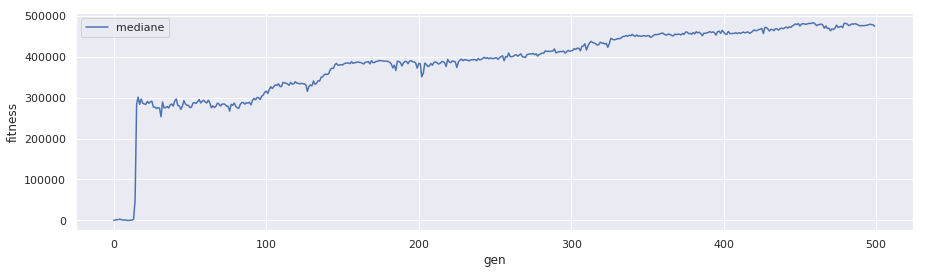

ind coop = 0


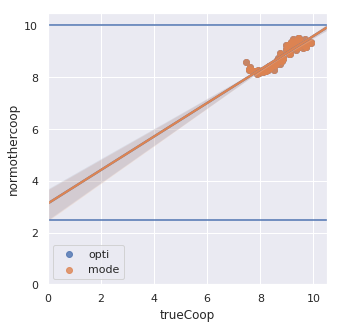

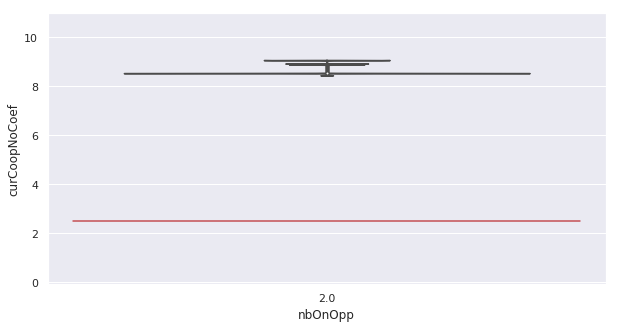

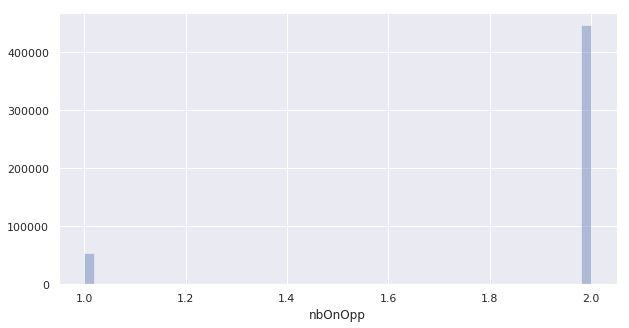

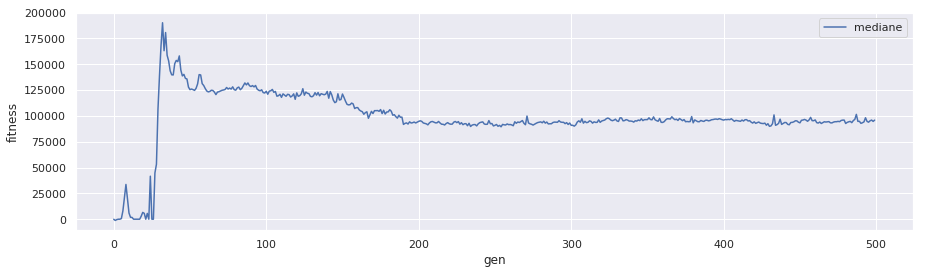

ind coop = 0


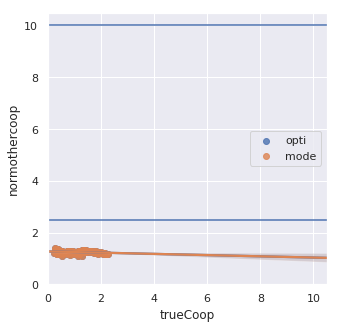

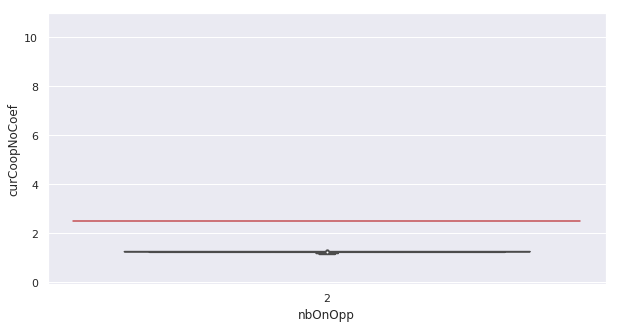

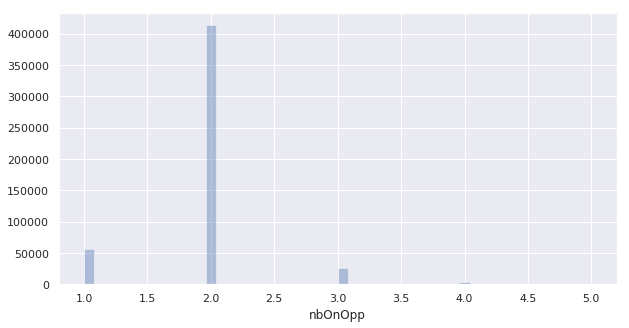

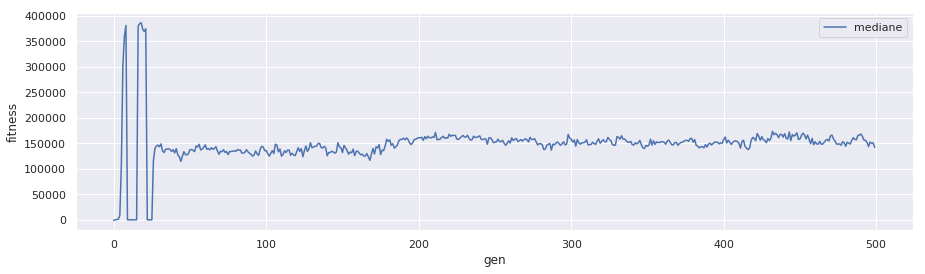

ind coop = 0


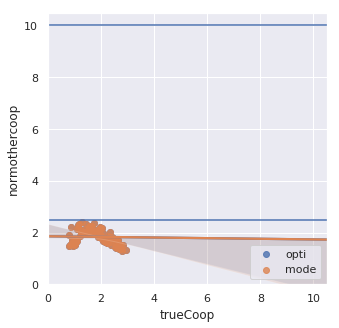

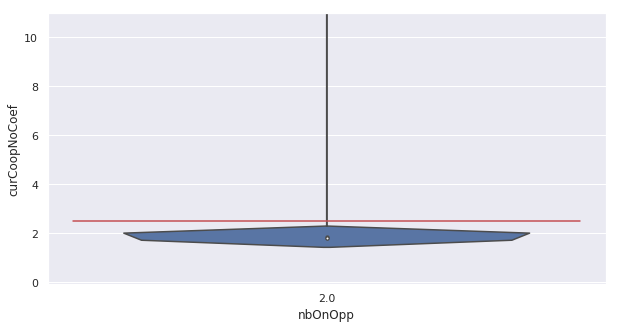

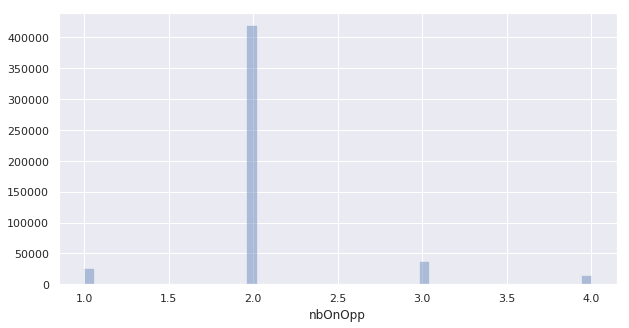

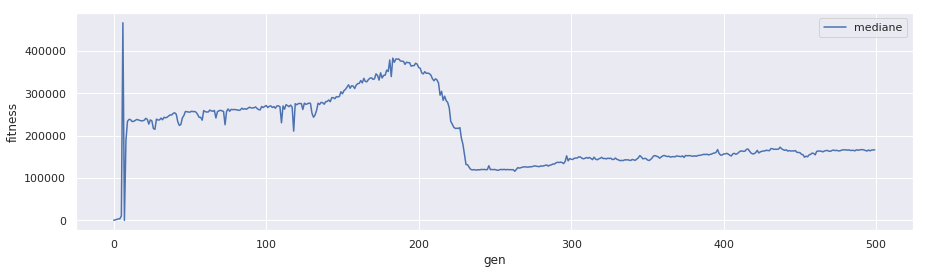

ind coop = 0


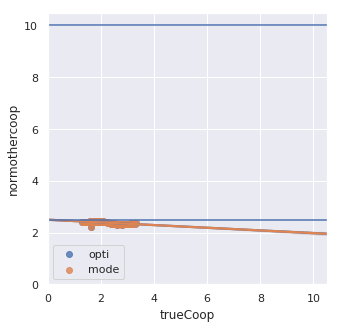

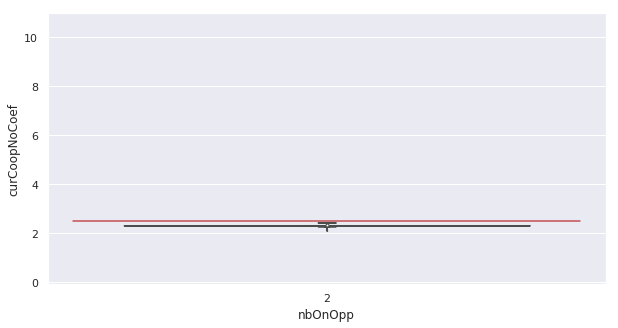

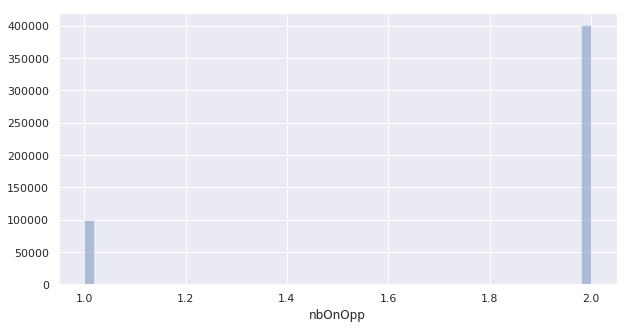

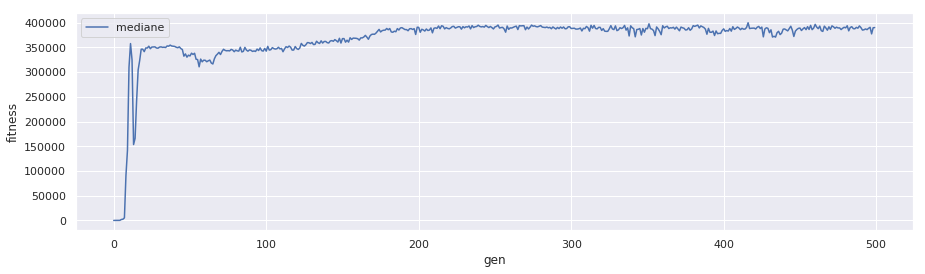

ind coop = 0


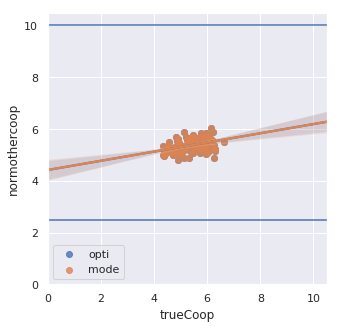

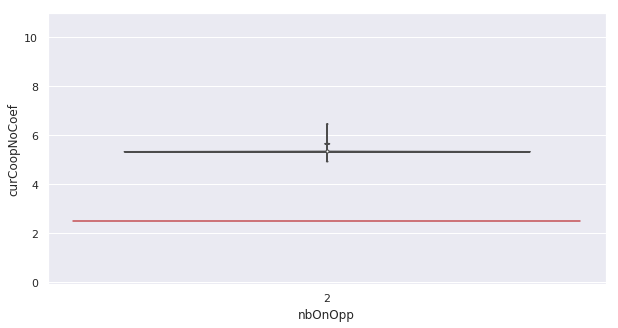

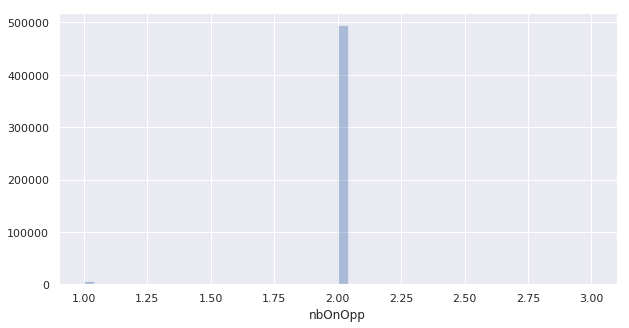

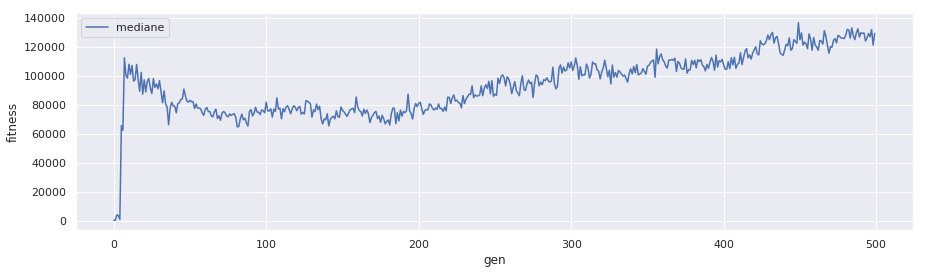

ind coop = 0


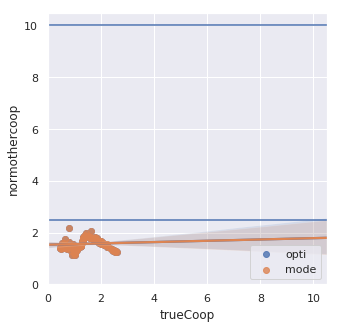

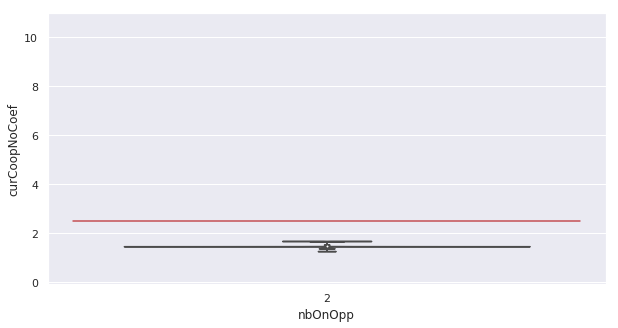

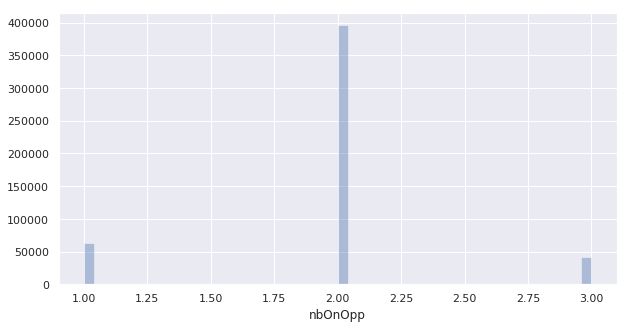

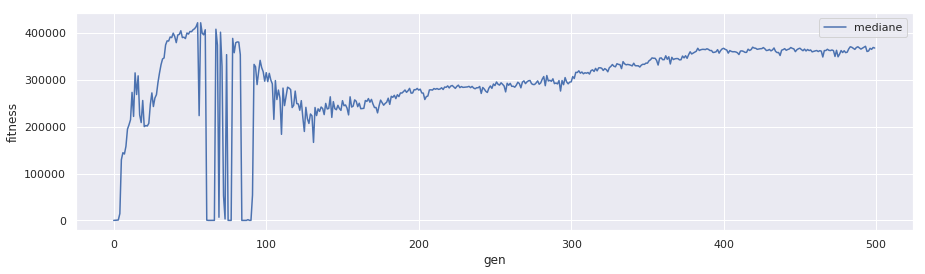

ind coop = 0


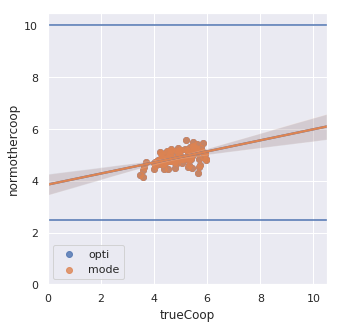

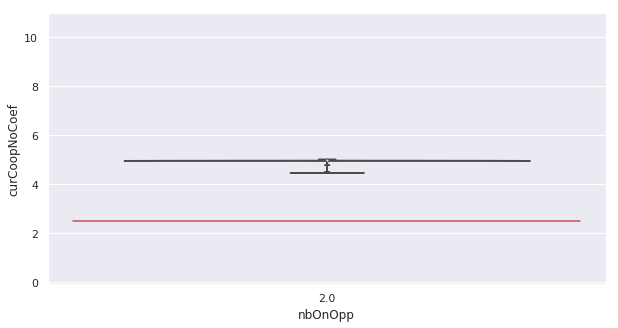

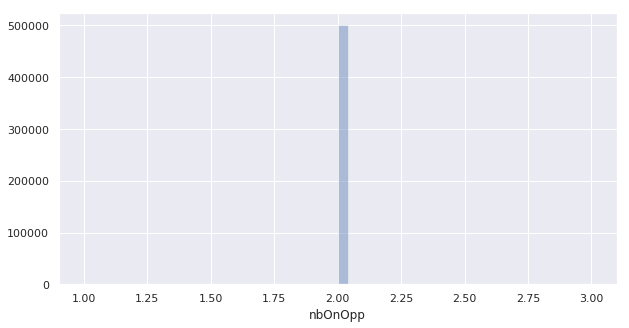

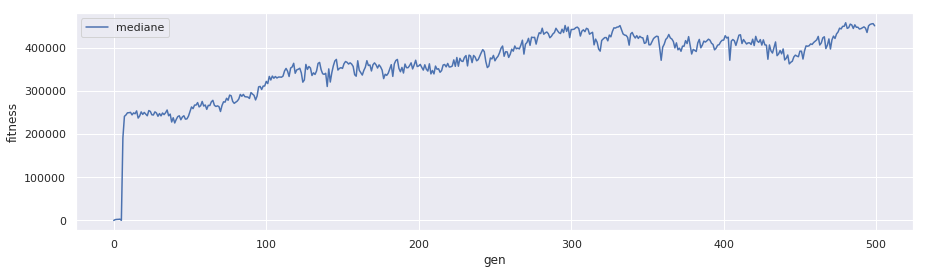

ind coop = 0


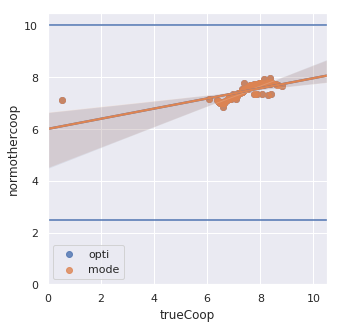

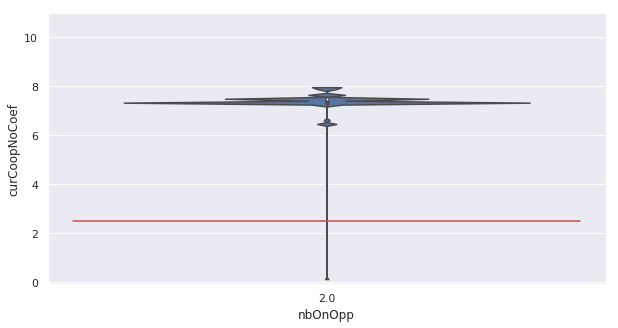

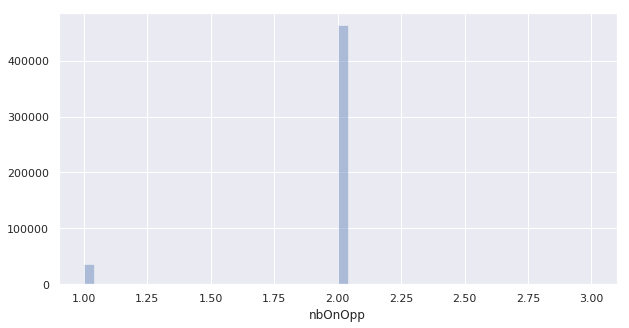

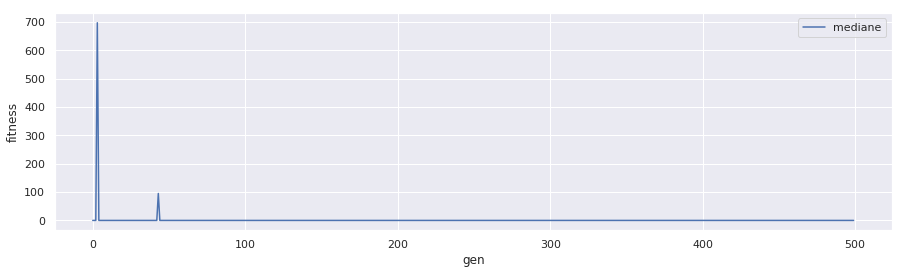

ind coop = 0


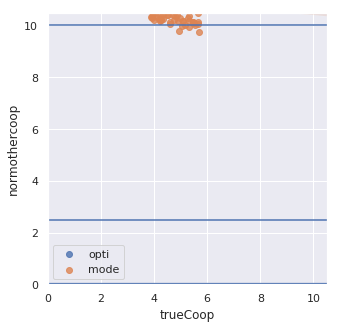

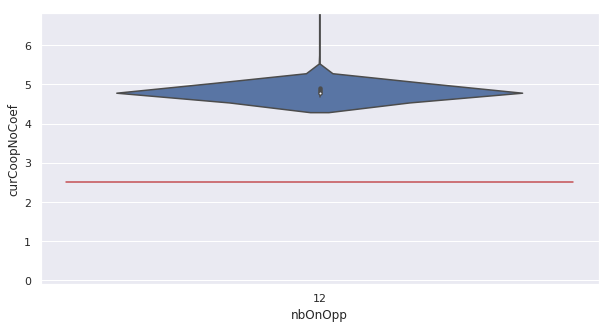

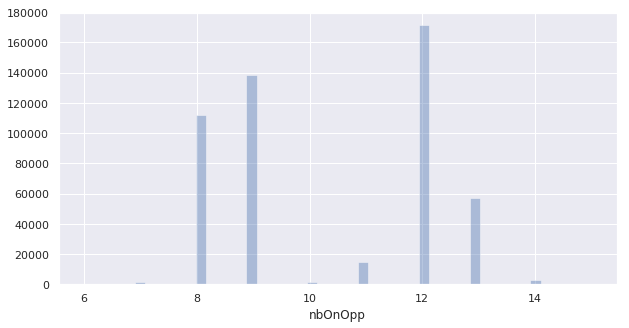

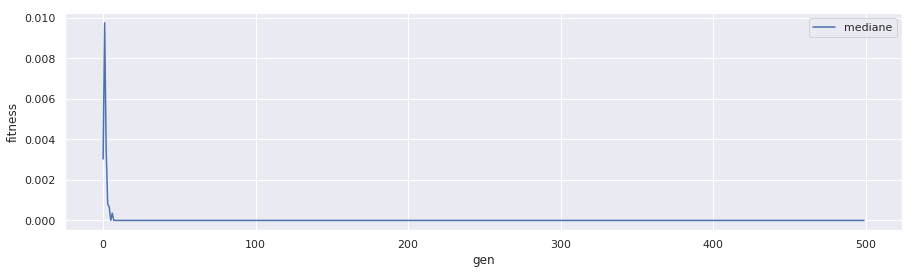

ind coop = 0


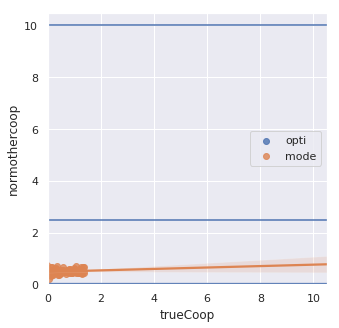

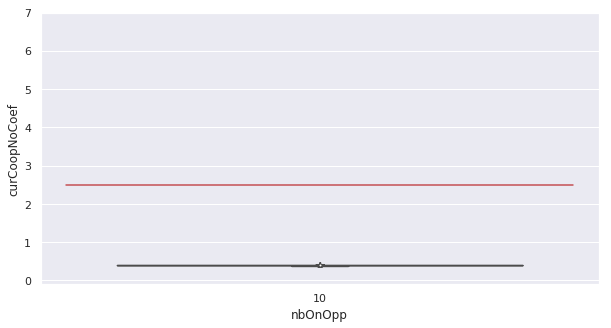

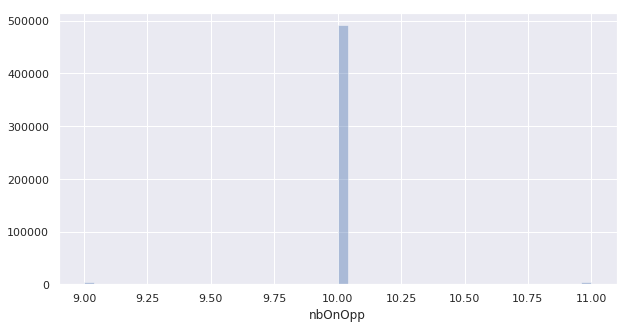

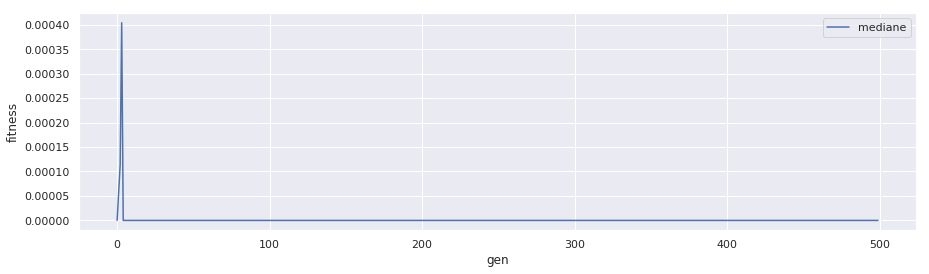

ind coop = 0


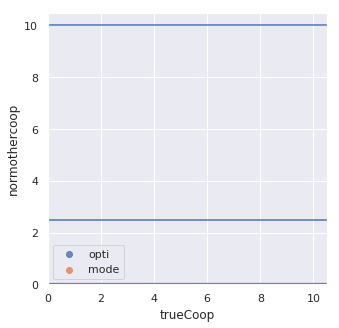

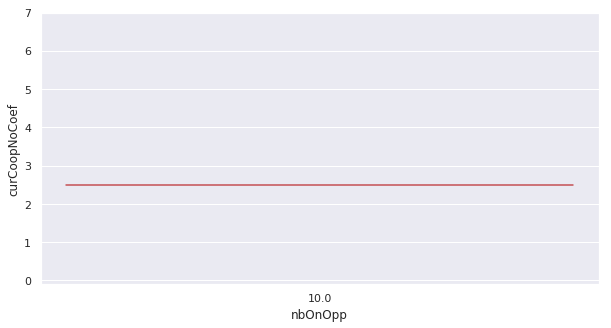

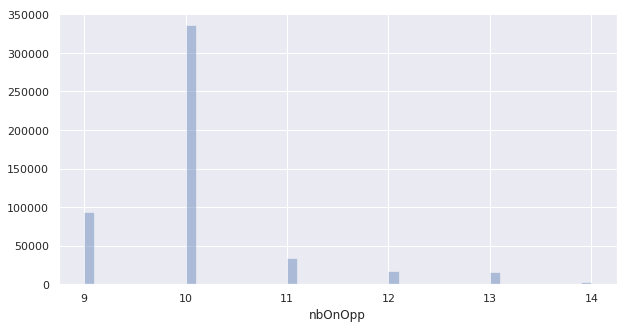

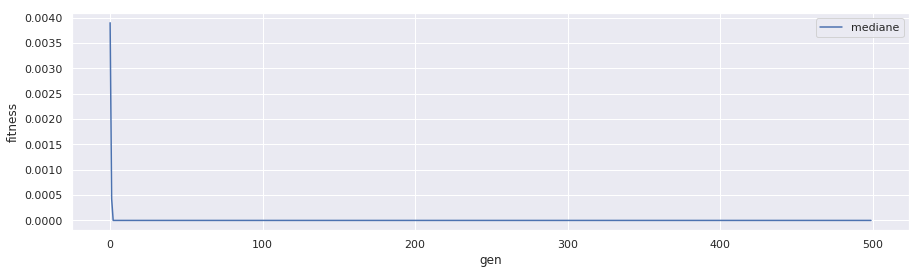

ind coop = 0


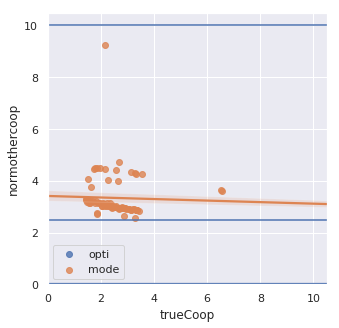

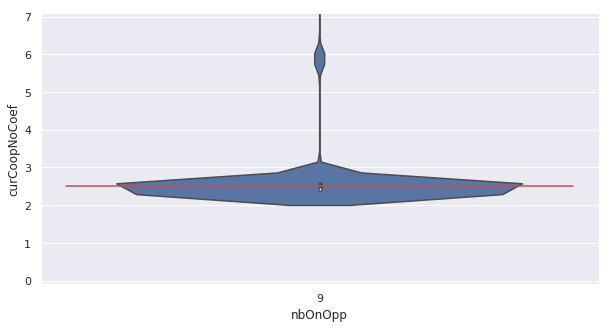

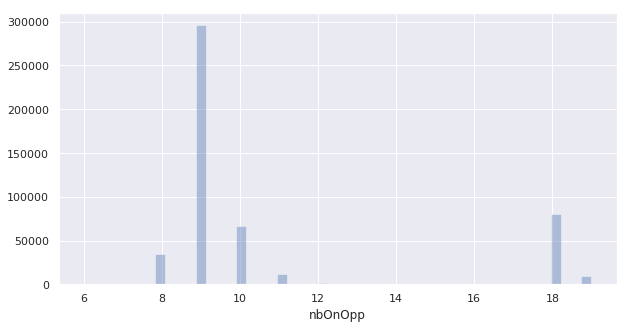

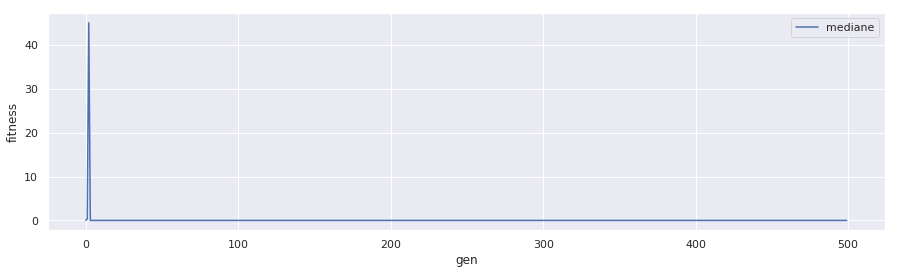

ind coop = 0


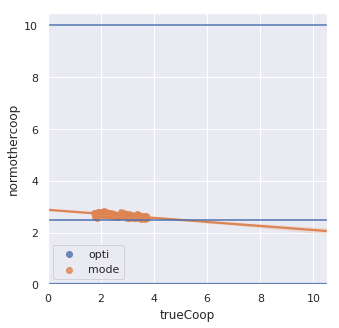

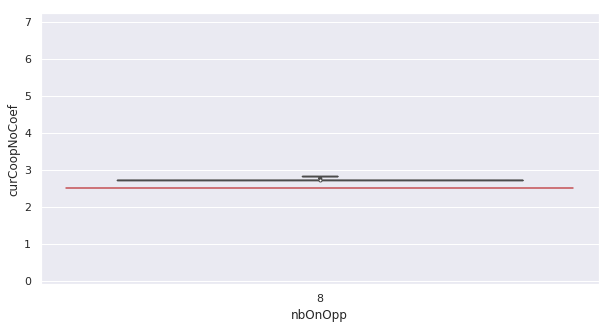

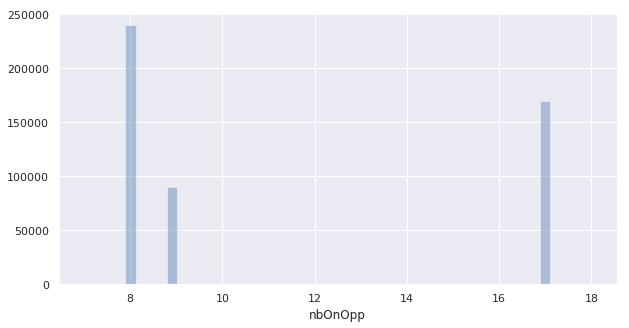

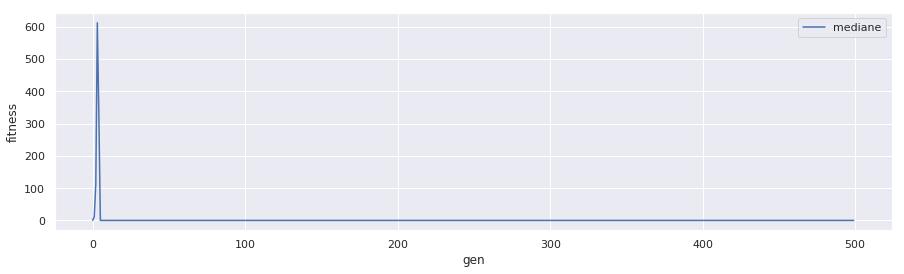

ind coop = 0


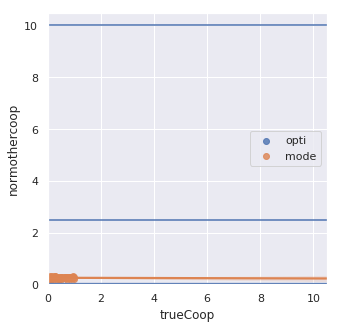

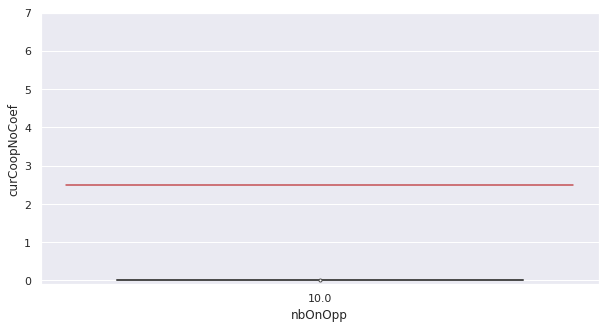

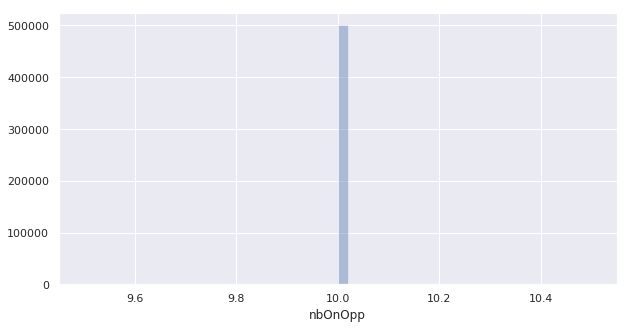

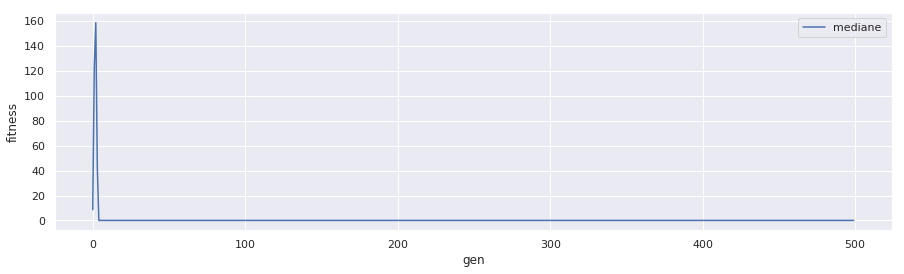

ind coop = 0


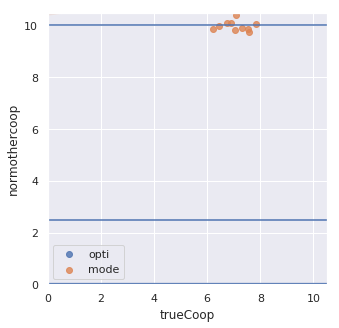

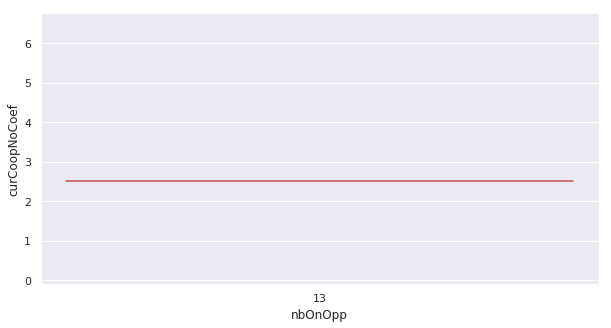

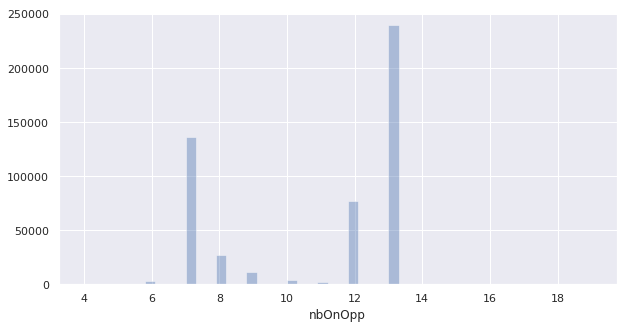

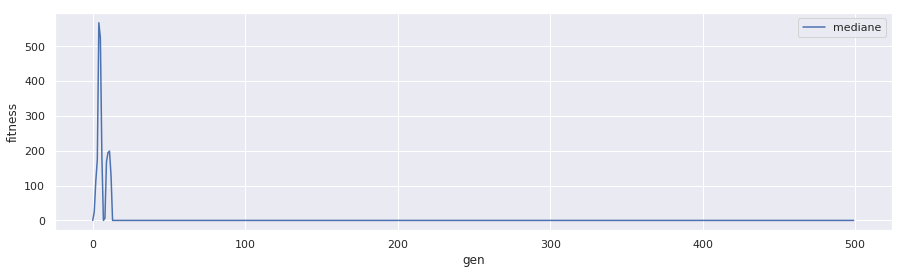

ind coop = 0


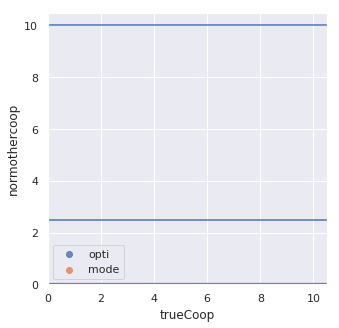

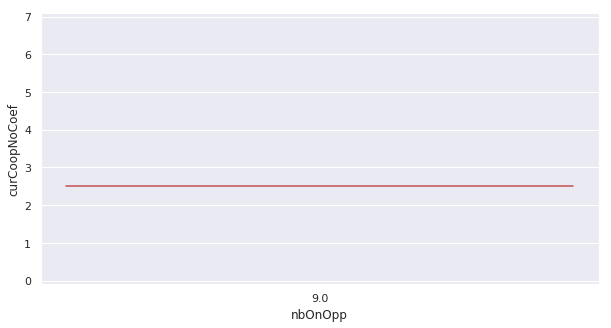

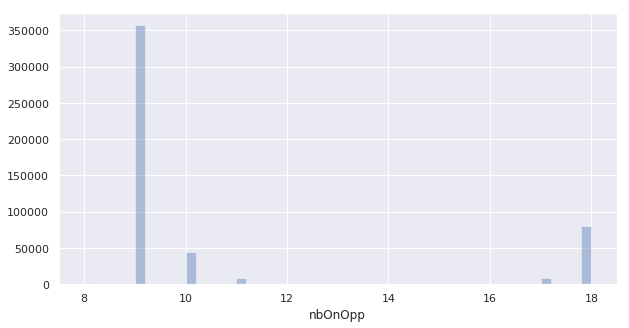

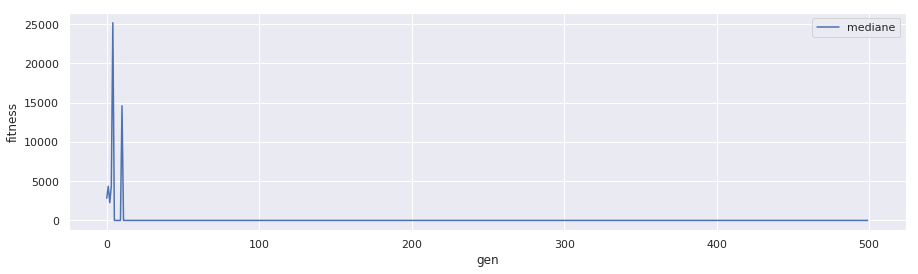

ind coop = 0


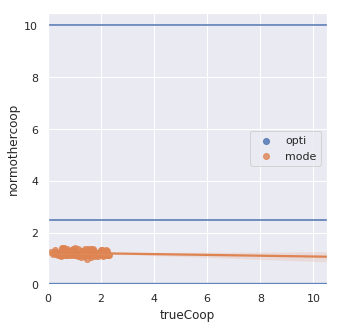

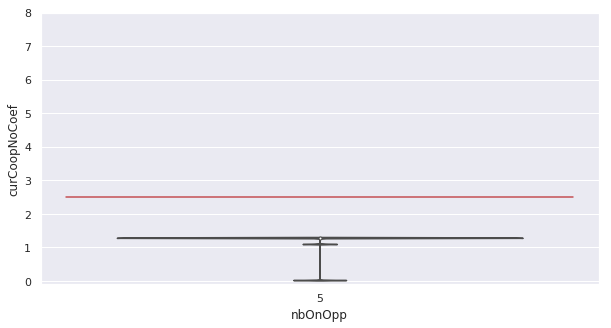

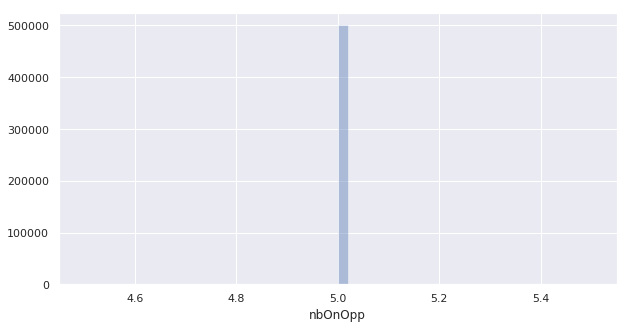

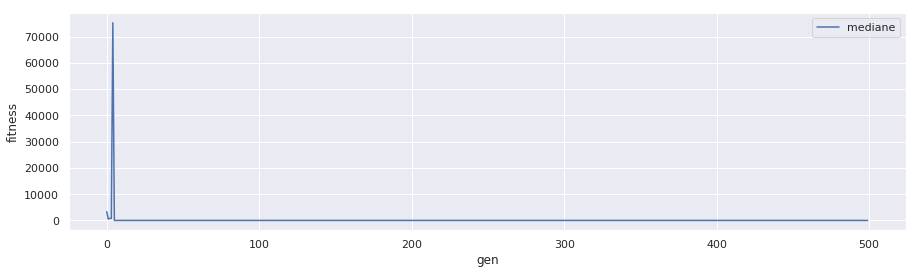

ind coop = 0


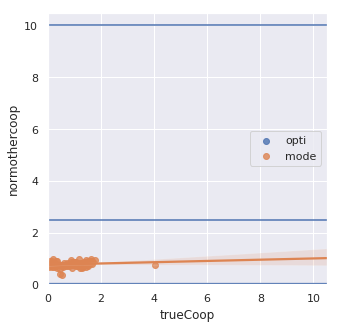

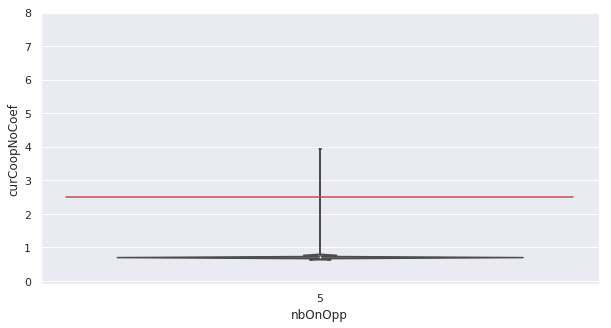

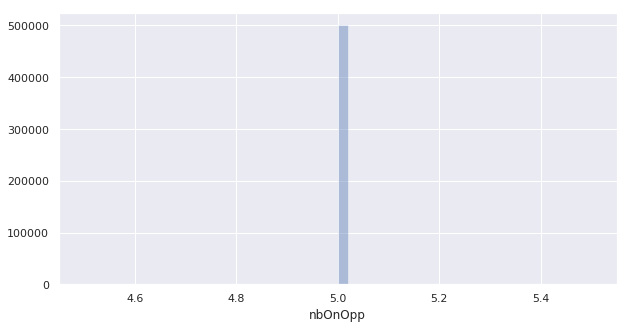

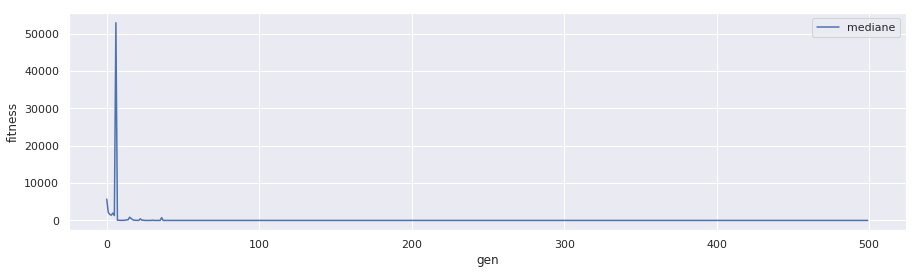

ind coop = 0


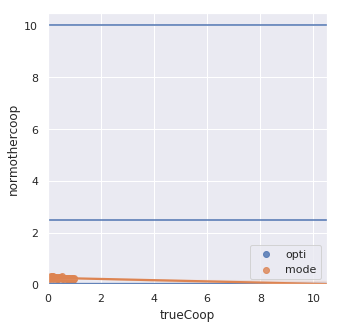

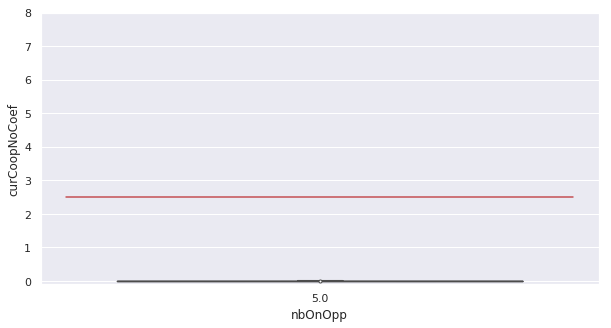

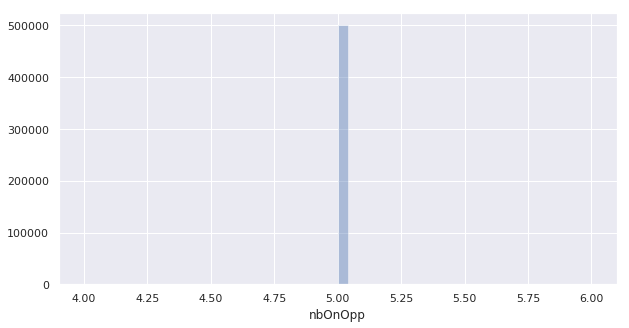

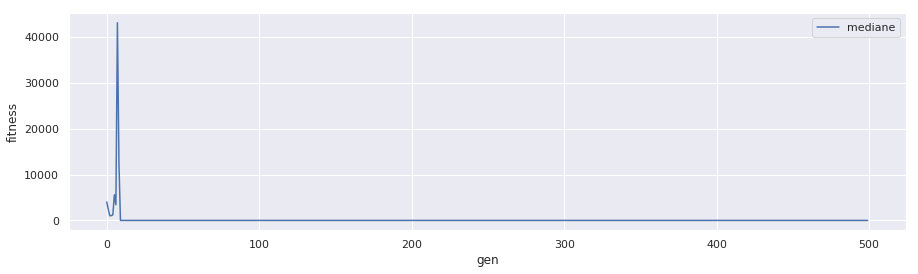

ind coop = 0


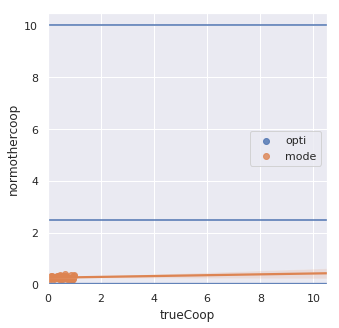

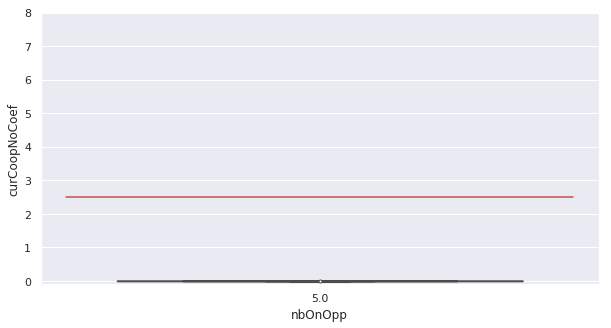

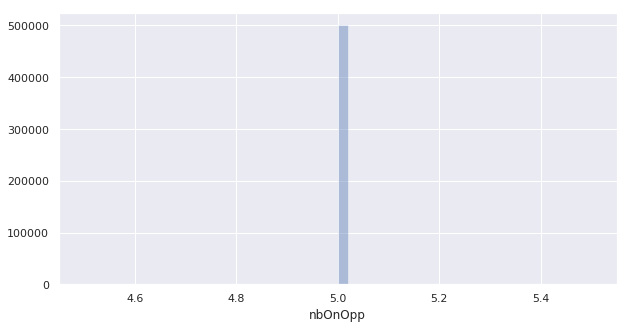

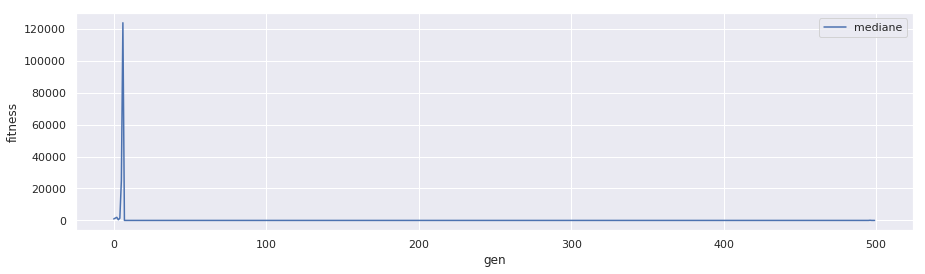

ind coop = 0


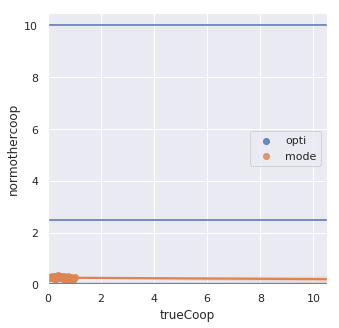

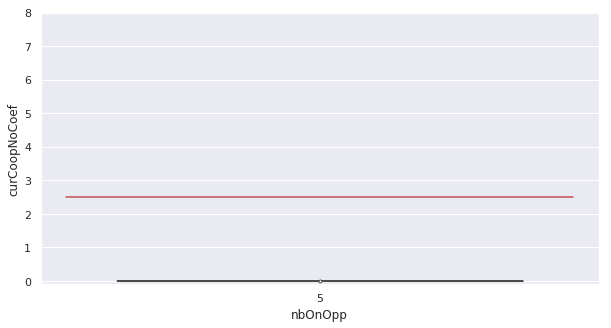

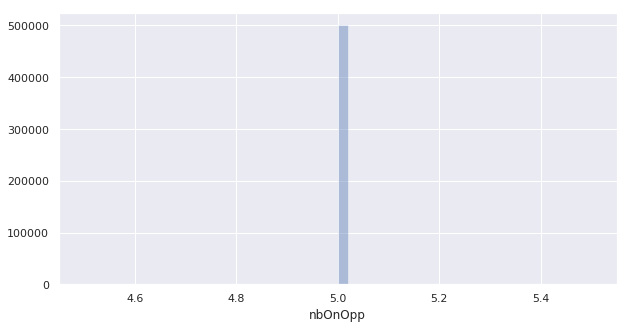

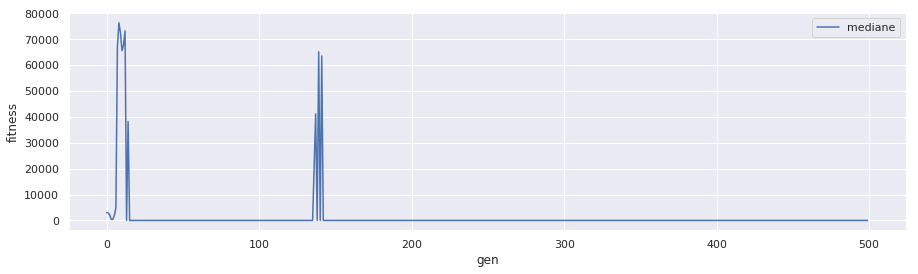

ind coop = 0


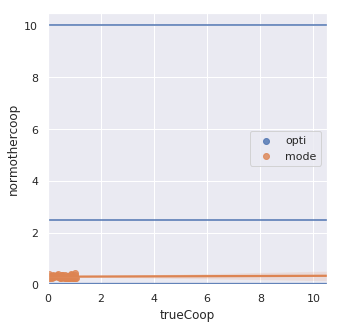

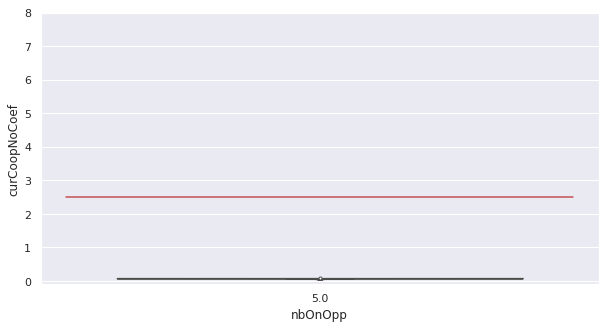

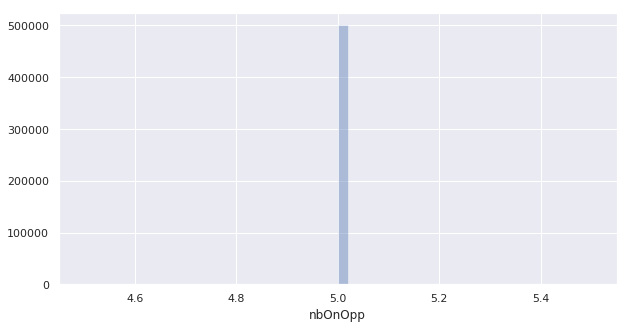

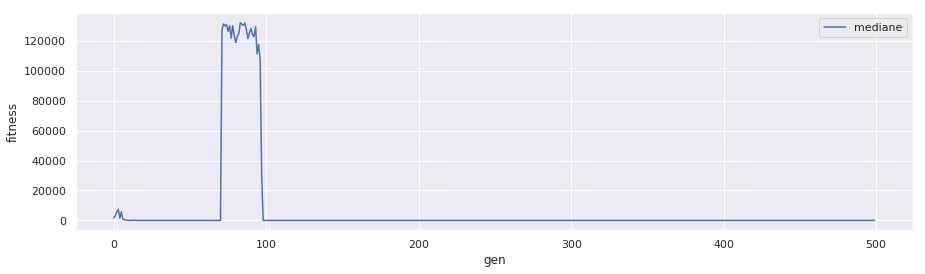

ind coop = 0


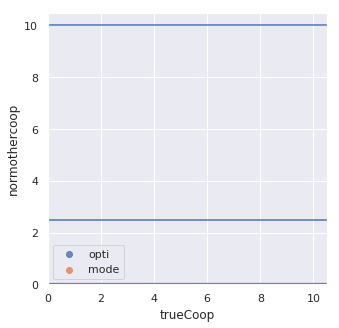

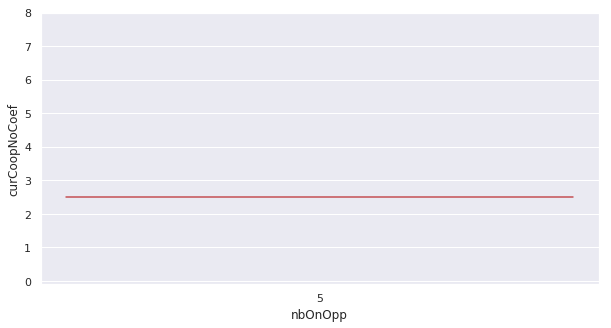

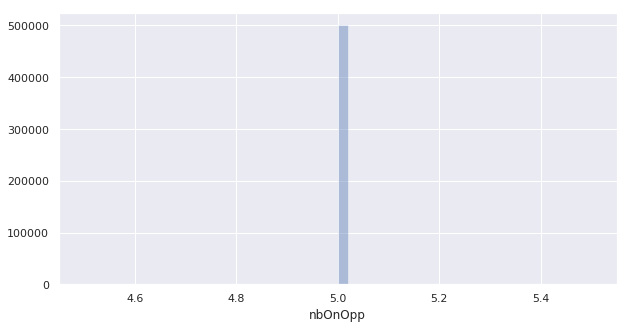

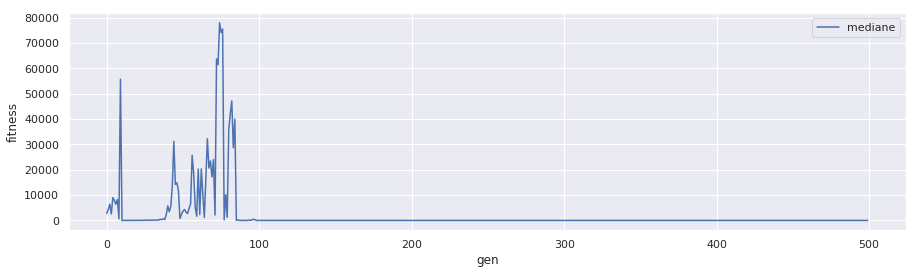

ind coop = 0


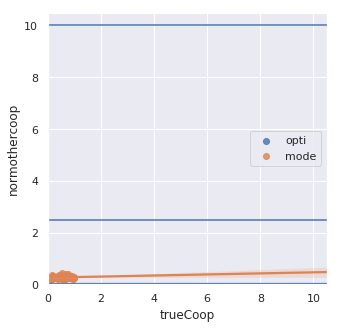

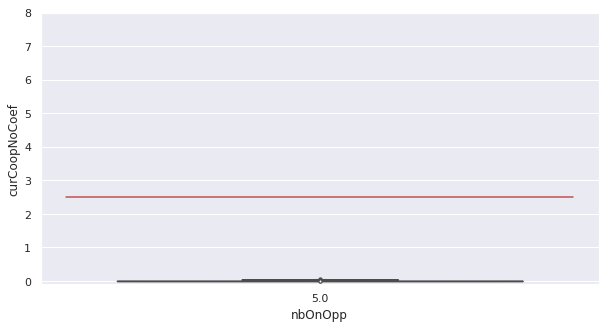

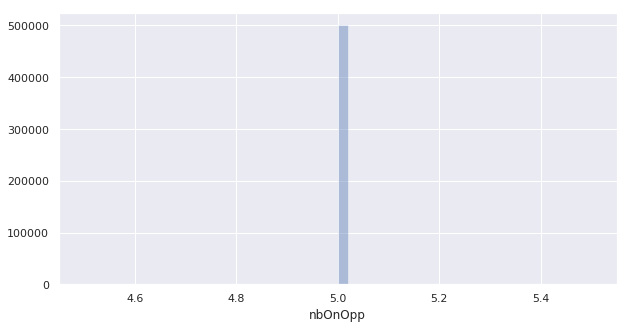

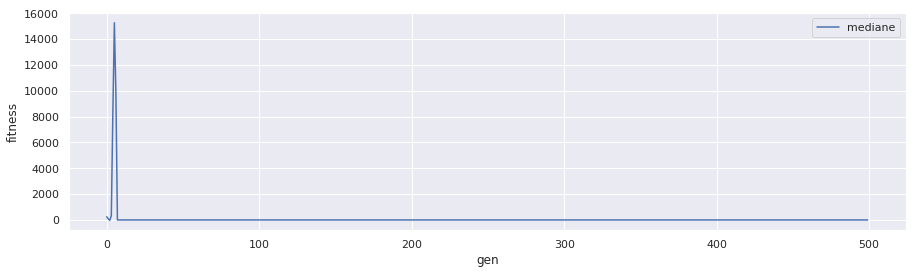

ind coop = 0


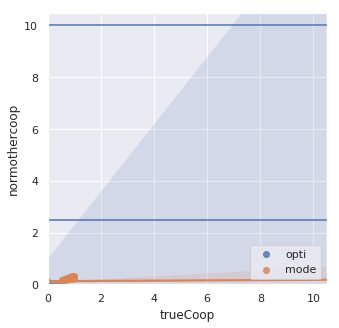

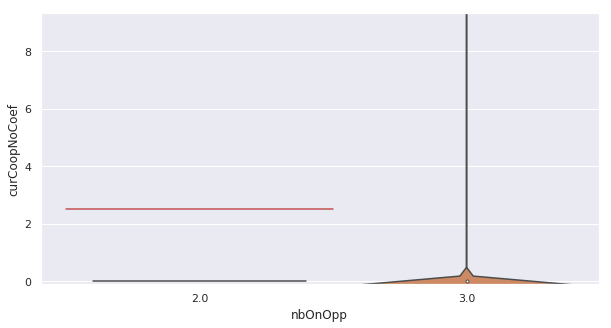

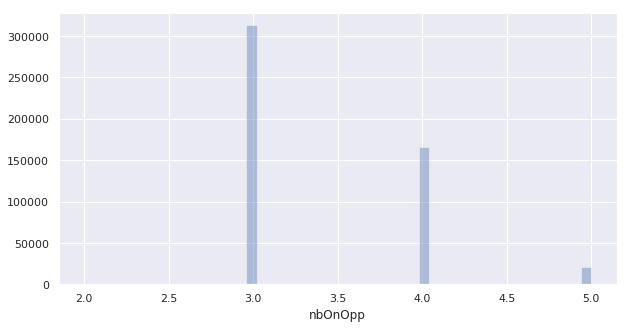

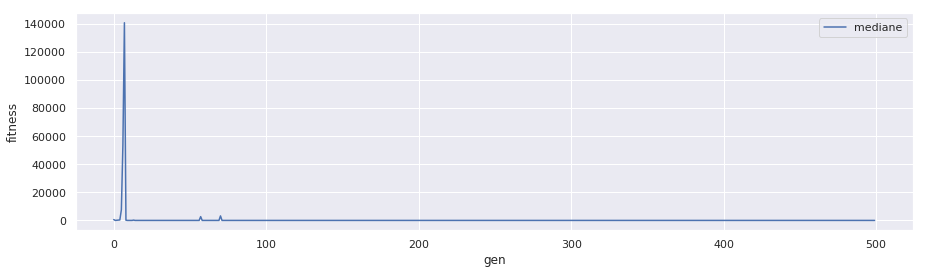

ind coop = 0


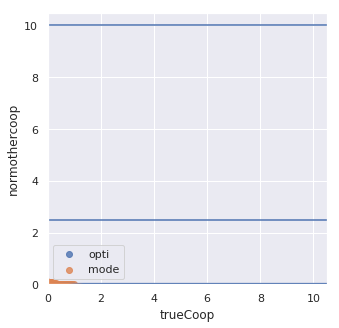

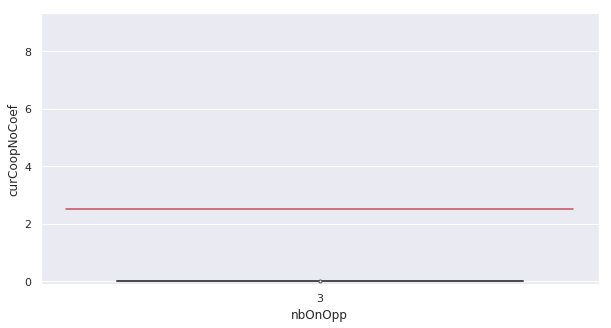

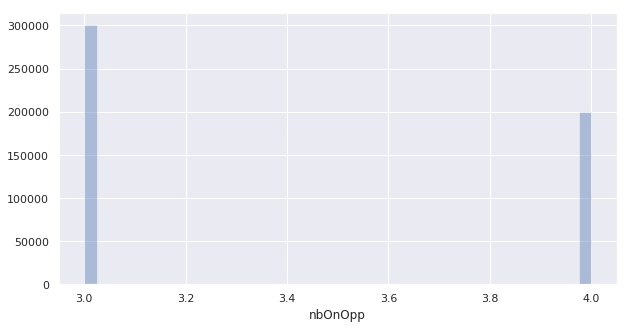

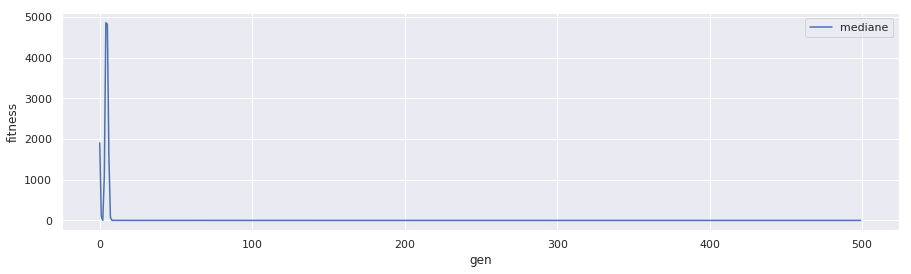

ind coop = 0


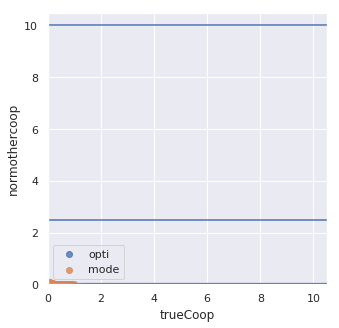

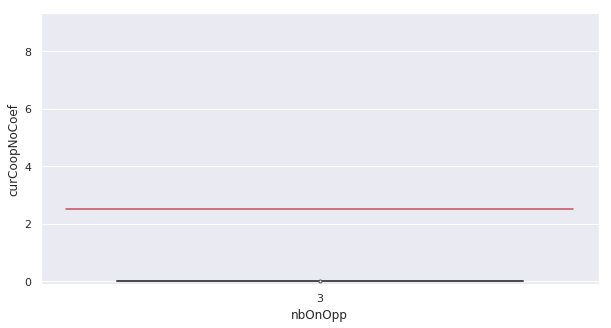

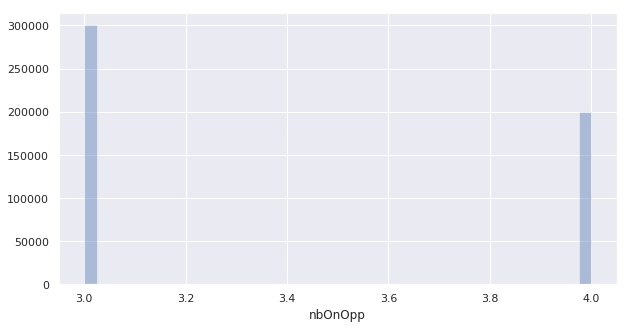

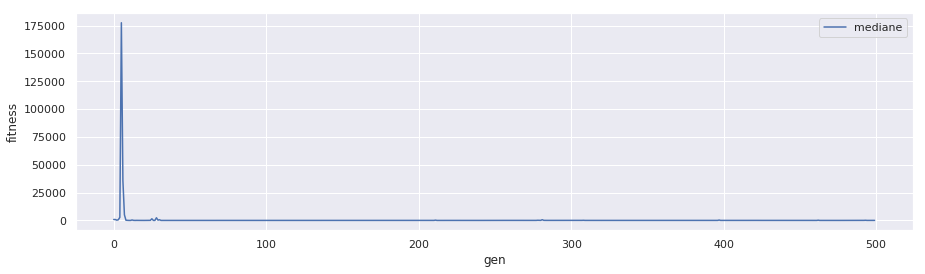

ind coop = 0


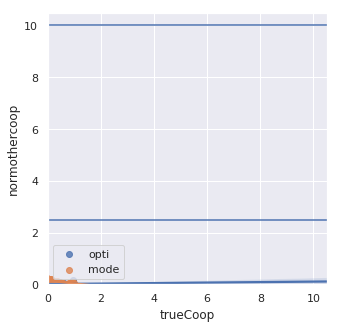

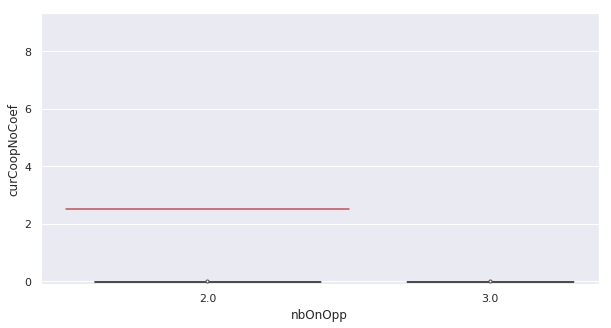

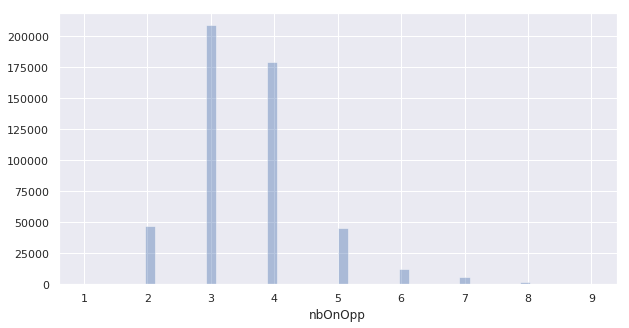

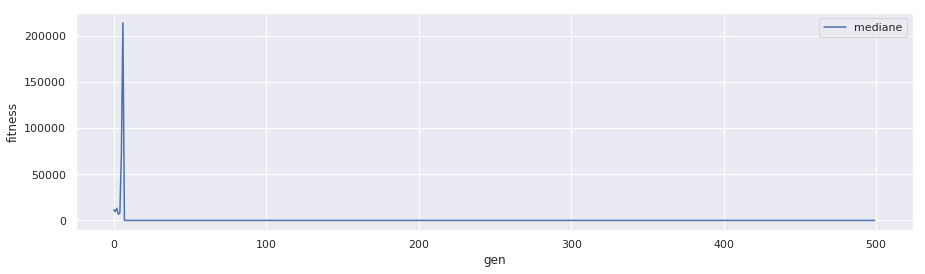

ind coop = 0


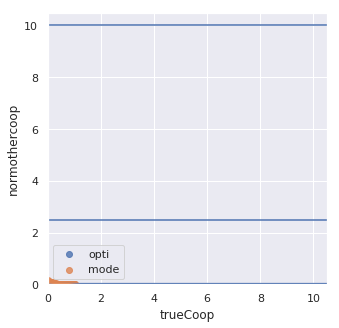

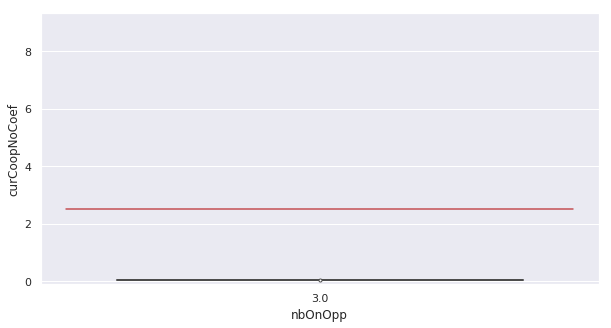

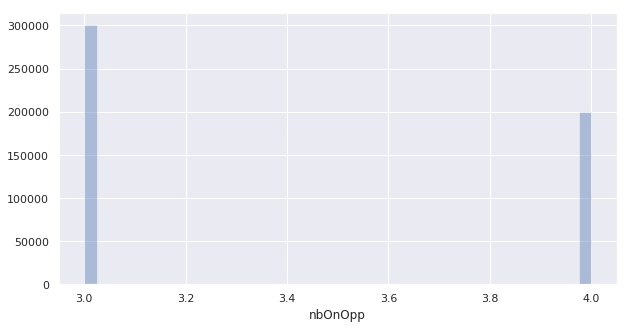

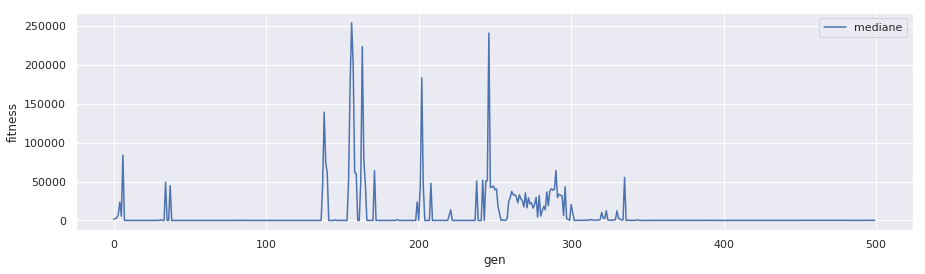

ind coop = 0


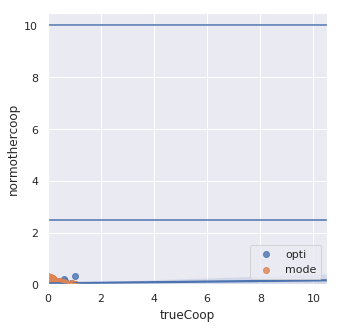

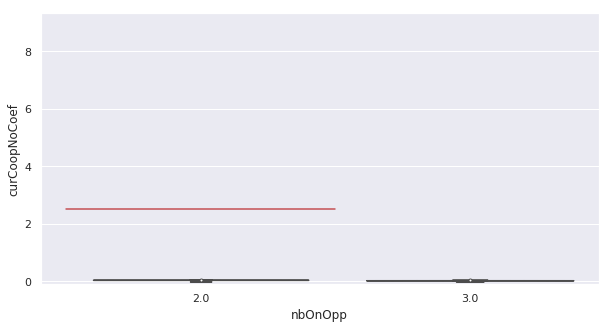

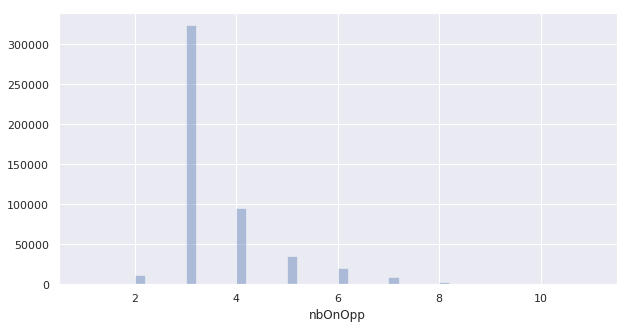

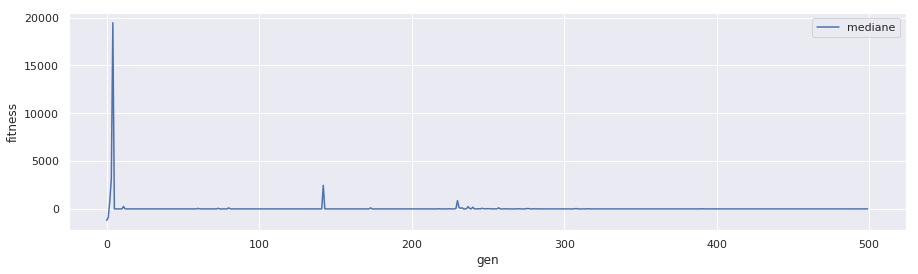

ind coop = 0


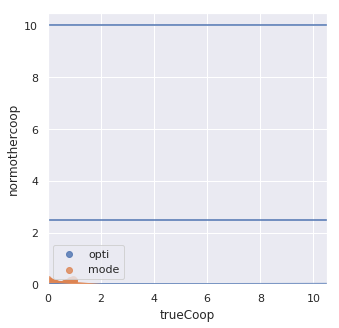

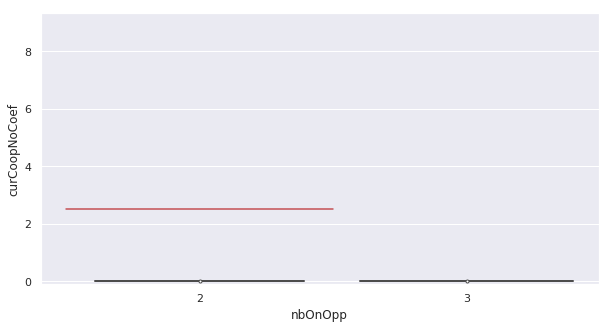

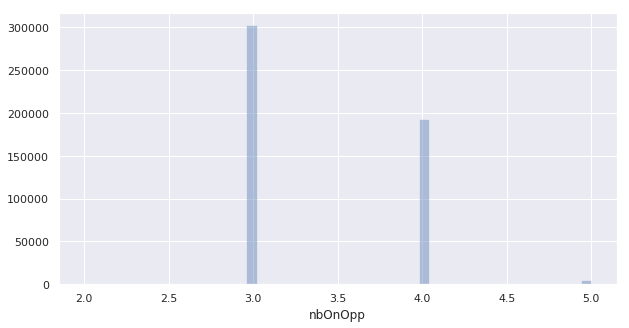

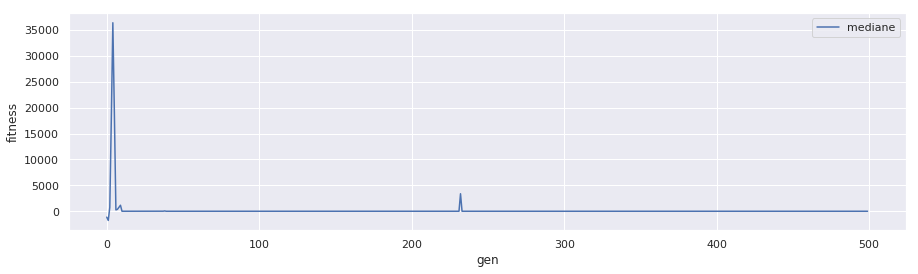

ind coop = 0


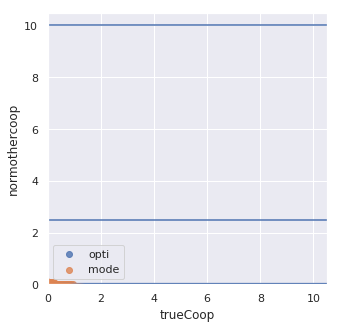

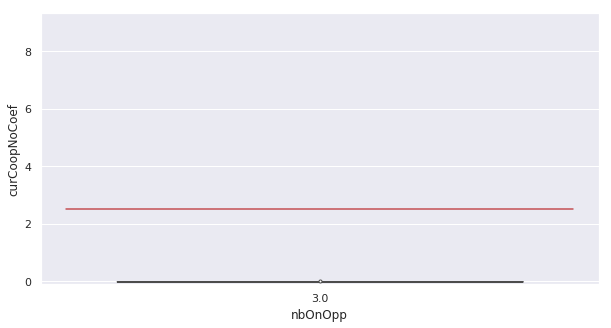

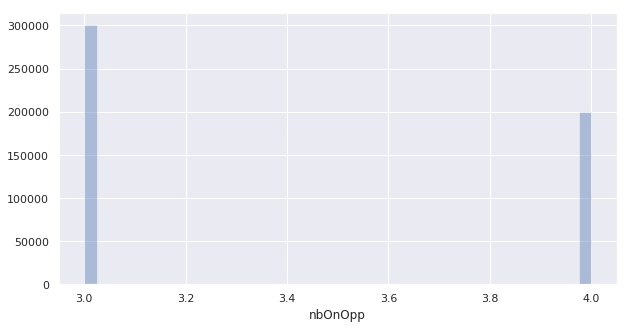

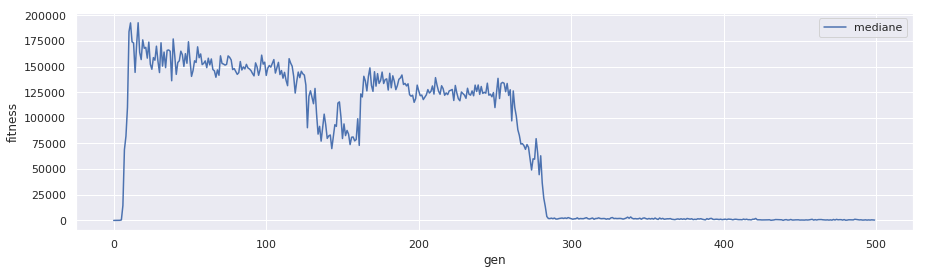

ind coop = 0


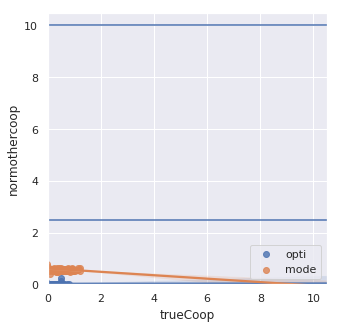

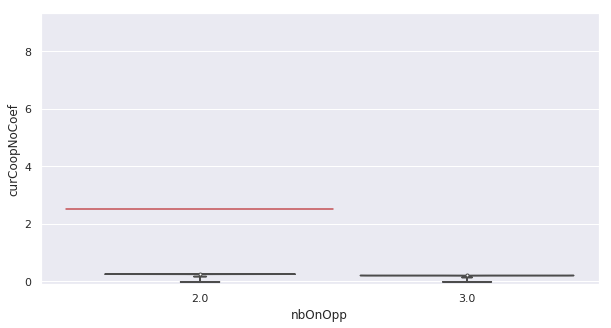

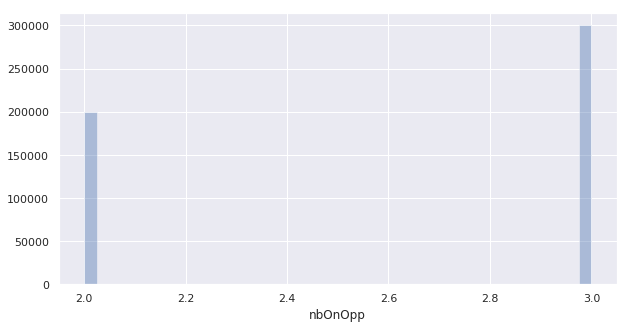

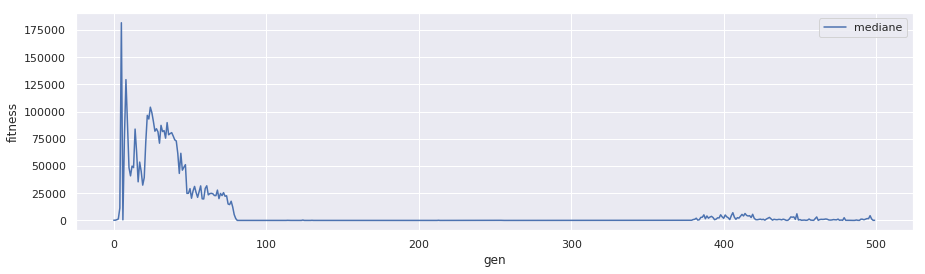

ind coop = 0


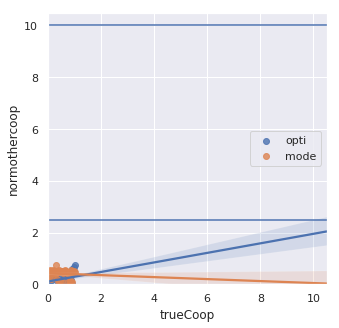

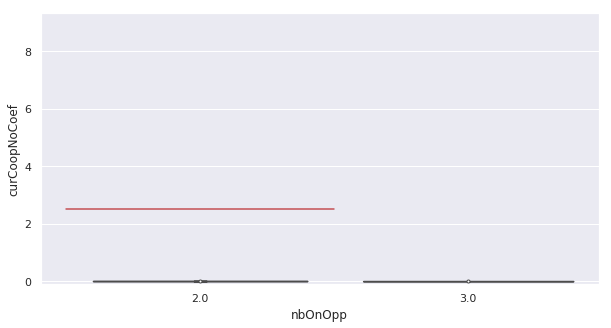

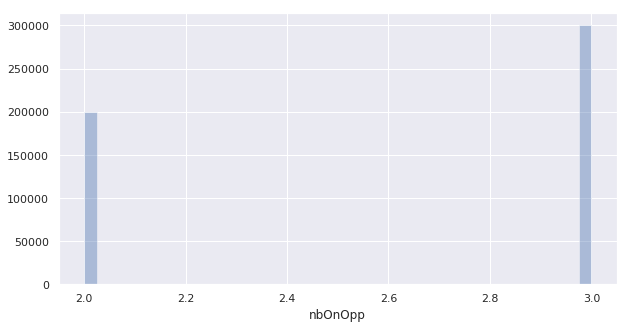

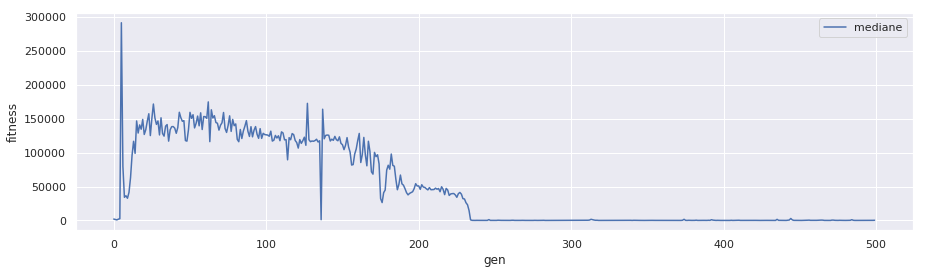

ind coop = 0


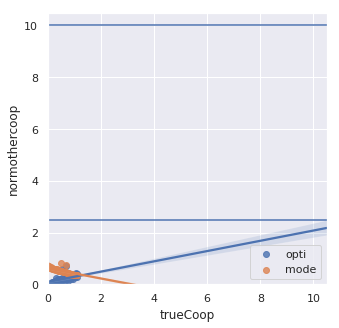

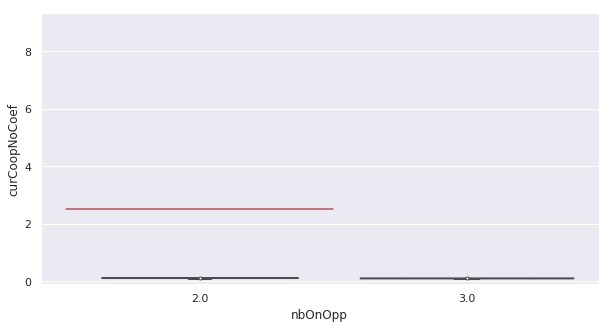

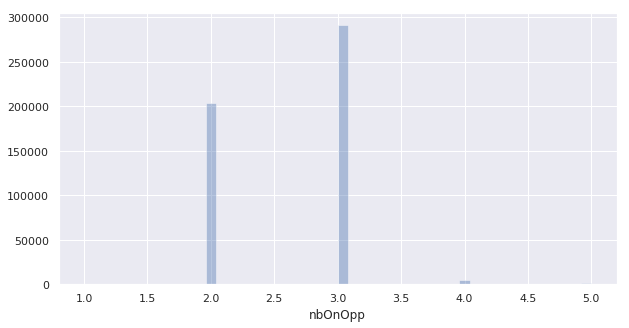

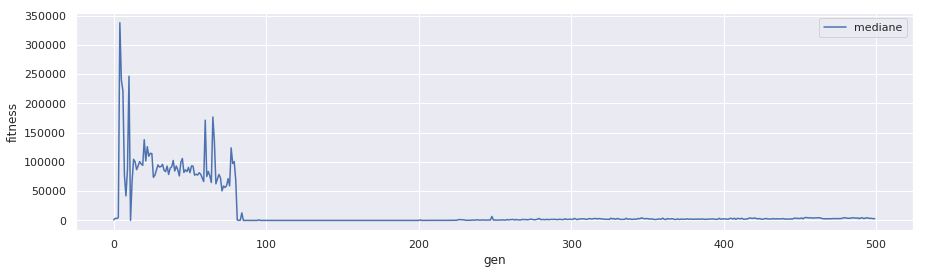

ind coop = 0


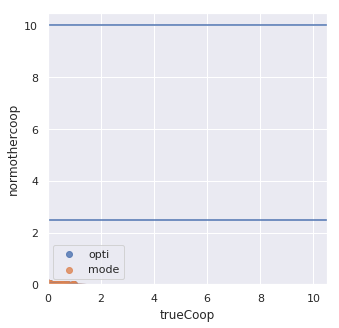

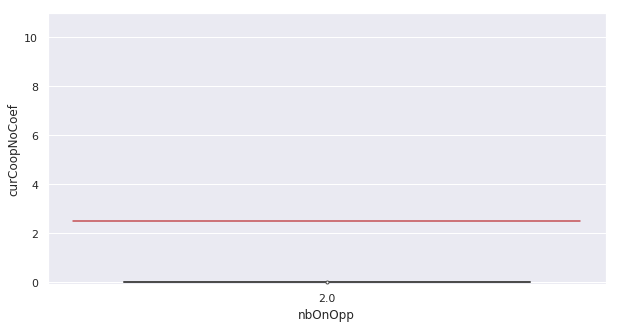

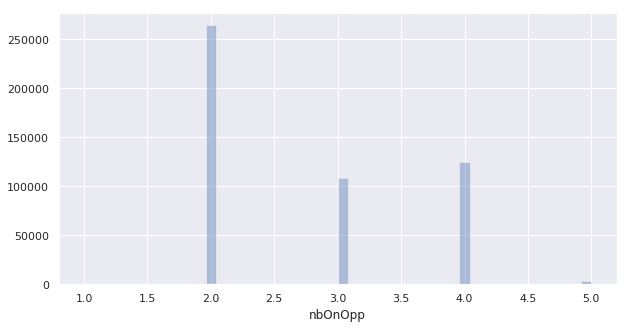

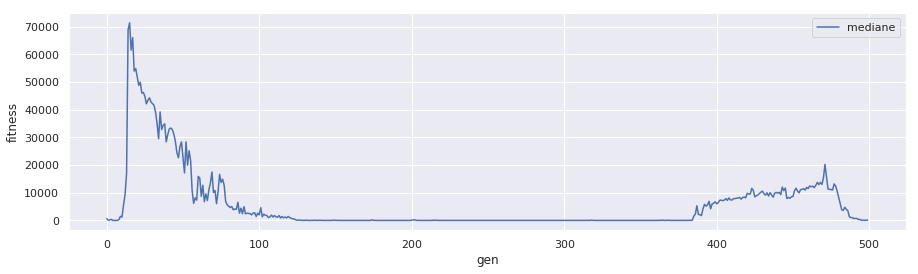

ind coop = 0


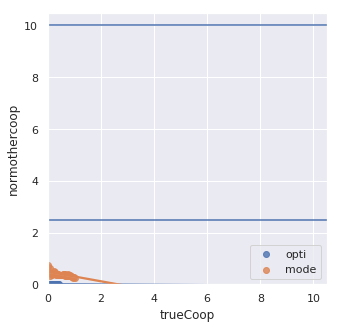

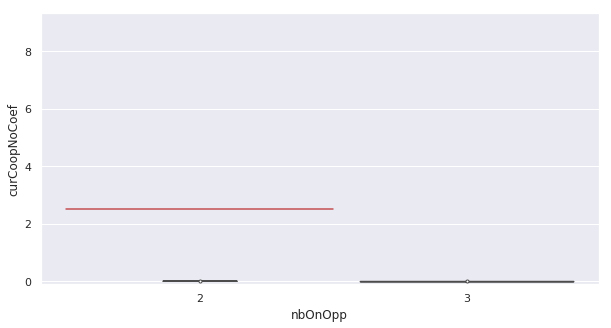

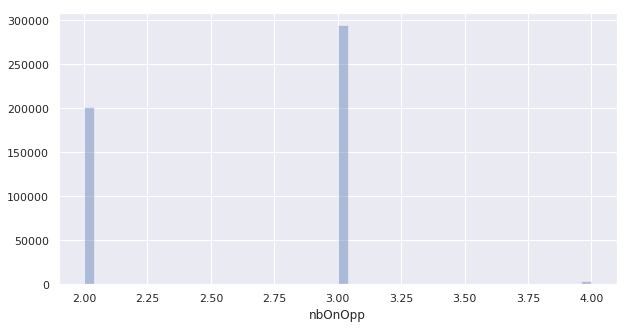

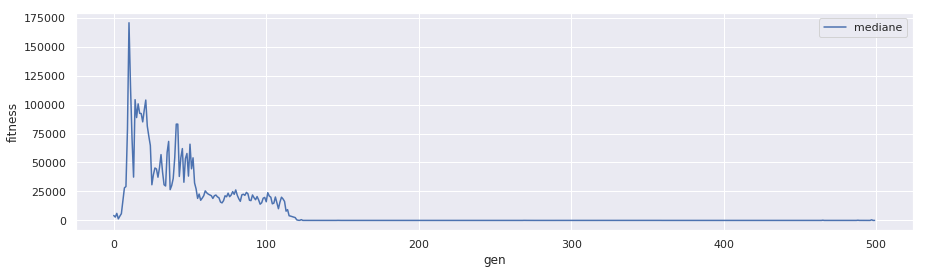

ind coop = 0


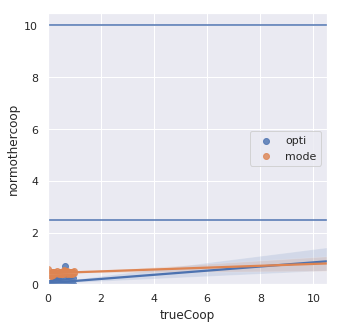

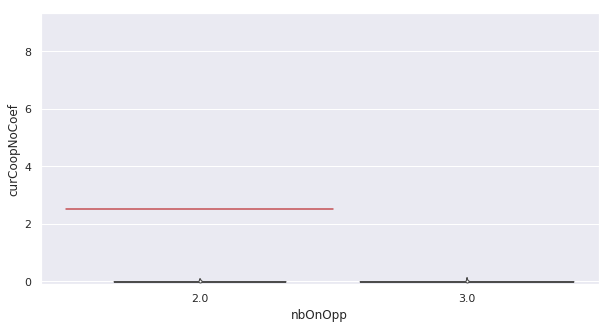

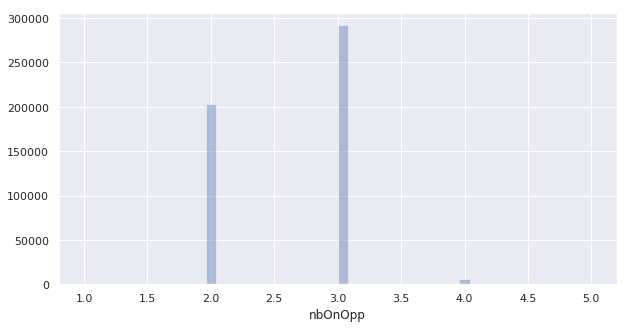

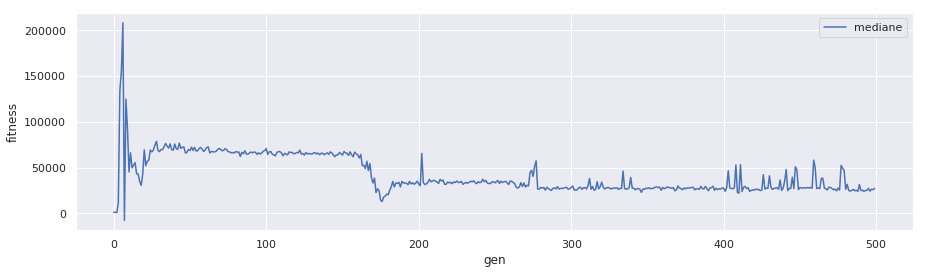

ind coop = 0


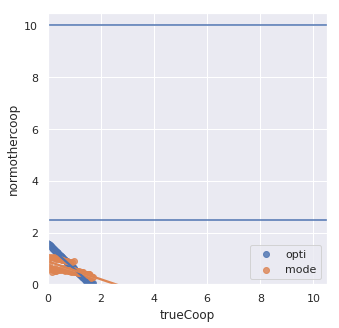

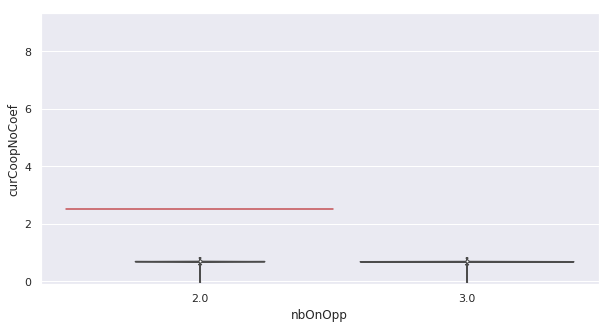

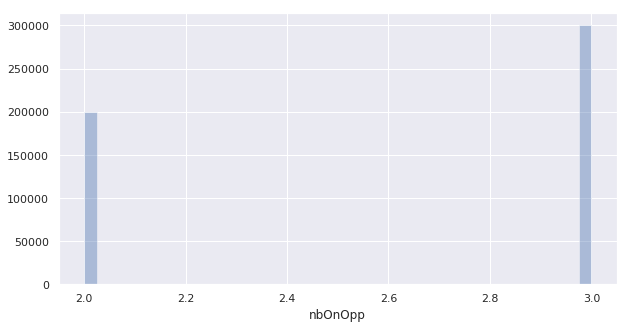

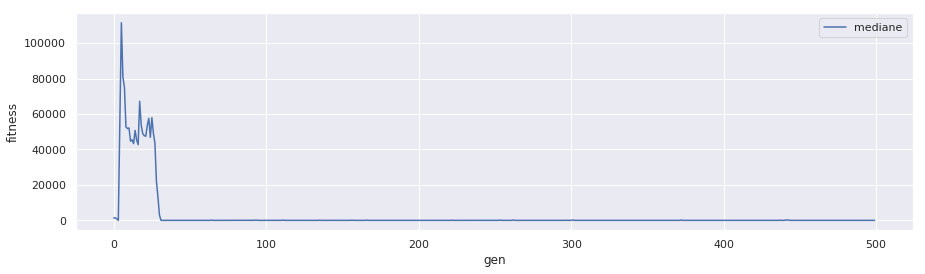

ind coop = 0


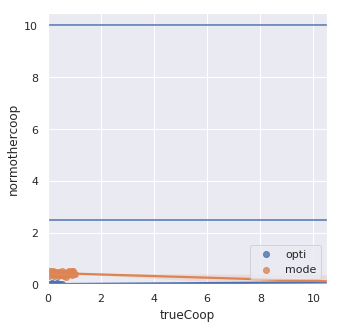

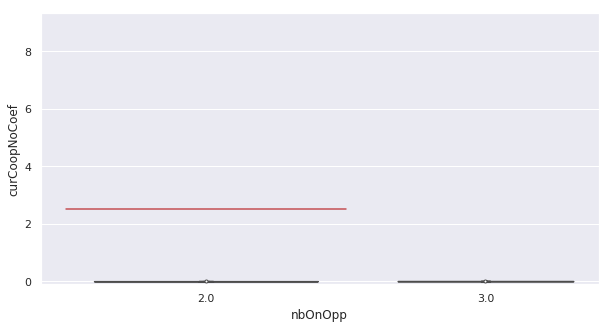

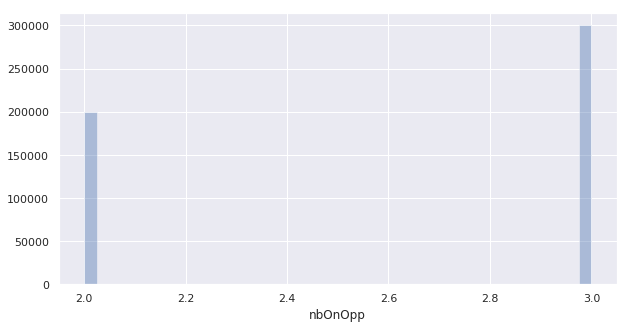

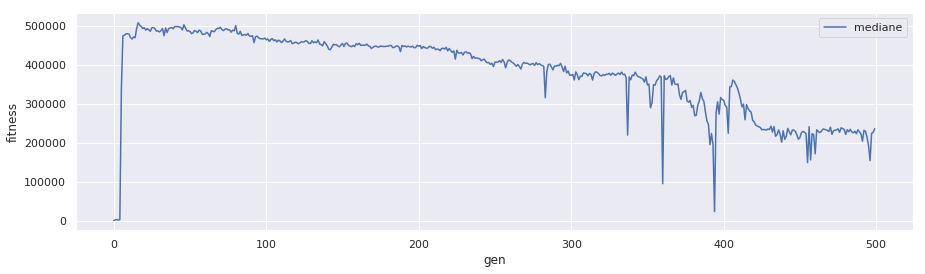

ind coop = 0


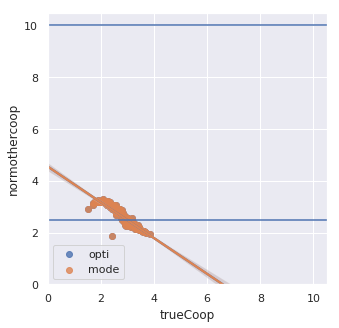

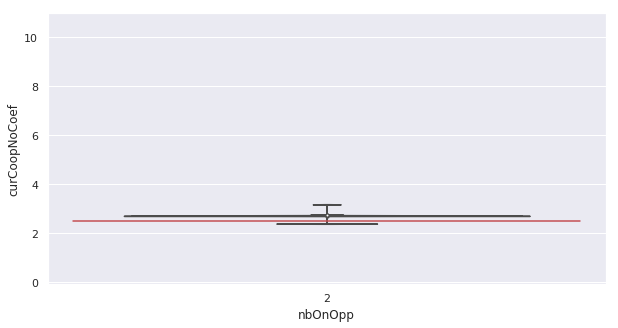

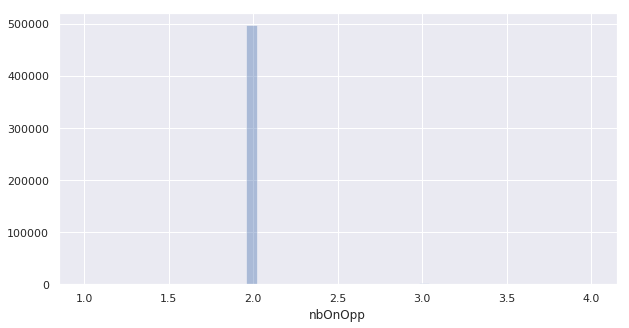

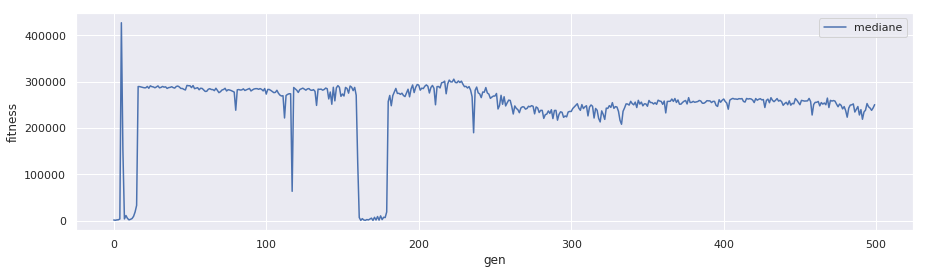

ind coop = 0


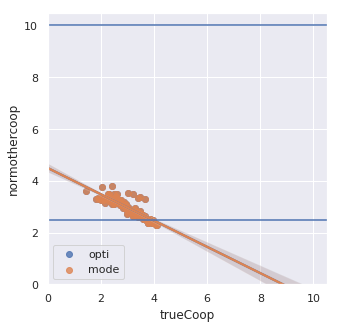

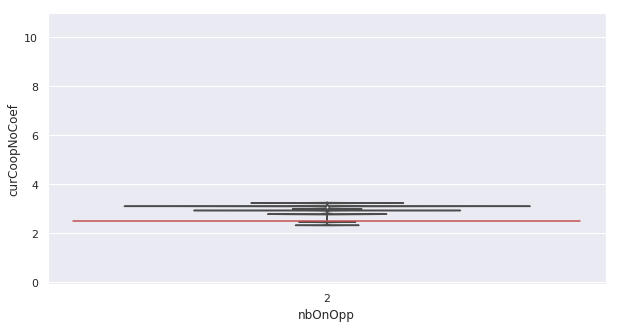

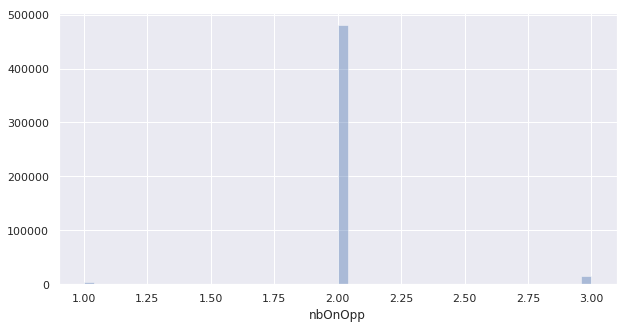

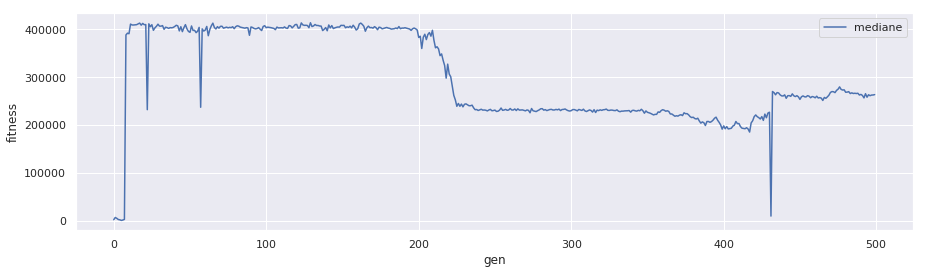

ind coop = 0


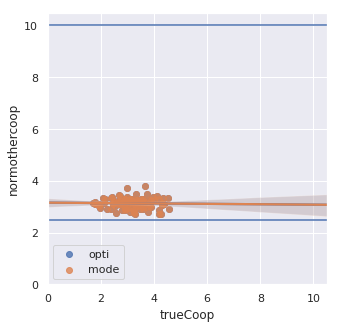

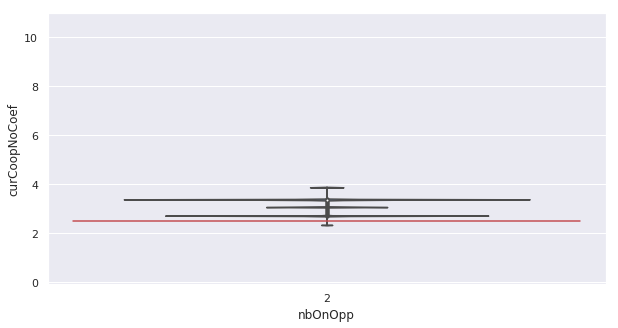

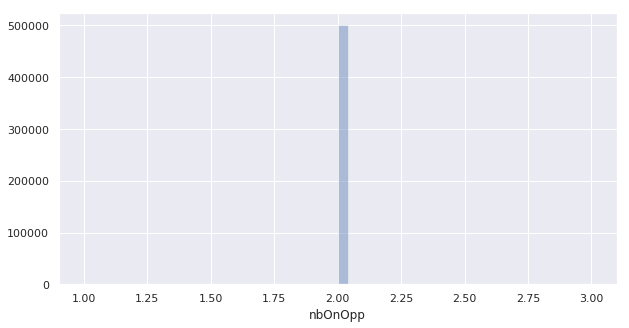

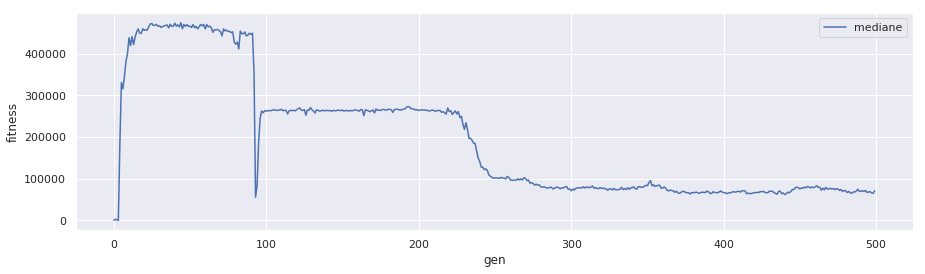

ind coop = 0


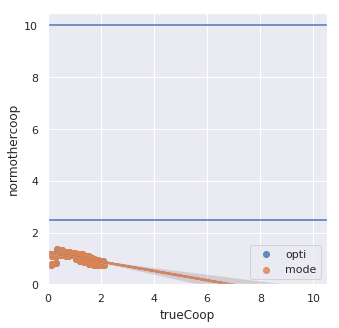

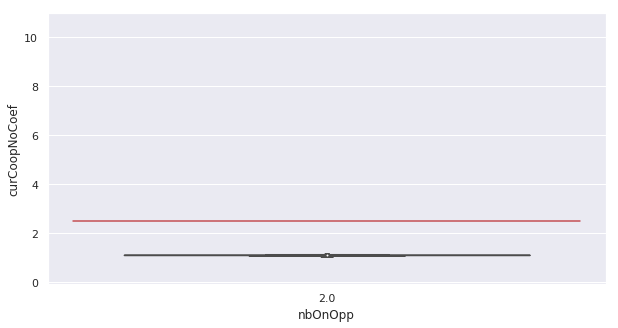

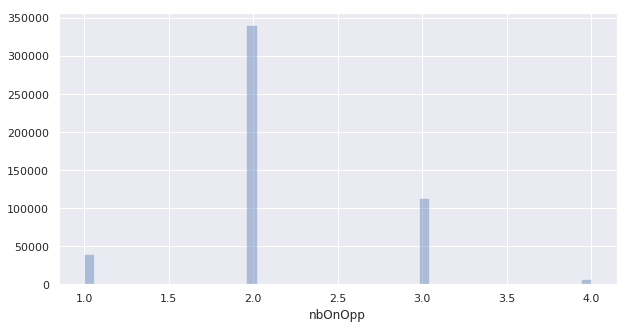

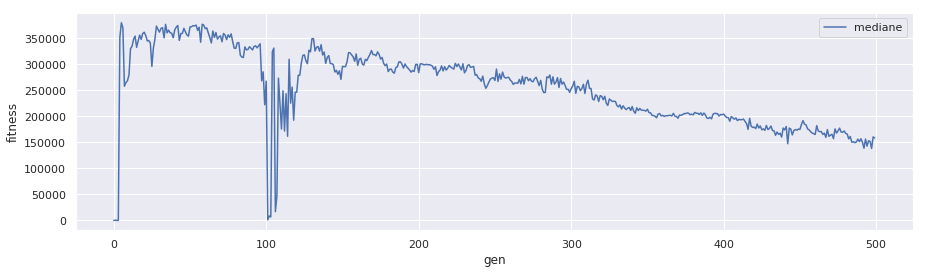

ind coop = 0


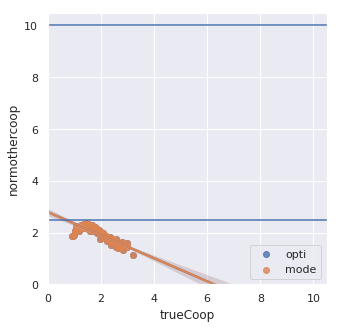

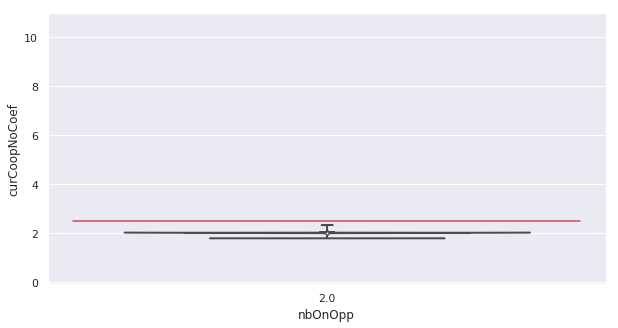

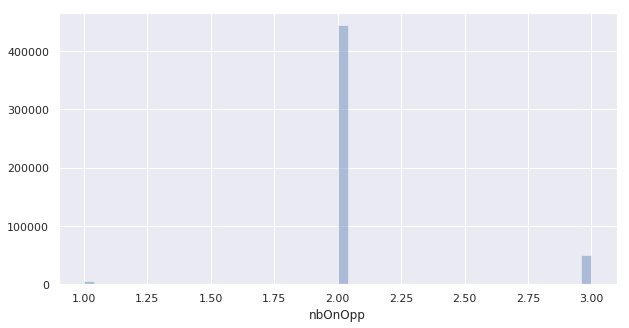

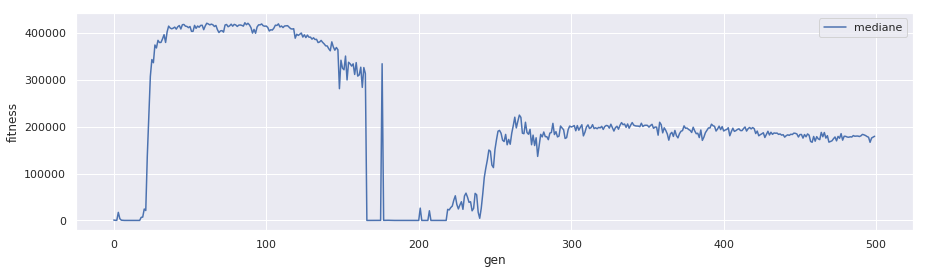

ind coop = 0


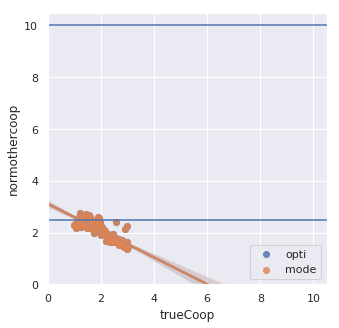

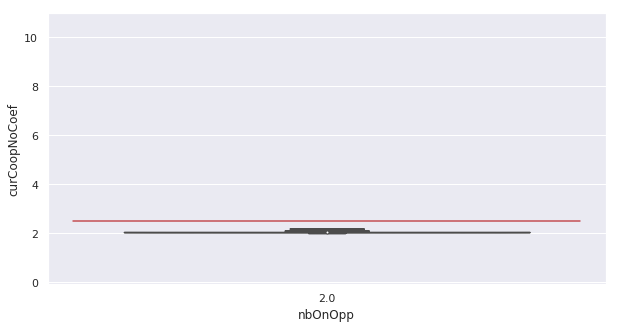

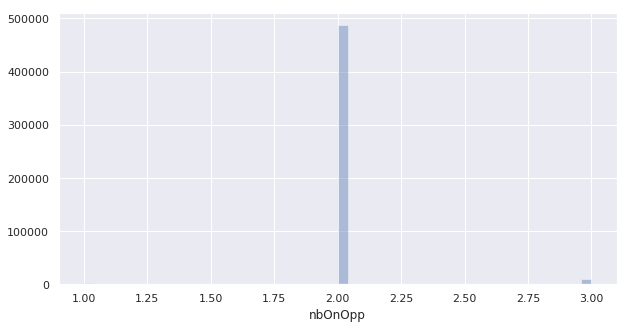

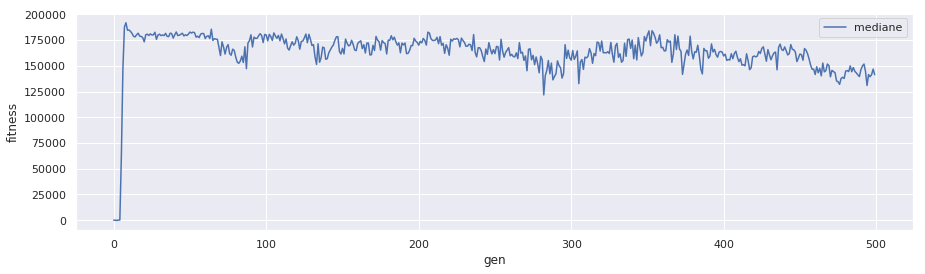

ind coop = 0


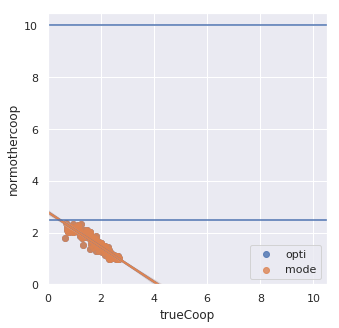

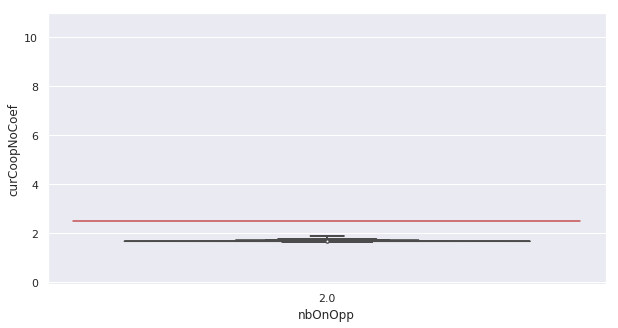

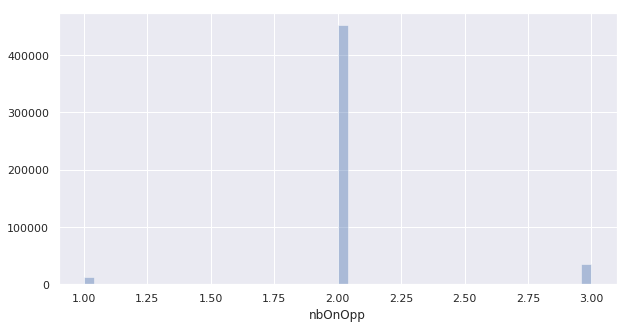

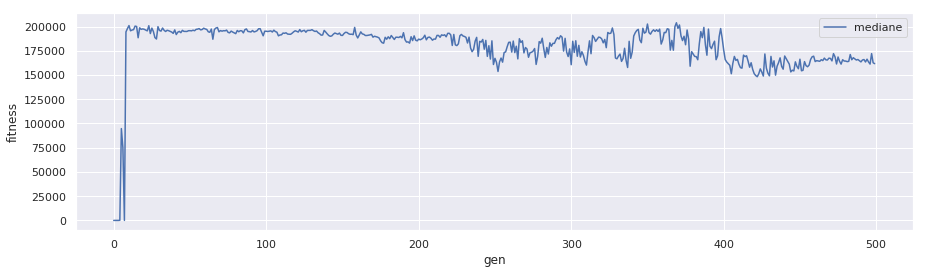

ind coop = 0


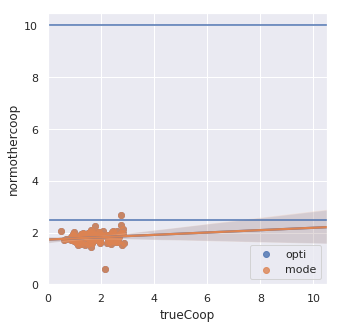

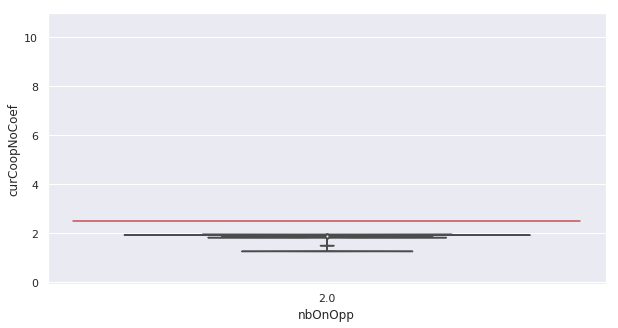

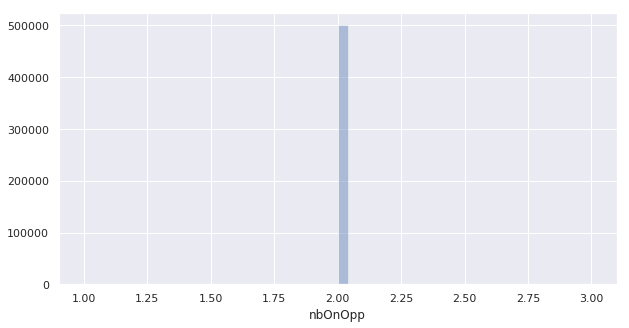

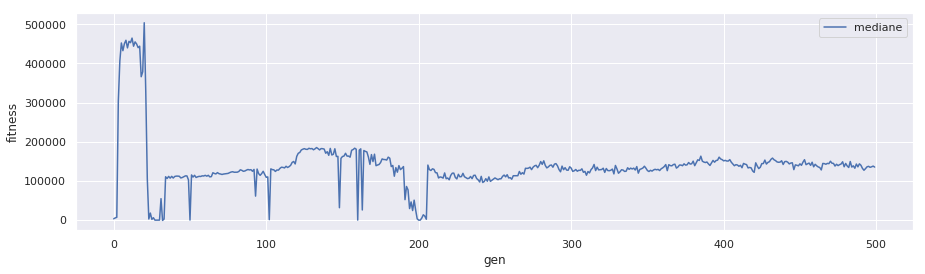

ind coop = 0


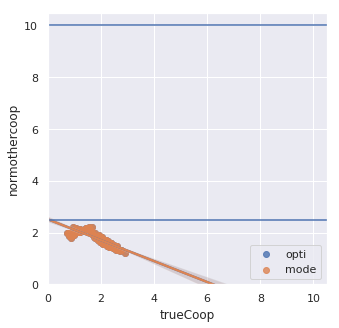

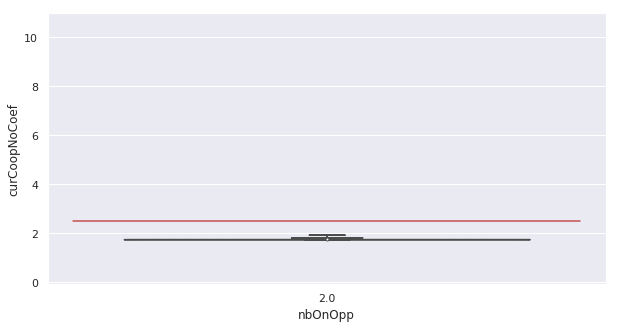

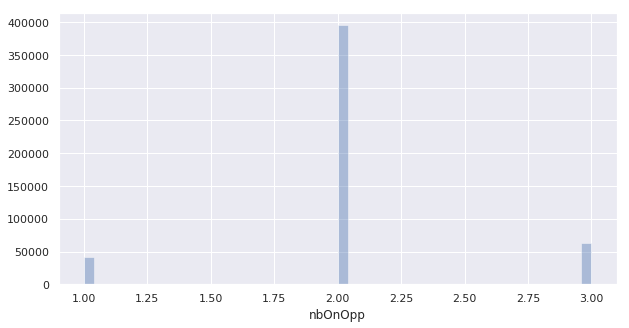

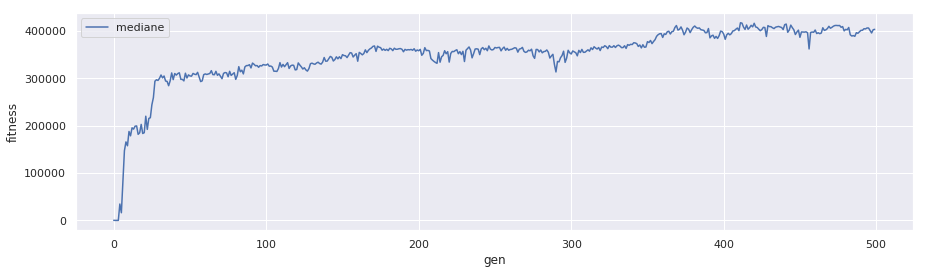

ind coop = 0


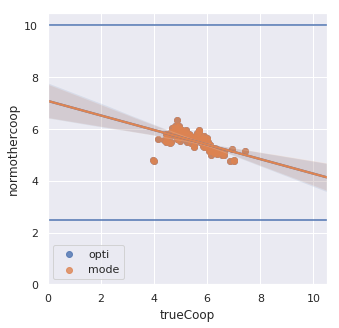

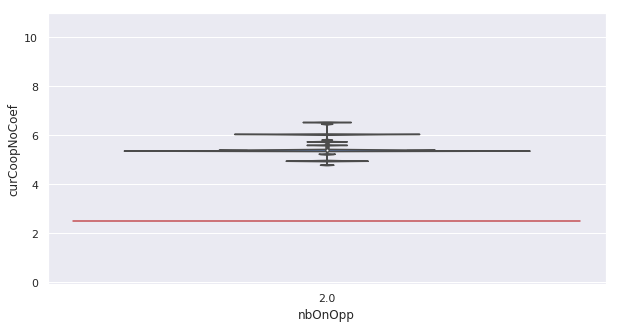

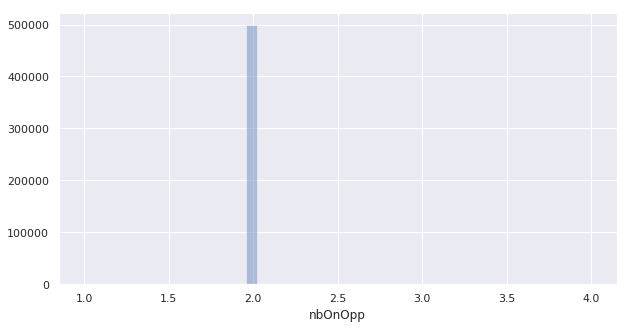

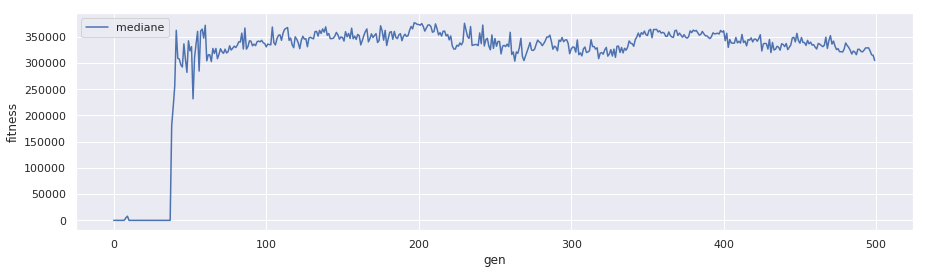

ind coop = 0


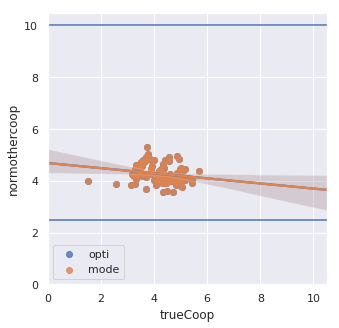

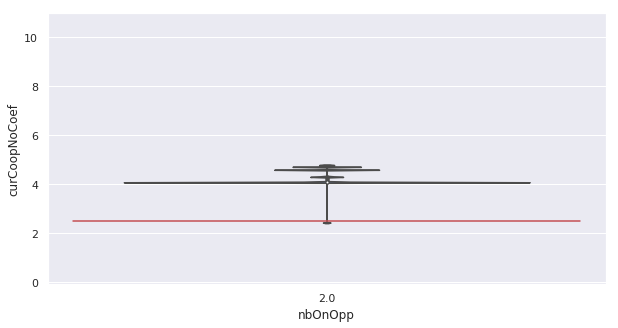

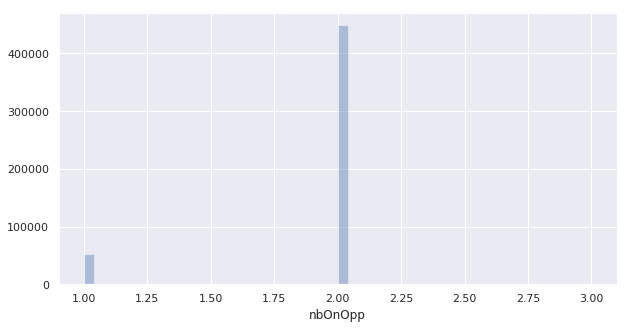

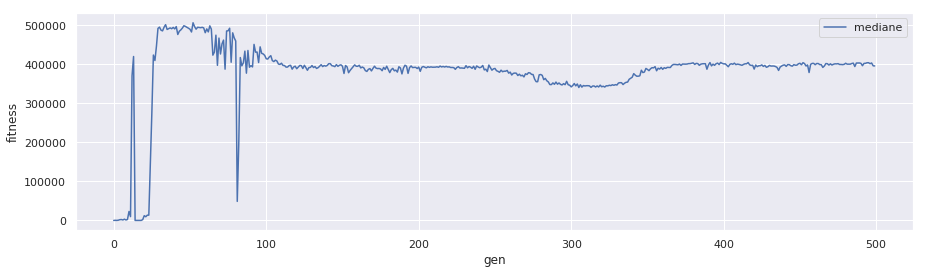

ind coop = 0


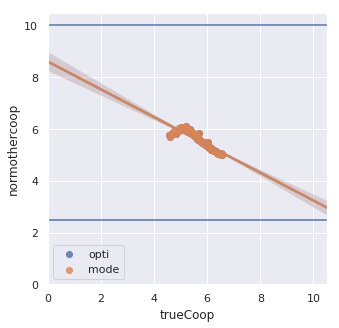

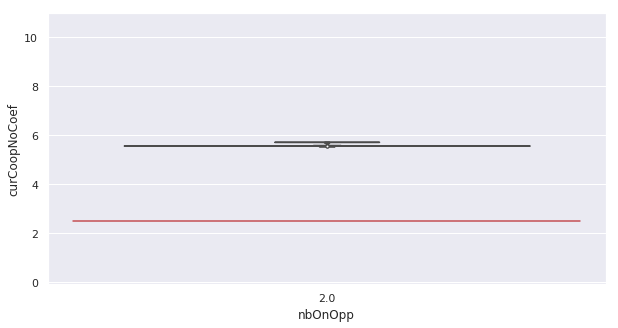

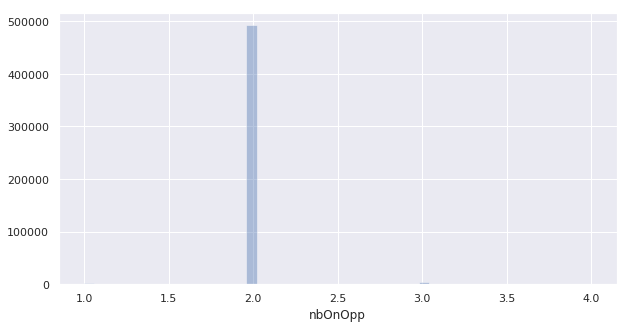

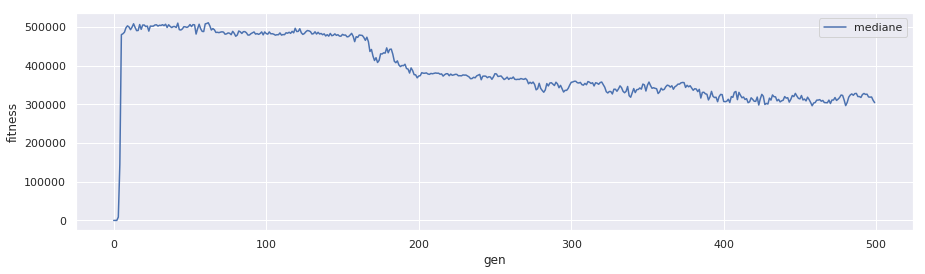

ind coop = 0


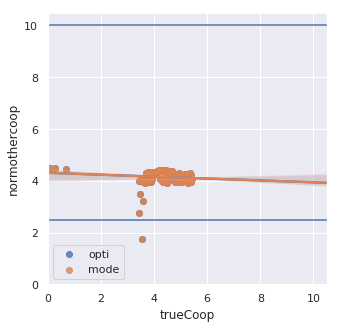

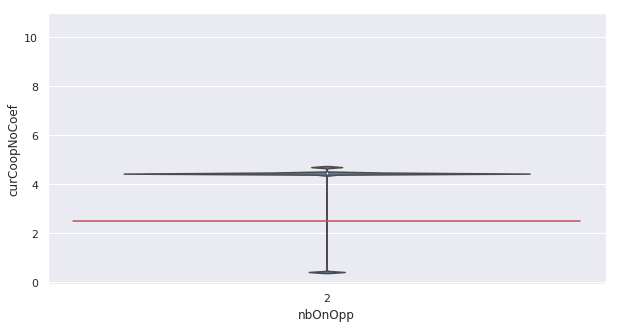

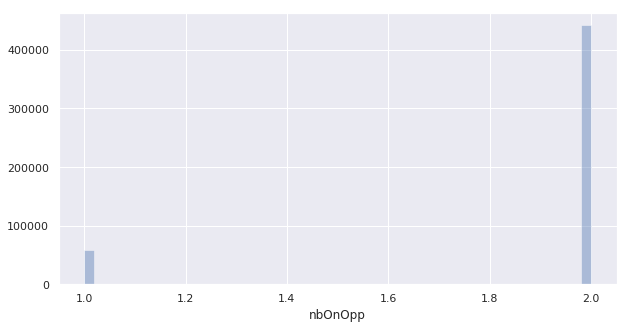

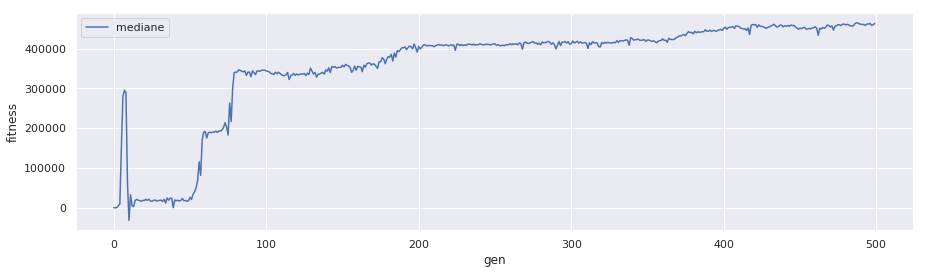

ind coop = 0


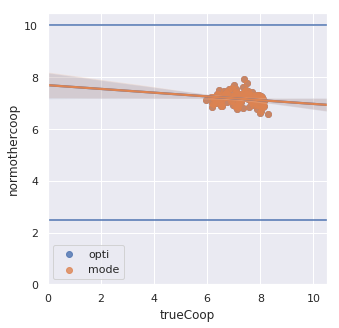

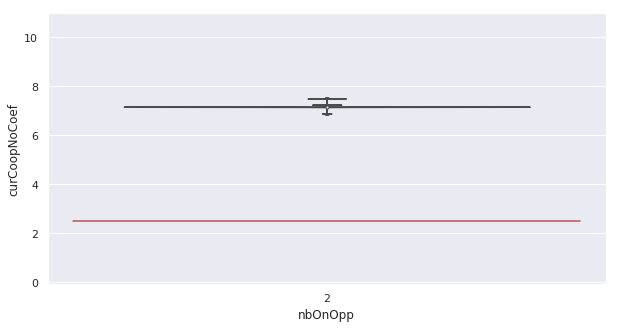

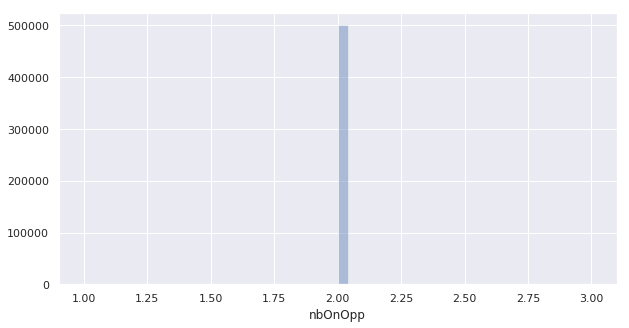

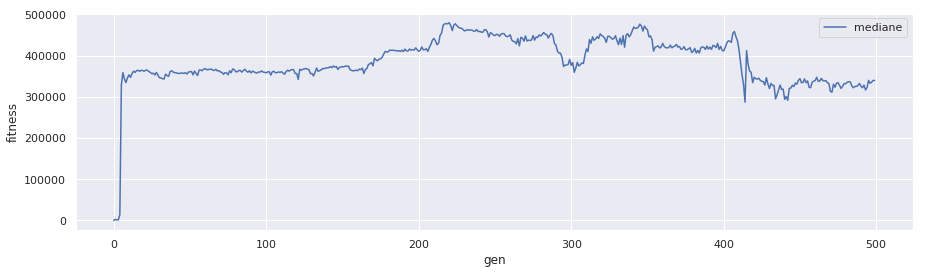

ind coop = 0


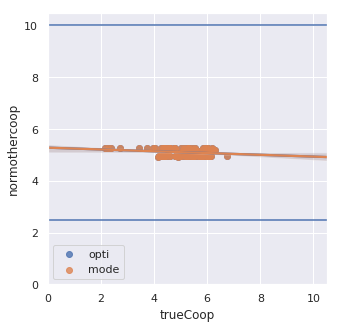

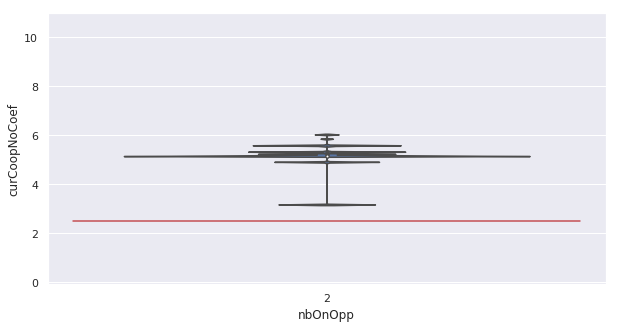

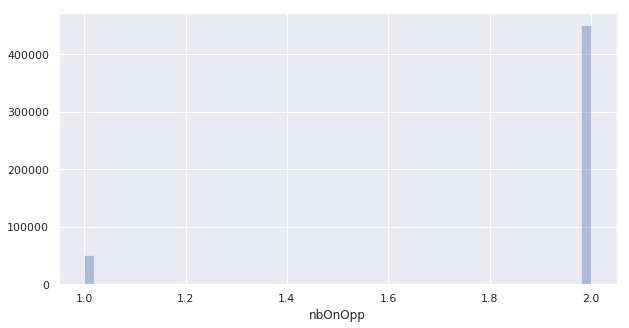

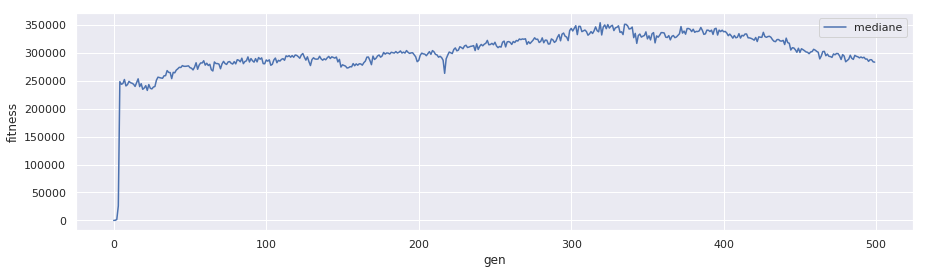

ind coop = 0


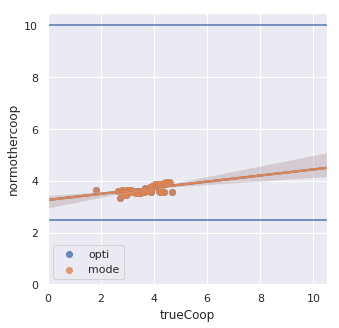

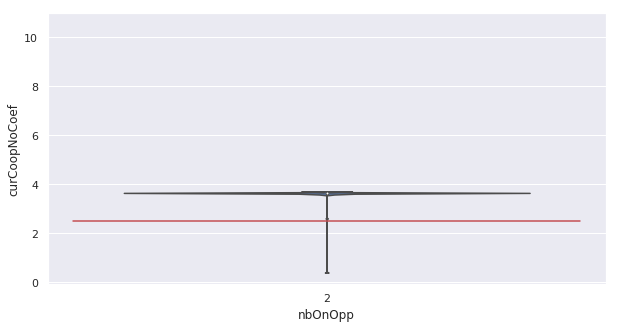

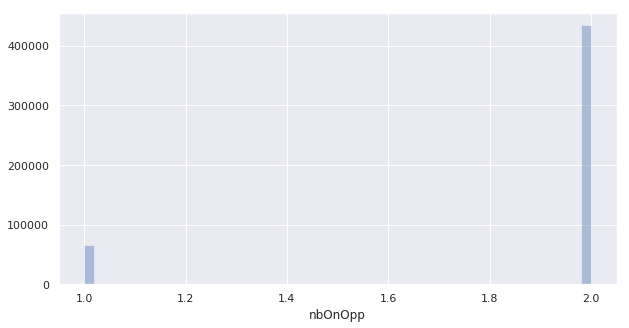

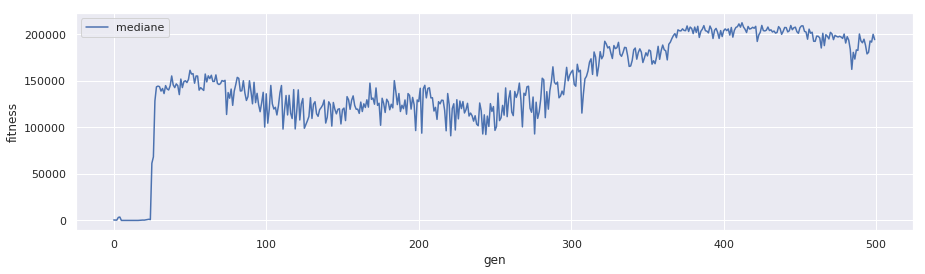

ind coop = 0


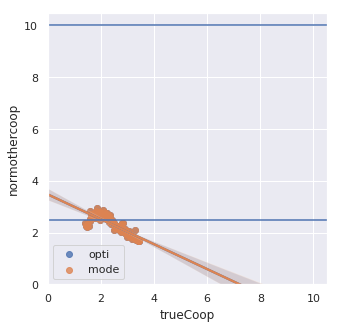

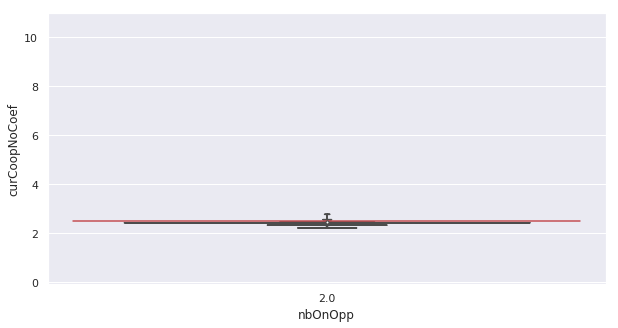

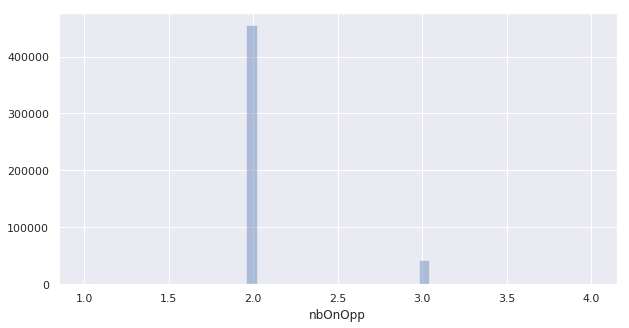

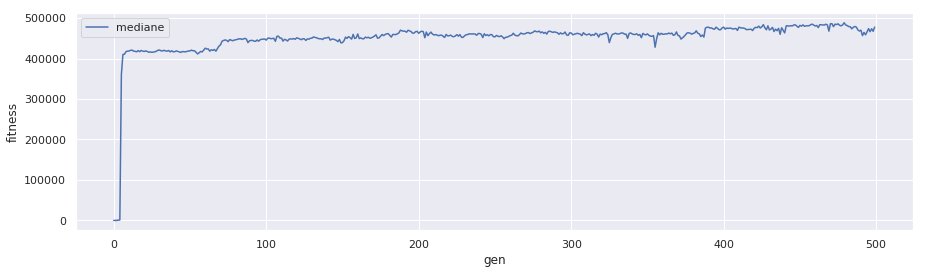

ind coop = 0


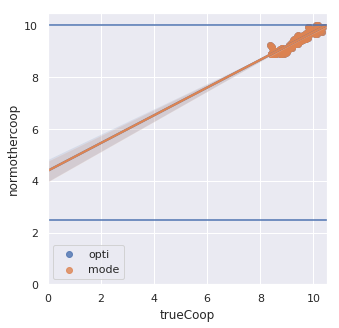

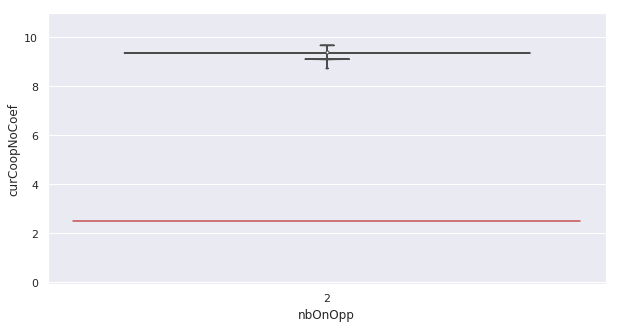

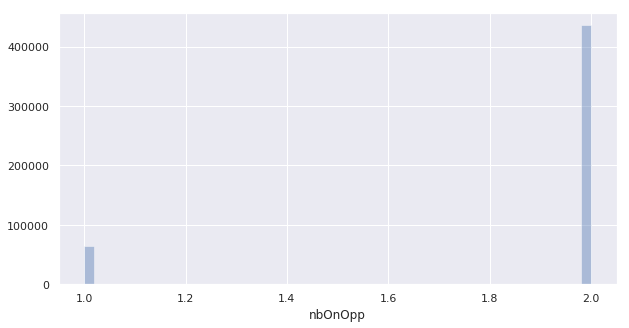

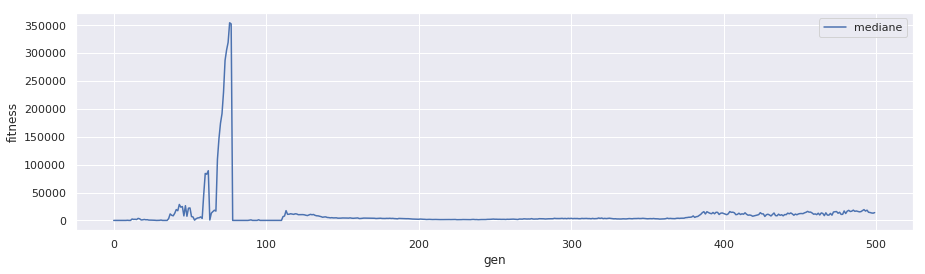

ind coop = 0


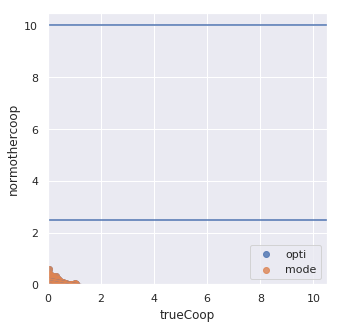

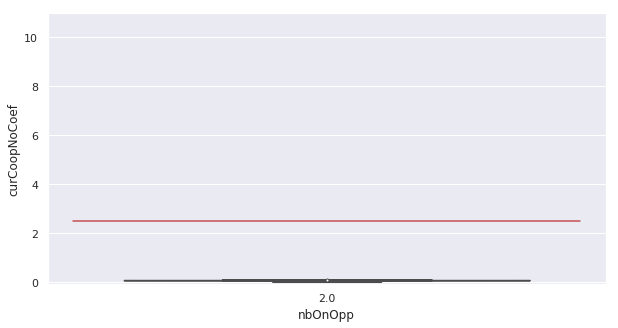

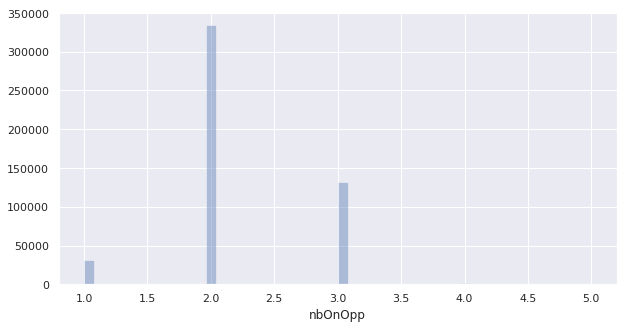

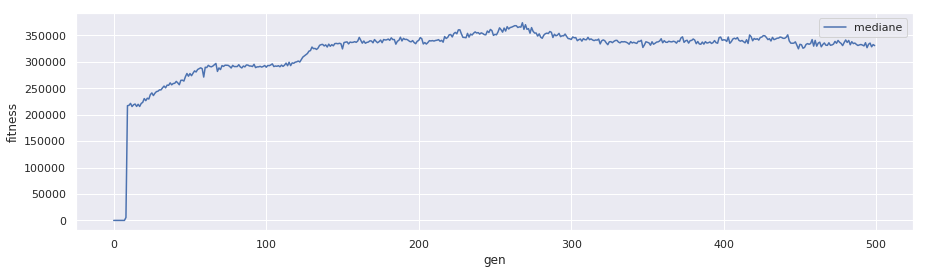

ind coop = 0


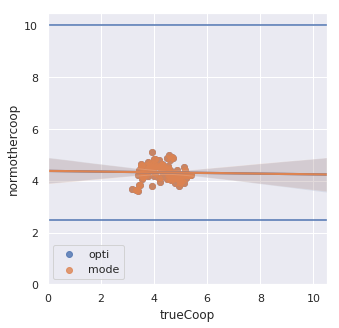

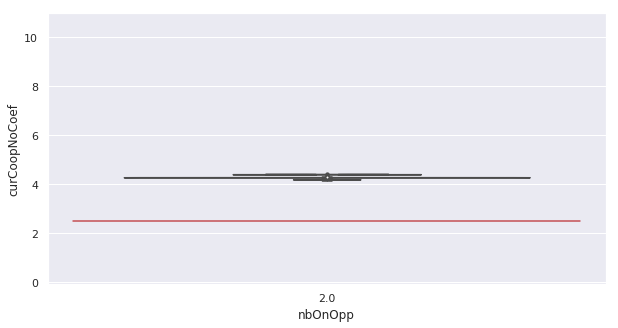

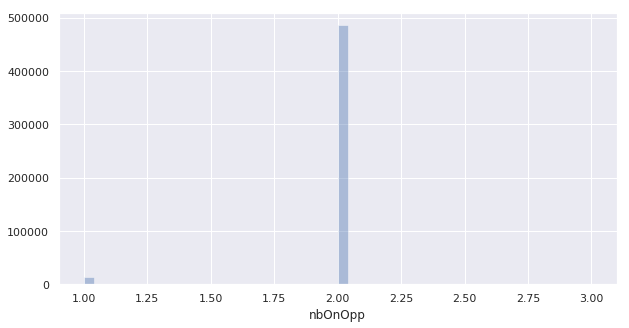

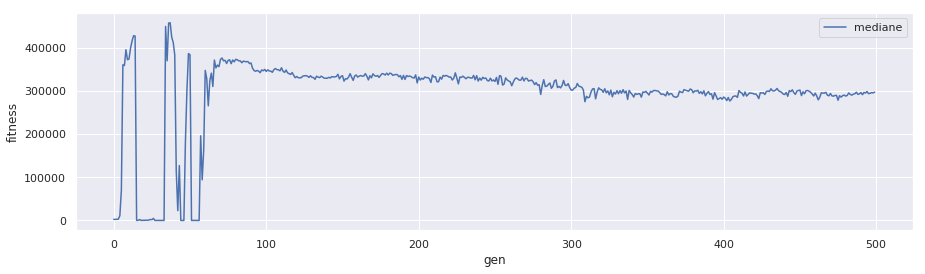

ind coop = 0


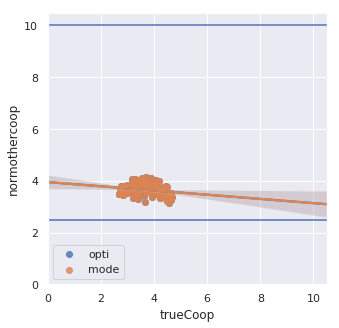

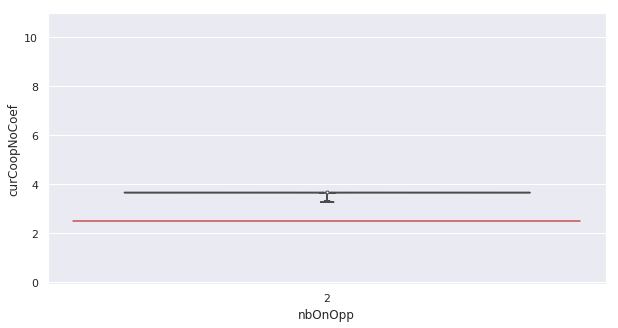

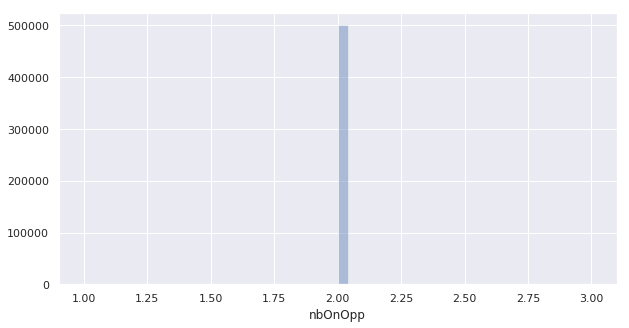

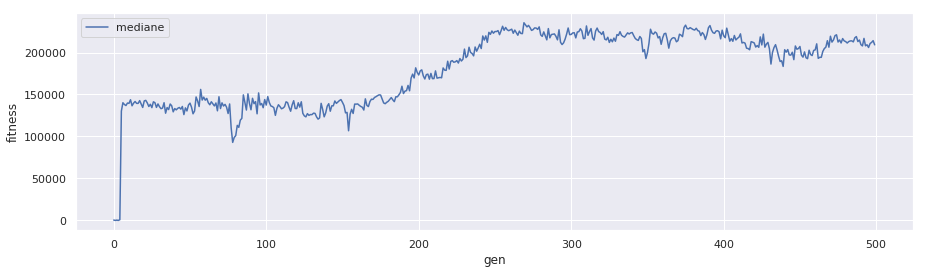

ind coop = 0


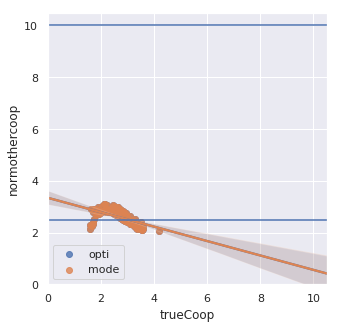

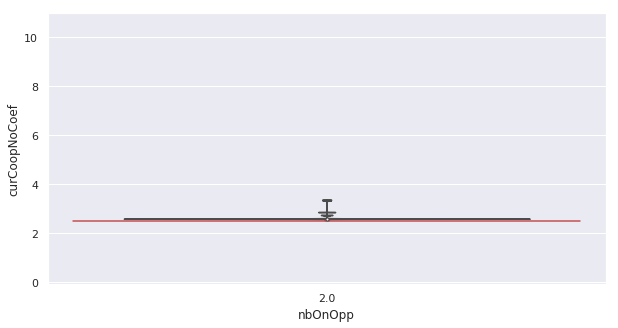

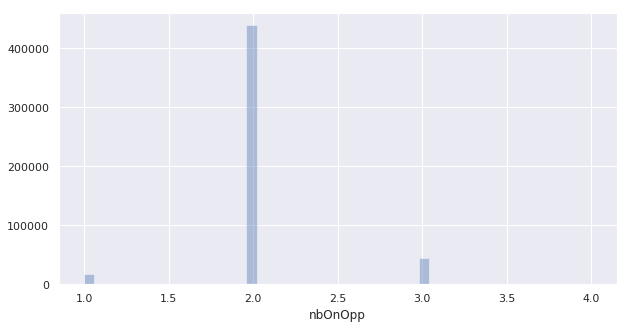

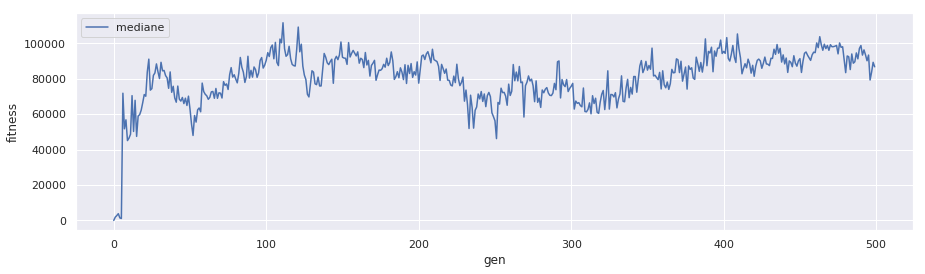

ind coop = 0


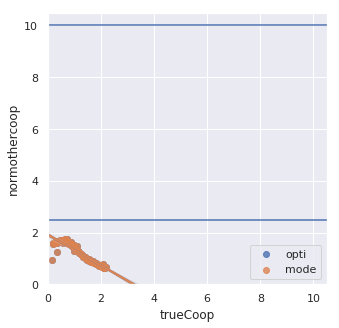

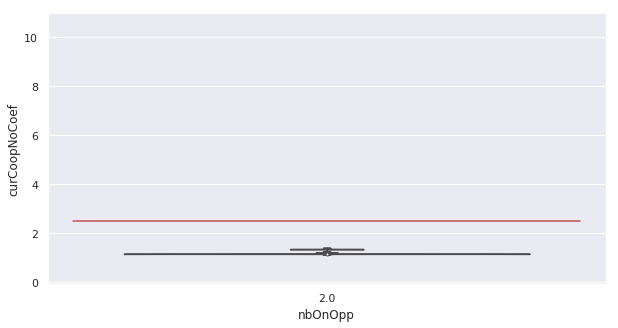

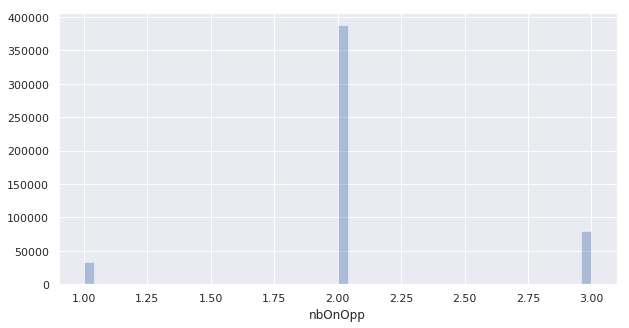

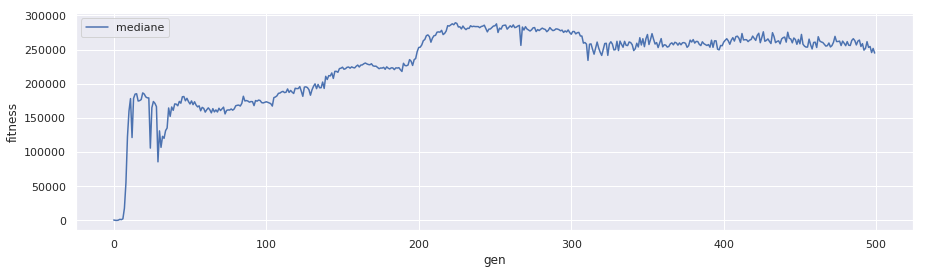

ind coop = 0


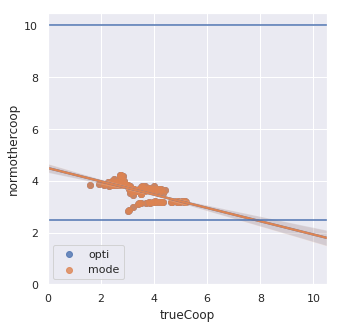

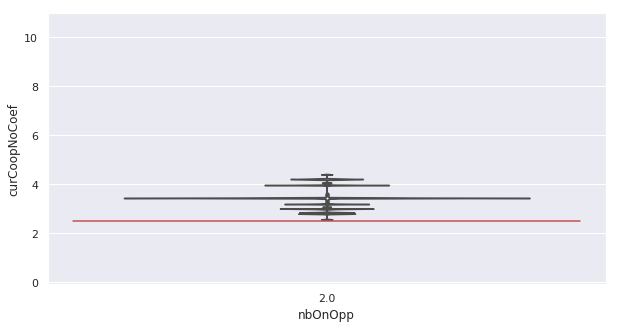

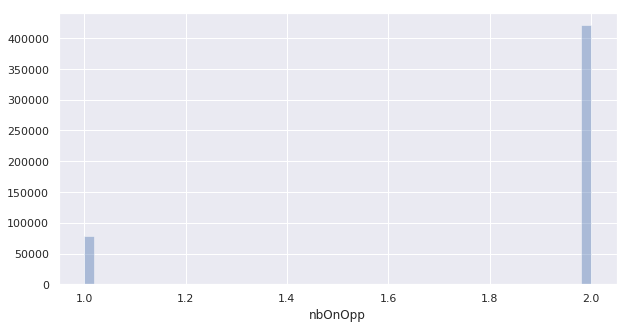

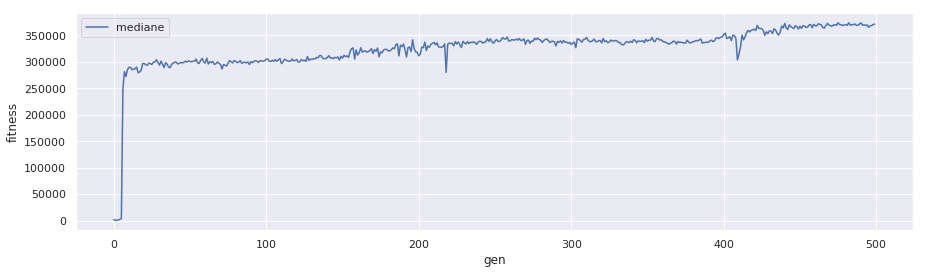

ind coop = 0


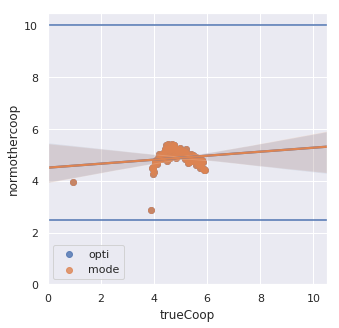

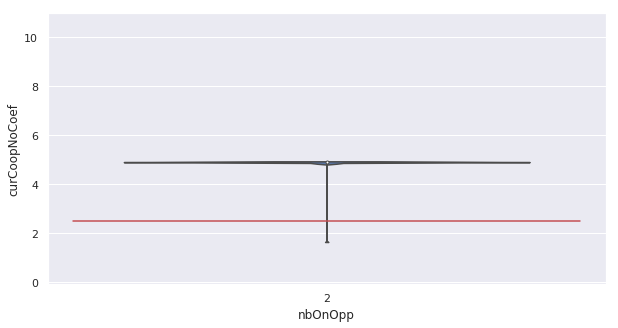

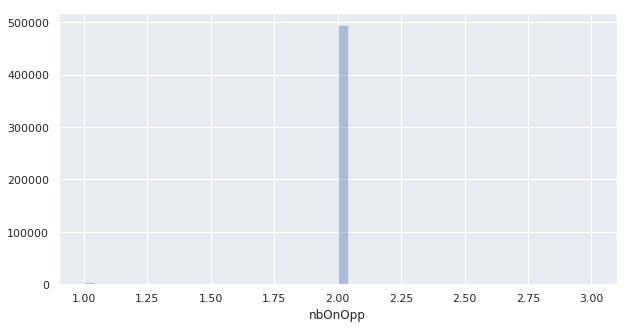

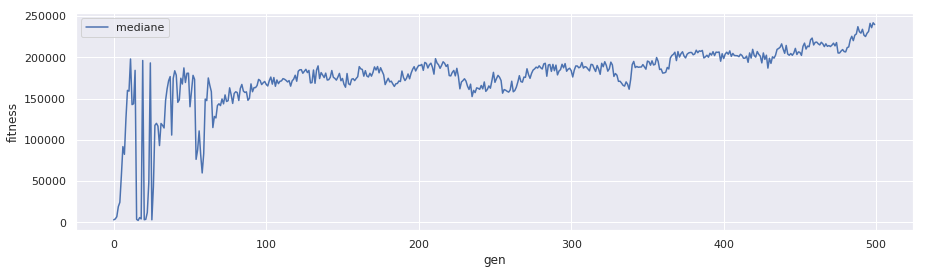

ind coop = 0


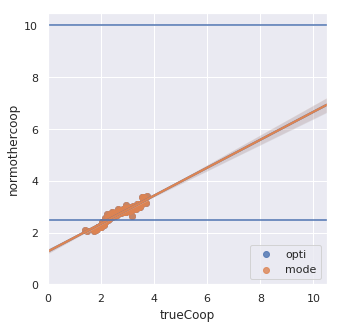

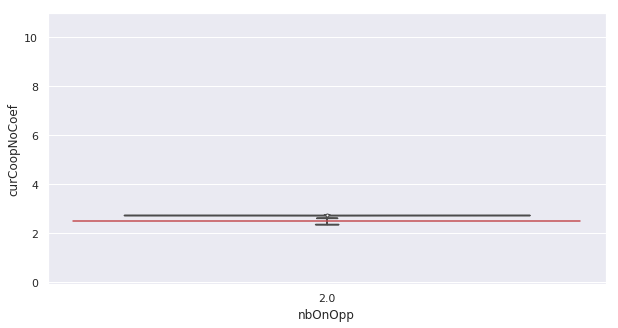

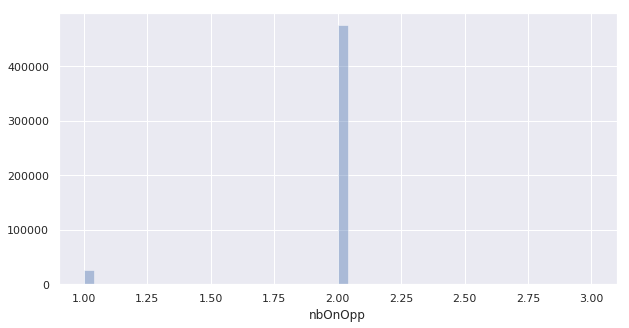

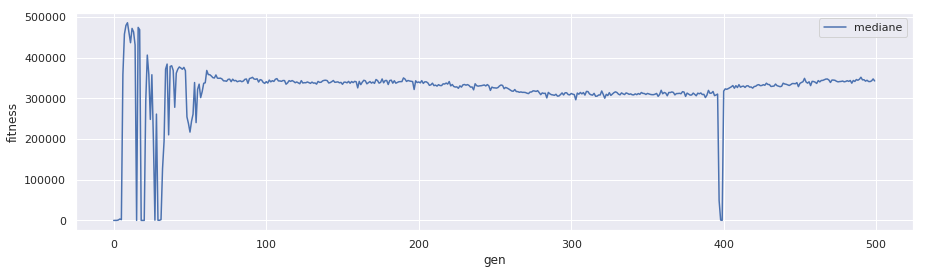

ind coop = 0


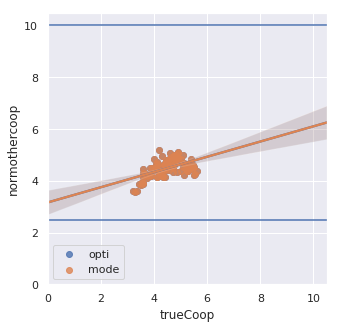

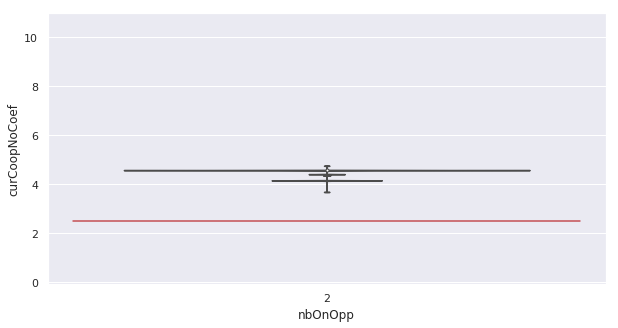

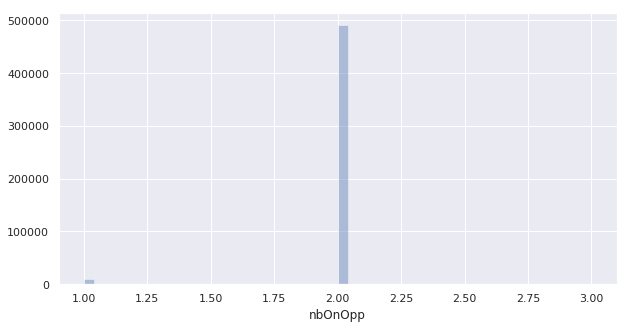

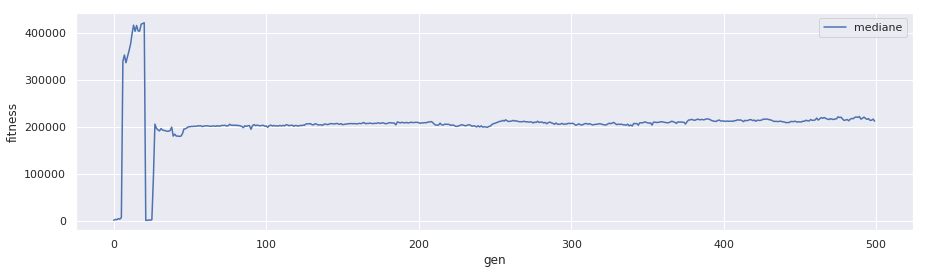

ind coop = 0


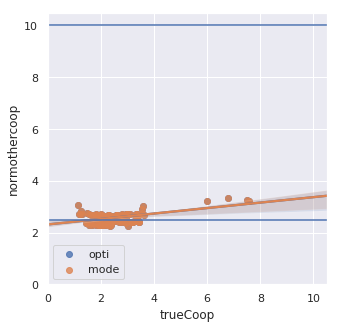

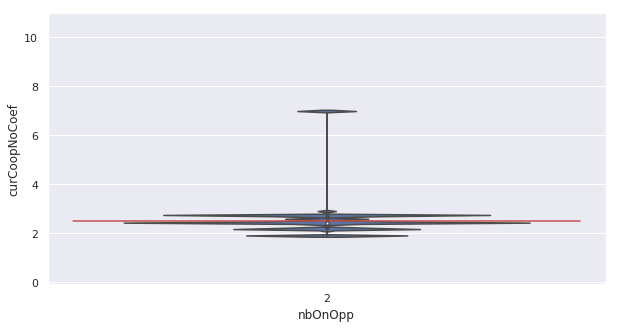

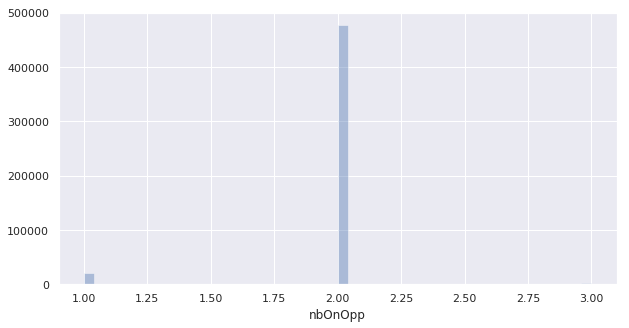

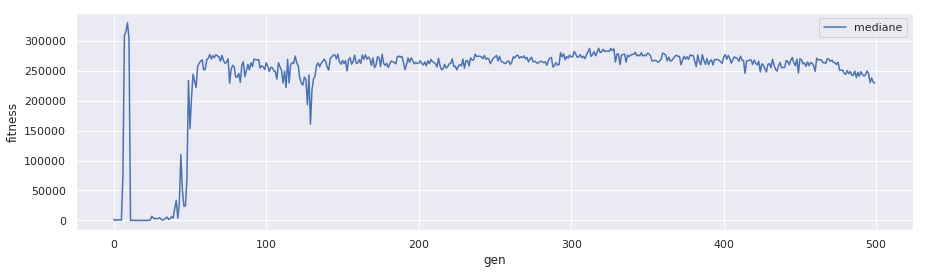

ind coop = 0


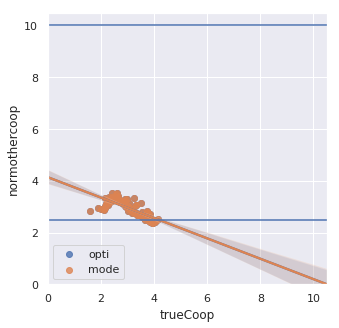

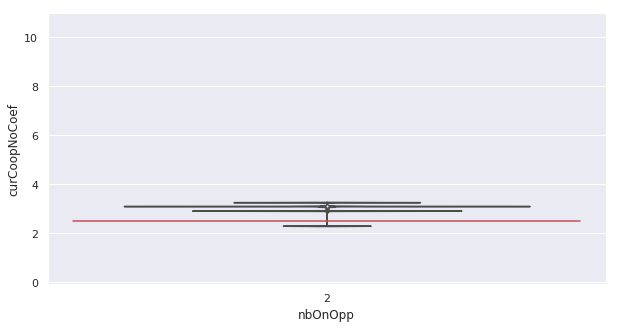

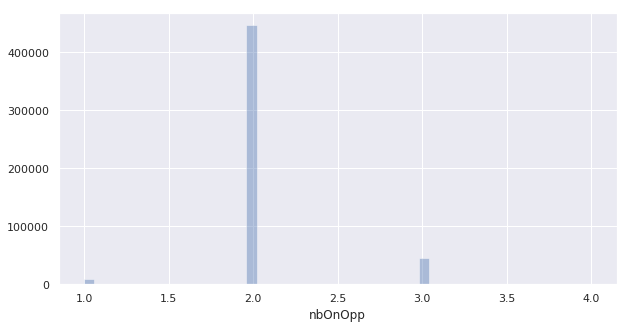

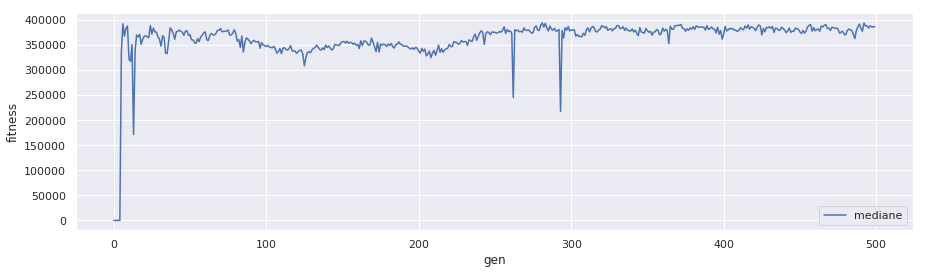

ind coop = 0


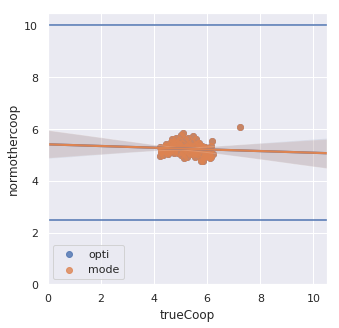

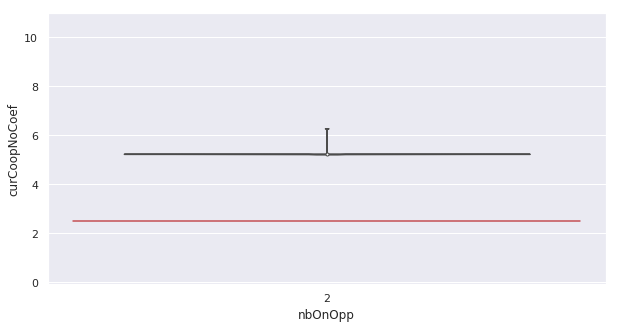

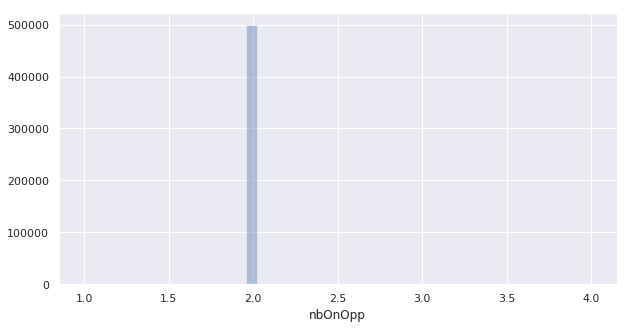

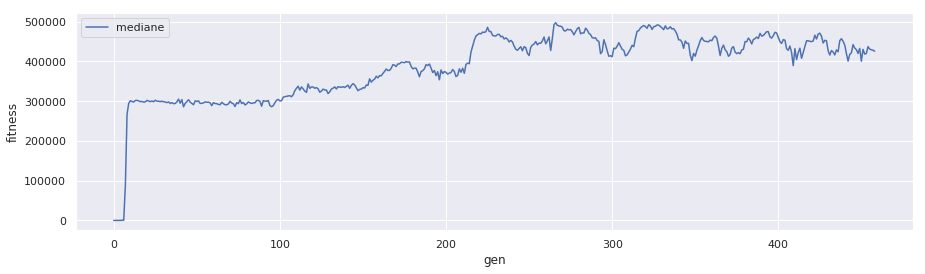

ind coop = 0


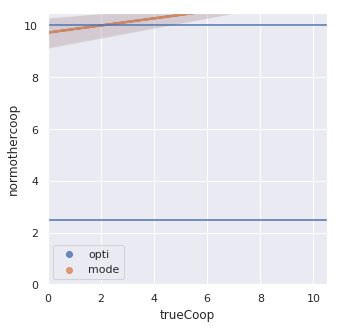

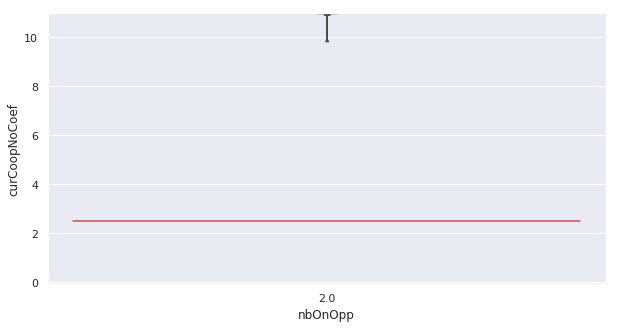

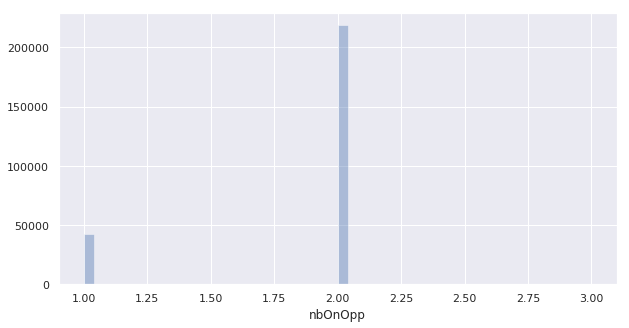

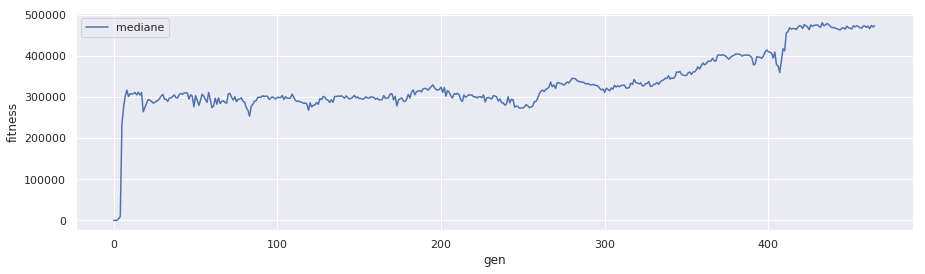

ind coop = 0


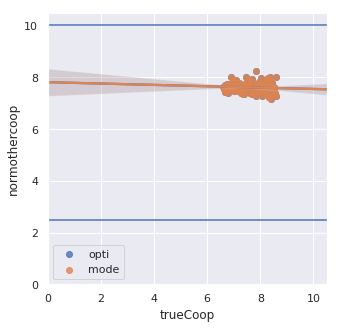

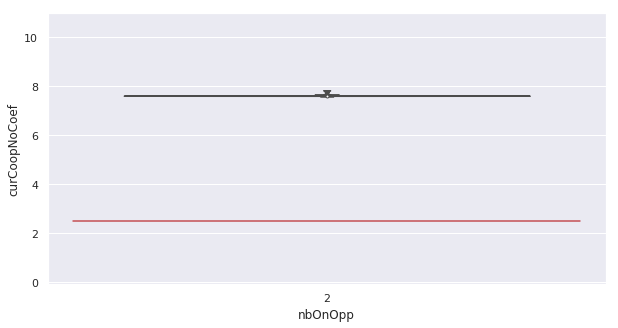

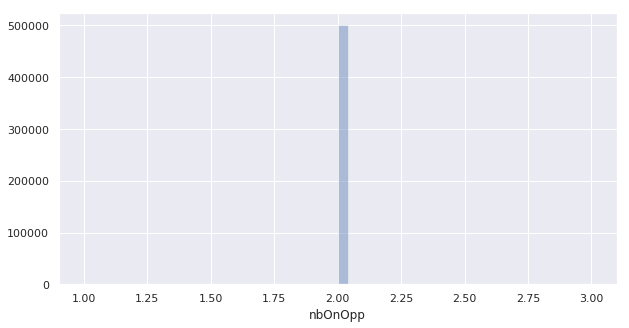

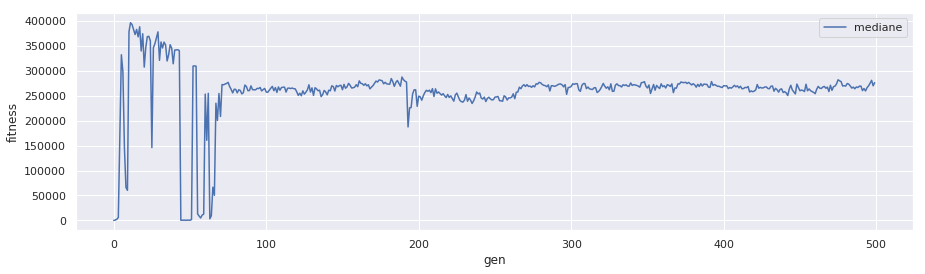

ind coop = 0


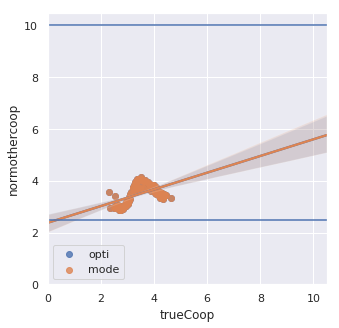

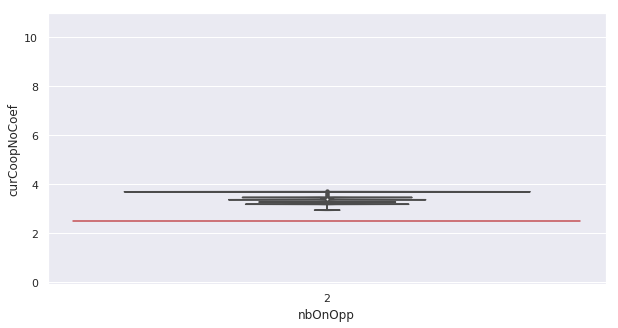

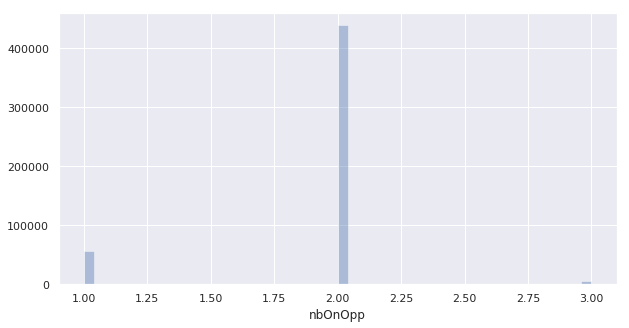

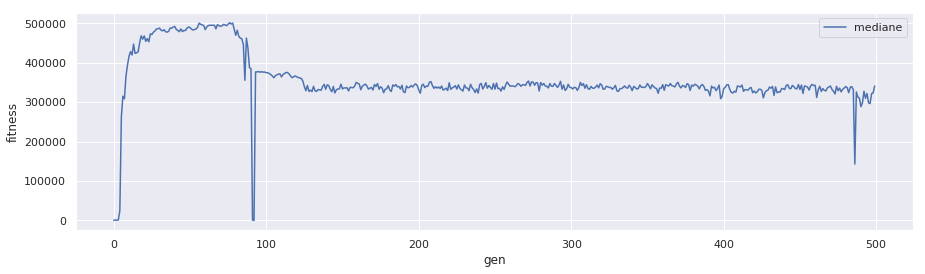

ind coop = 0


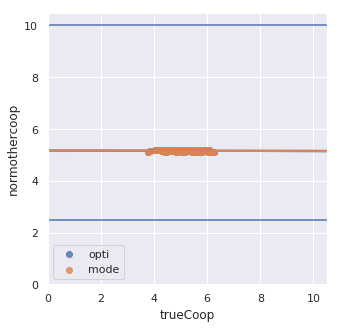

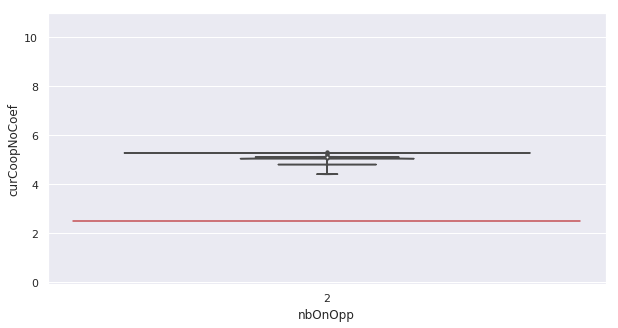

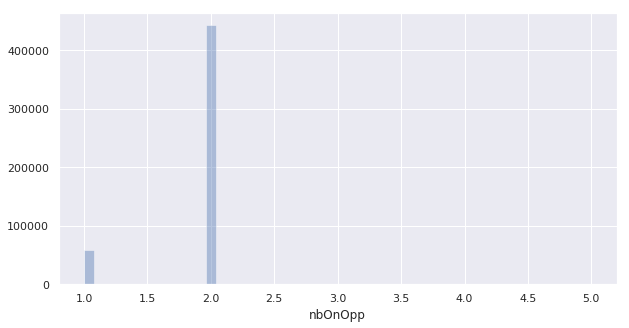

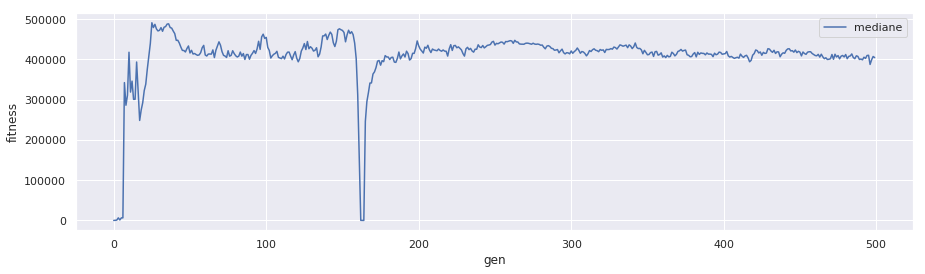

ind coop = 0


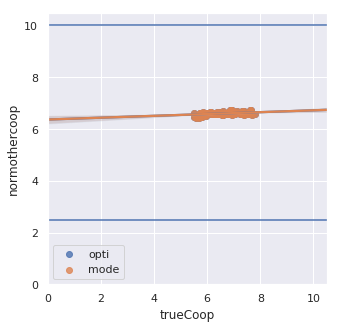

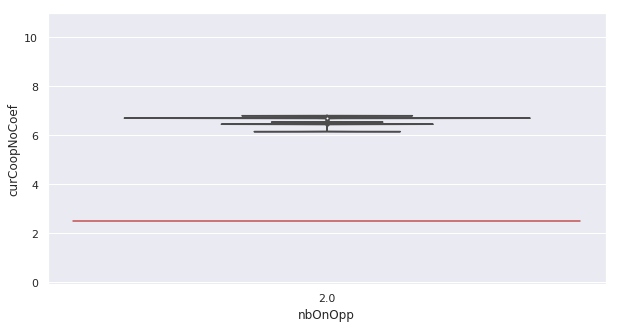

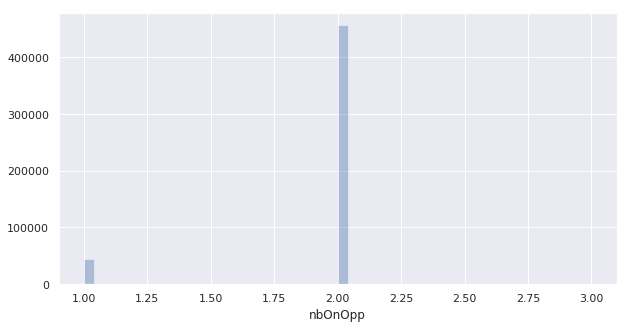

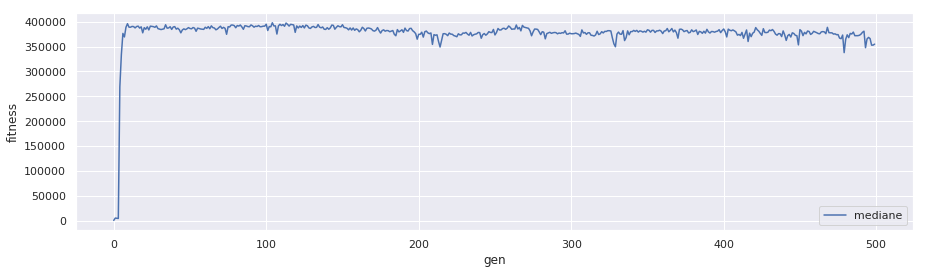

ind coop = 0


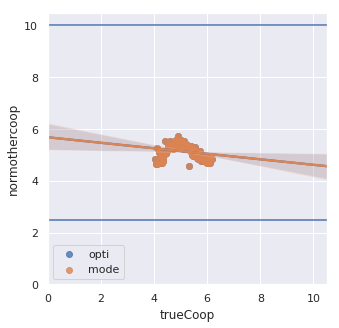

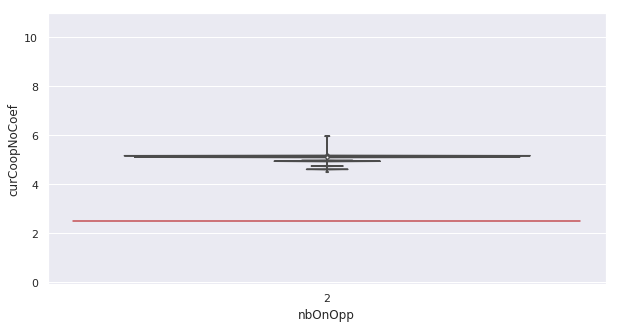

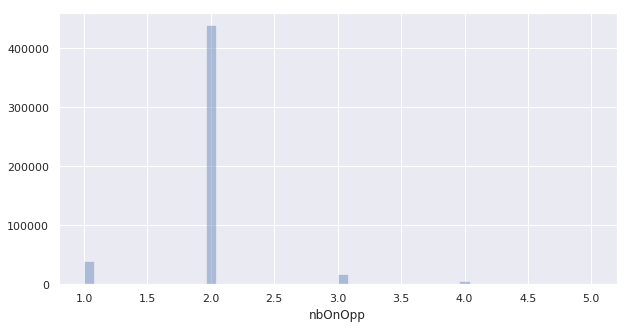

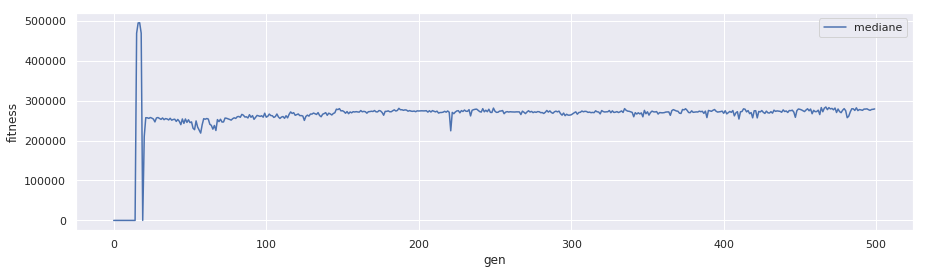

ind coop = 0


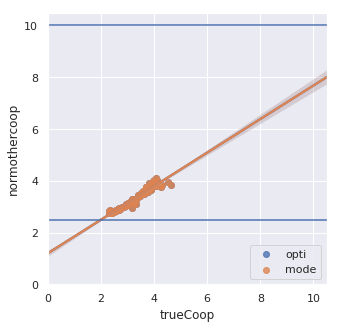

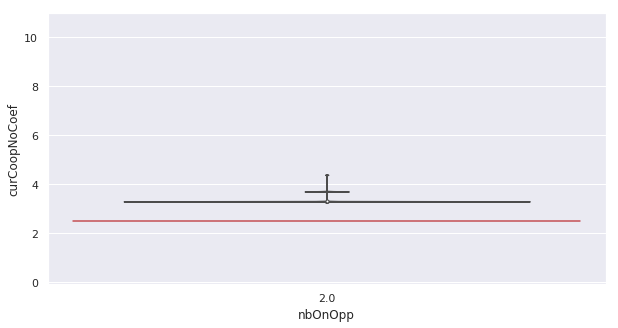

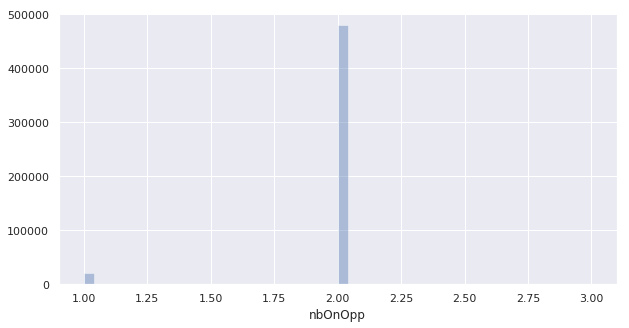

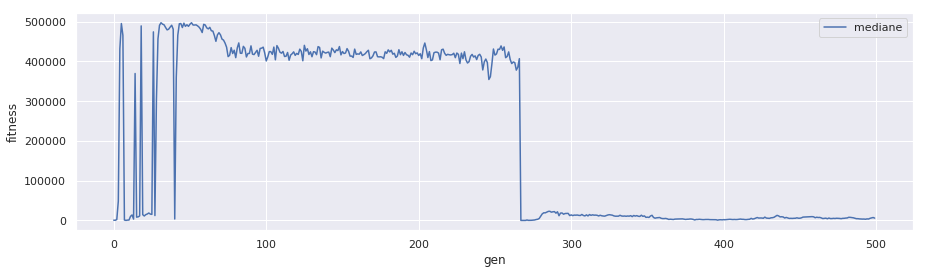

ind coop = 0


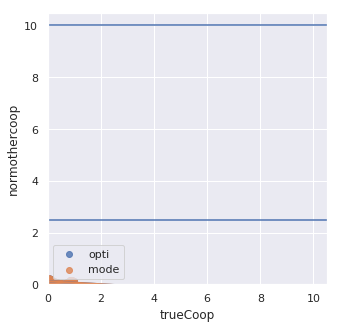

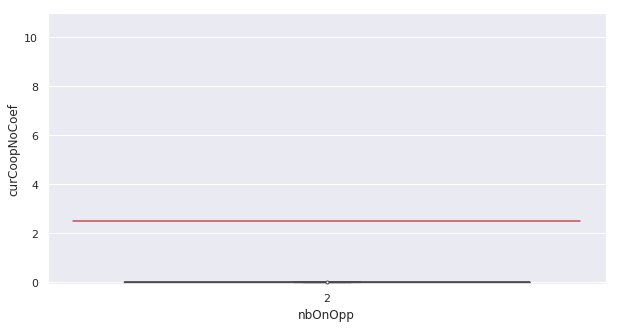

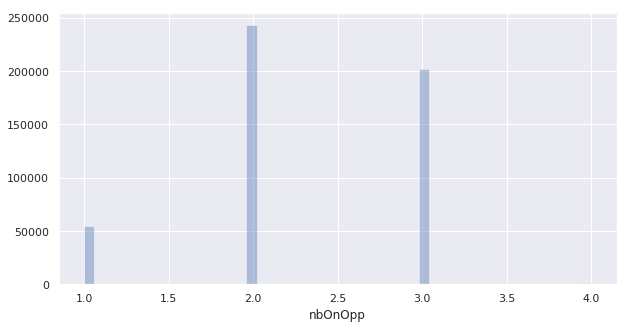

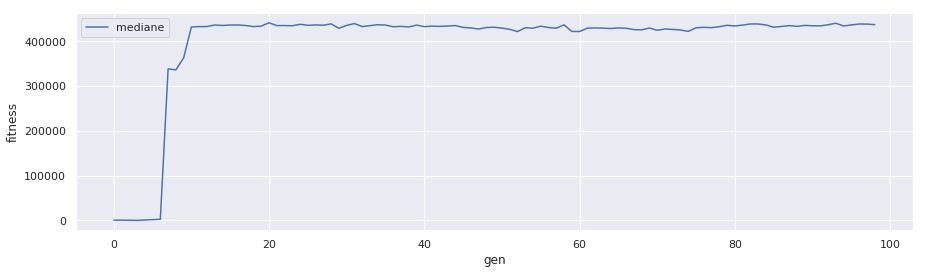

ind coop = 0


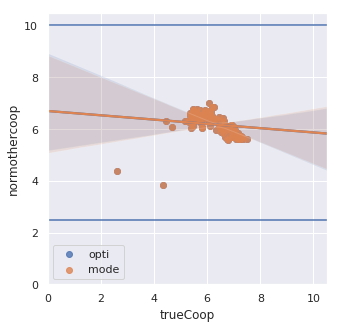

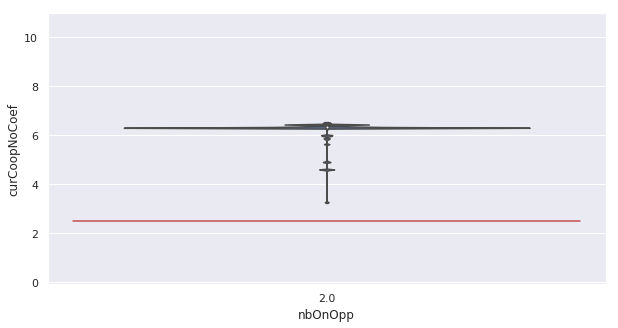

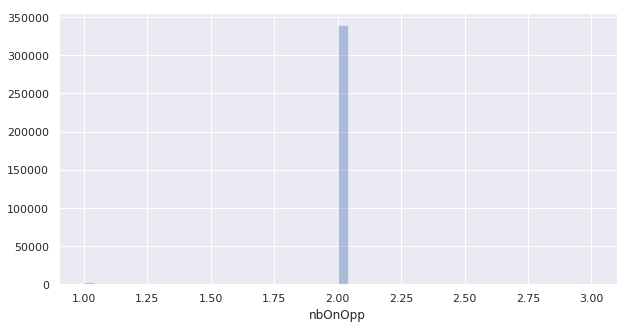

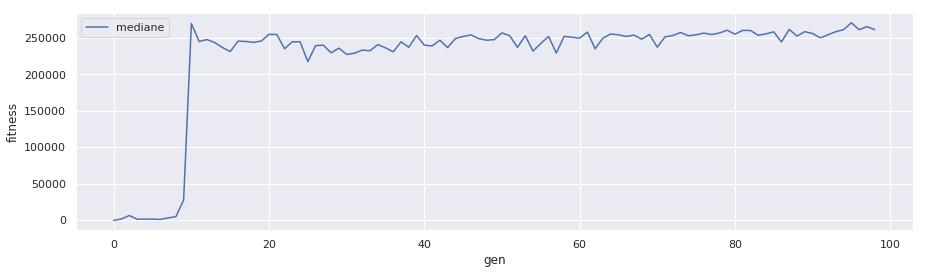

ind coop = 0


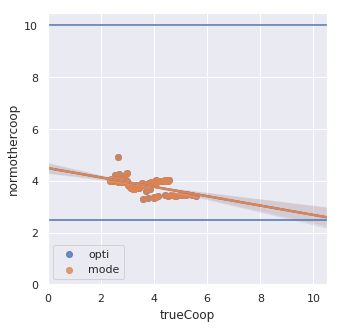

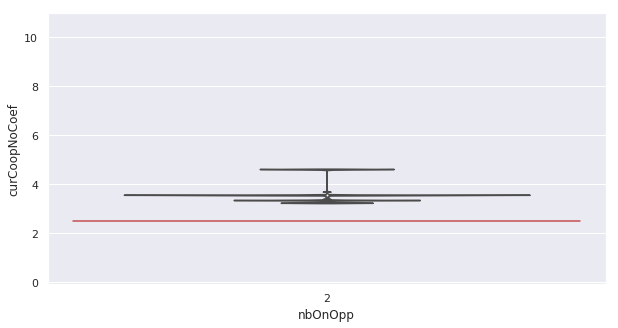

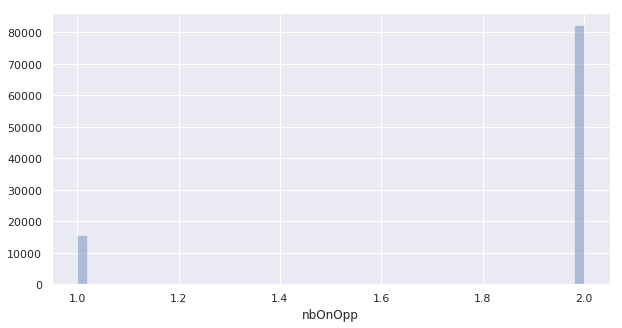

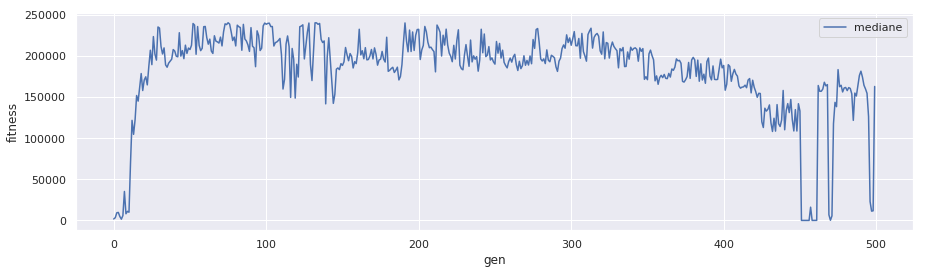

ind coop = 0


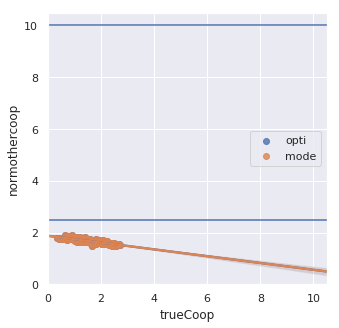

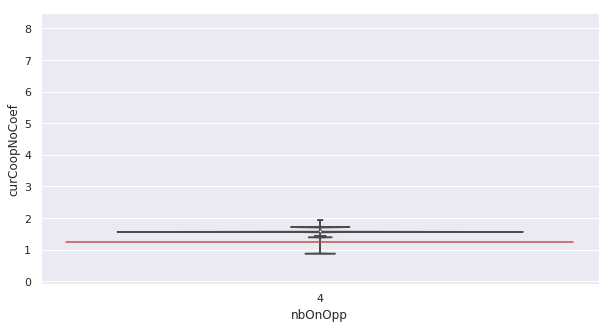

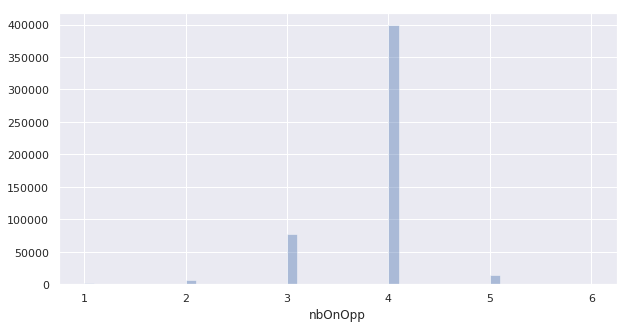

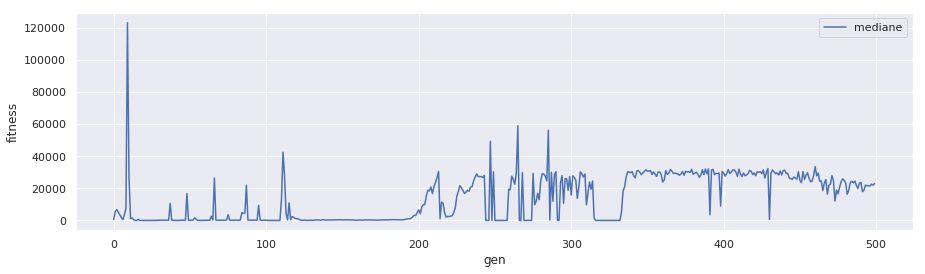

ind coop = 0


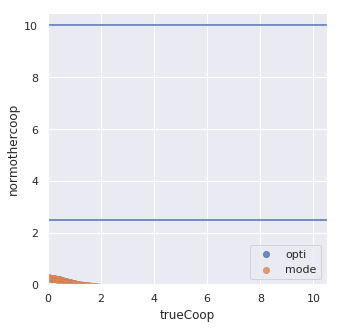

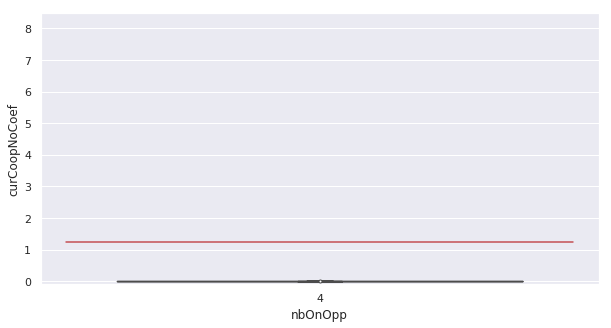

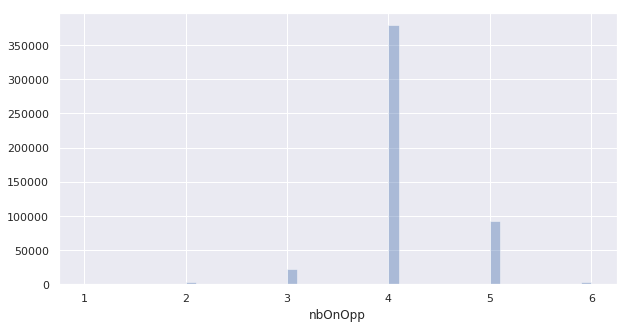

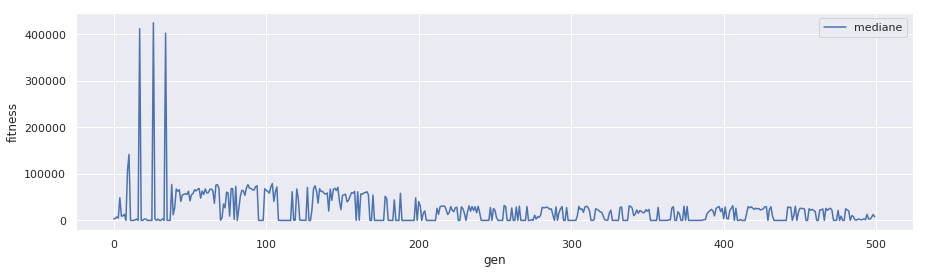

ind coop = 0


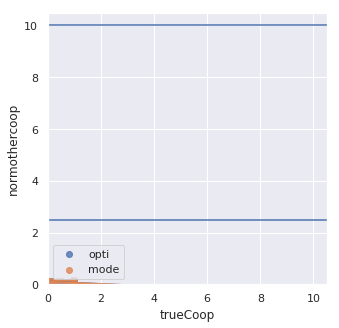

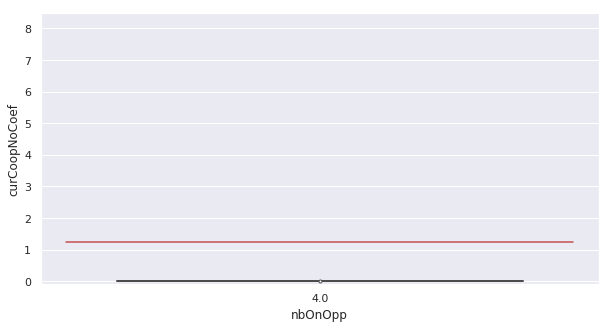

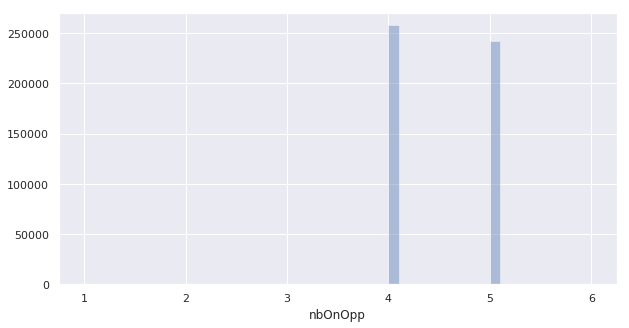

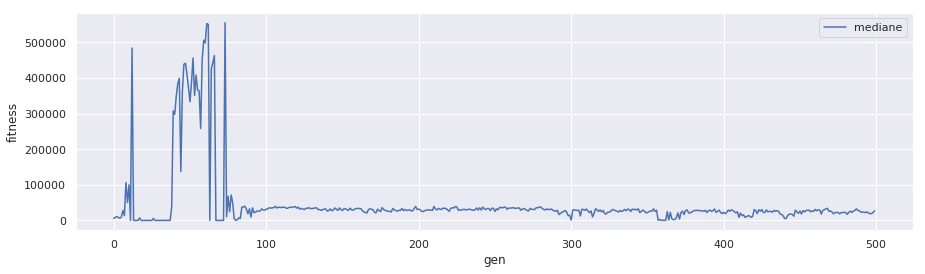

ind coop = 0


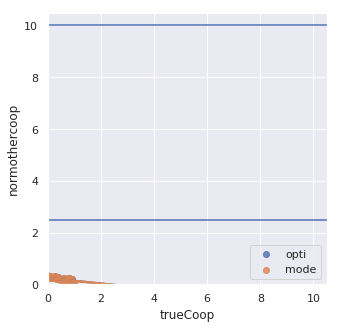

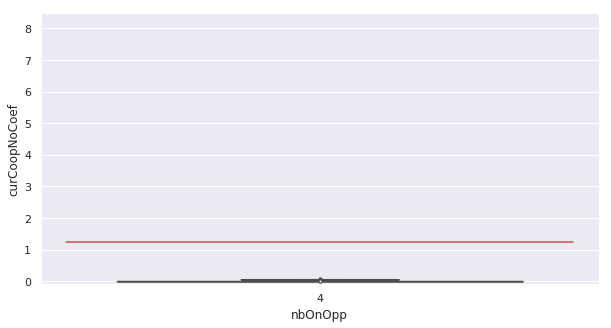

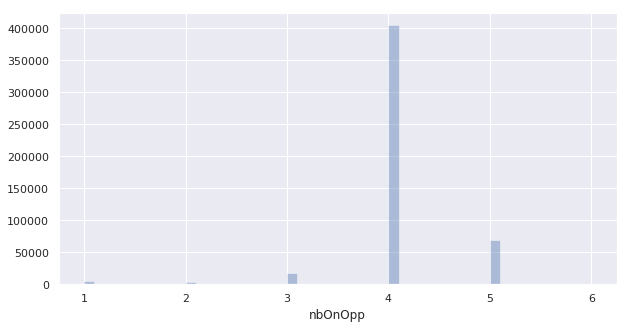

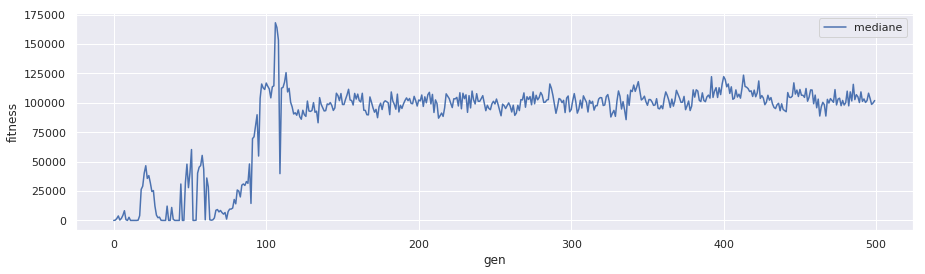

ind coop = 0


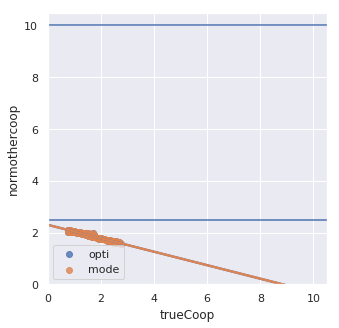

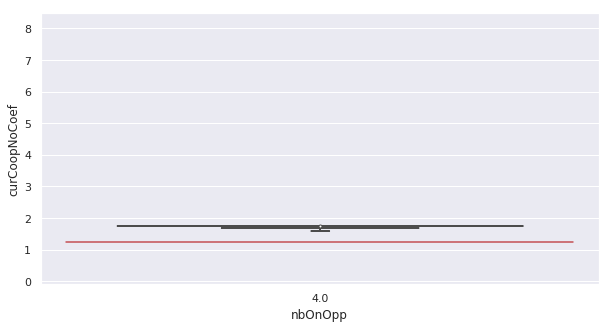

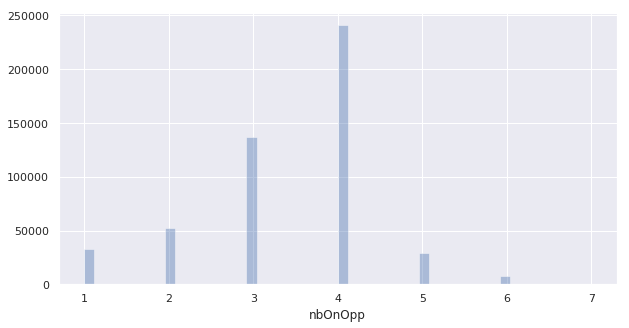

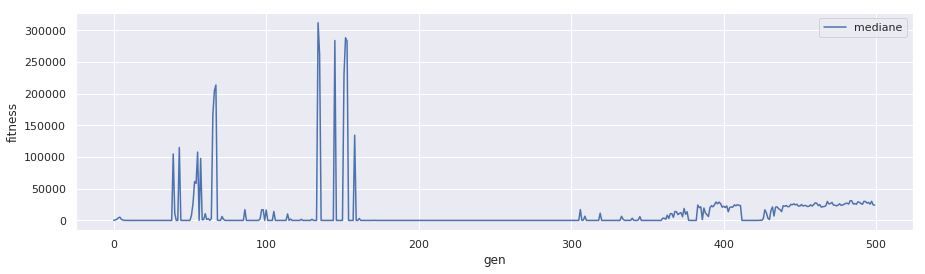

ind coop = 0


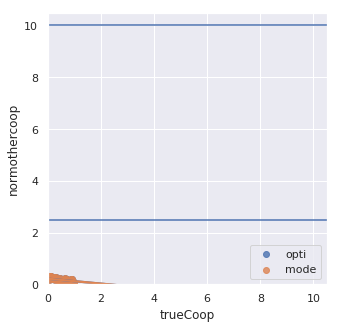

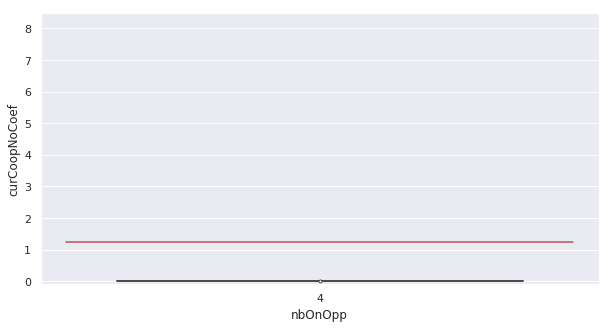

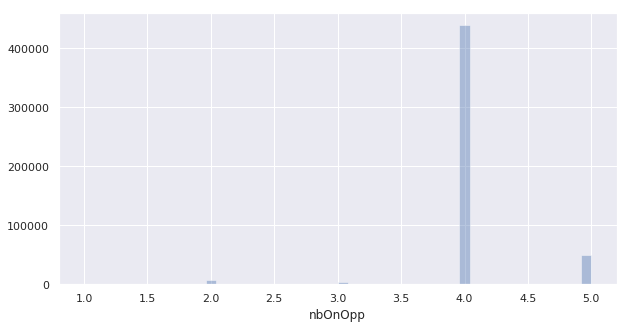

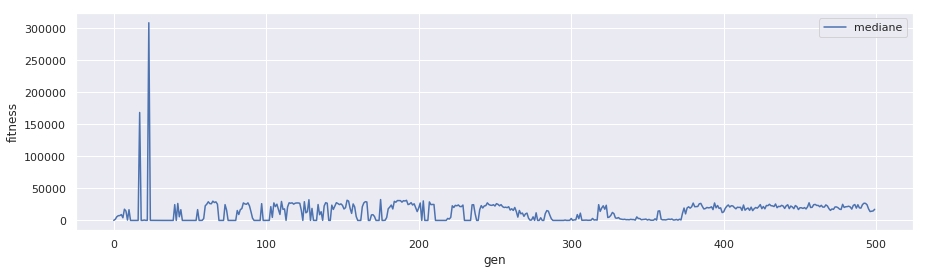

ind coop = 0


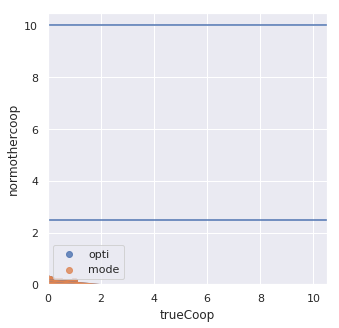

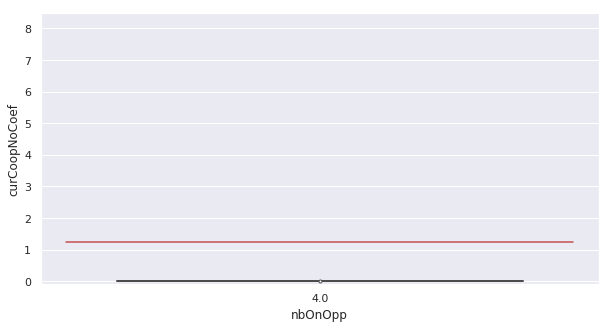

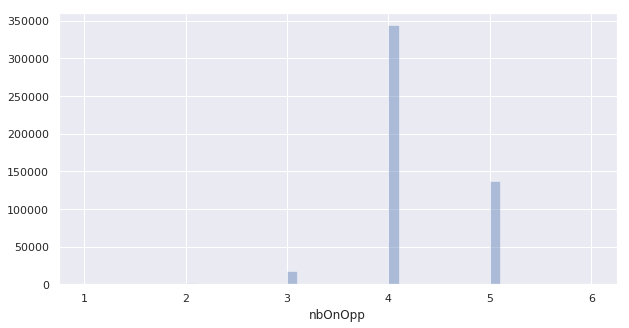

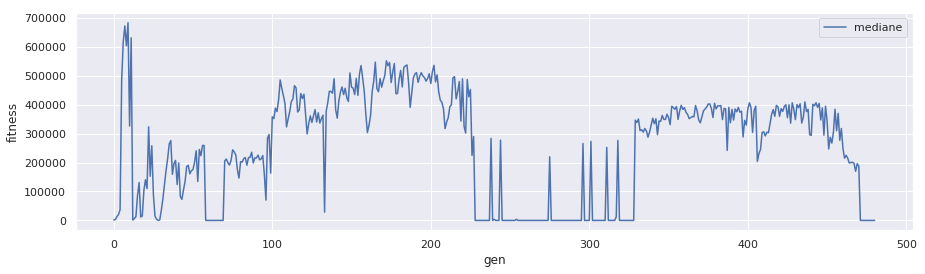

ind coop = 0


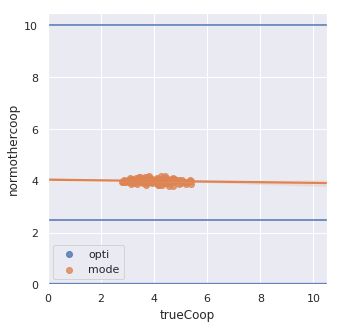

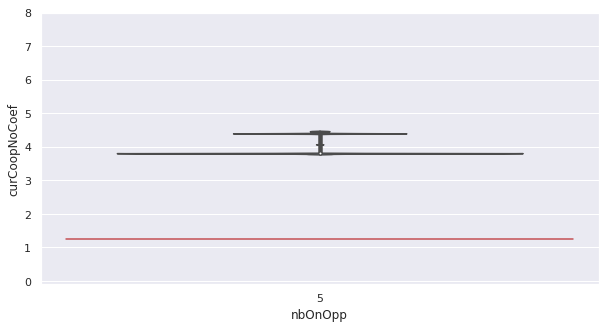

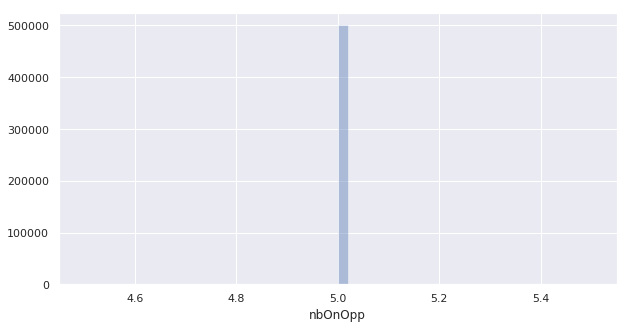

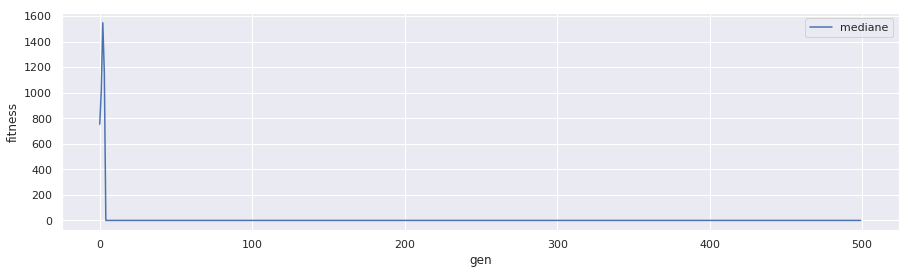

ind coop = 0


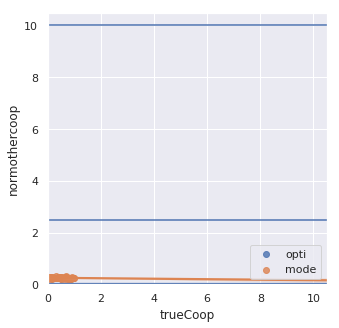

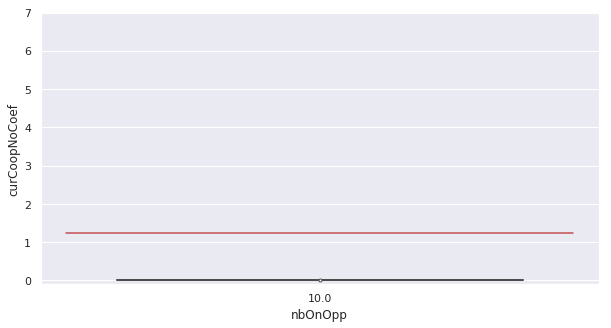

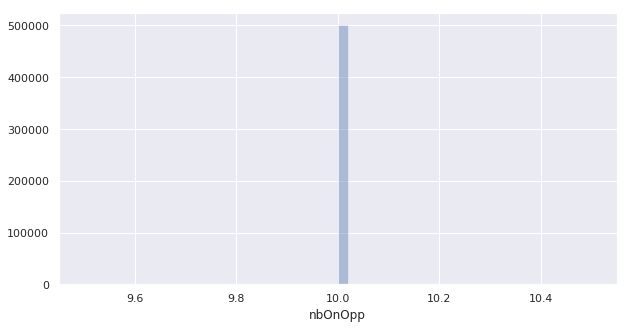

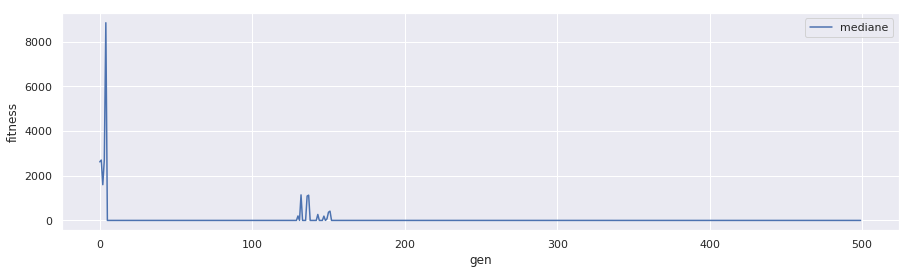

ind coop = 0


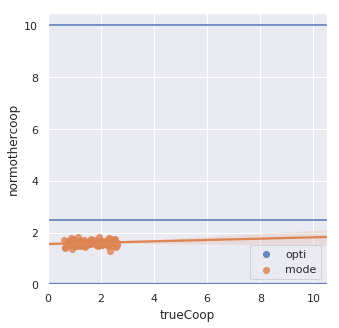

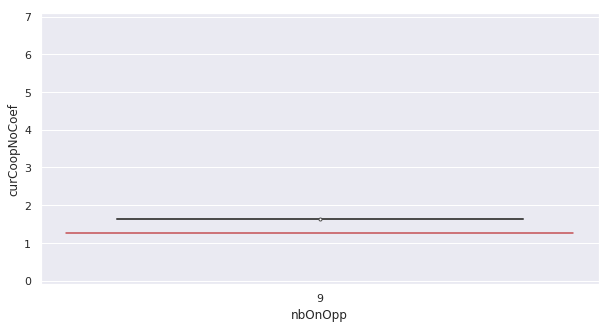

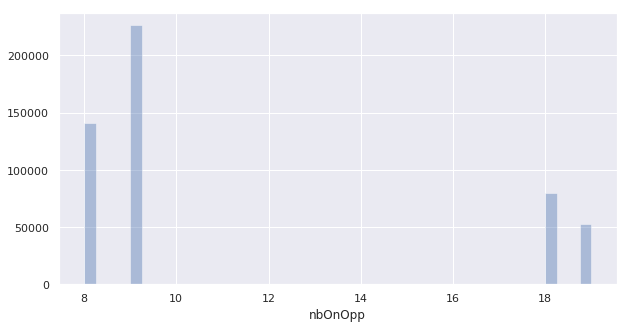

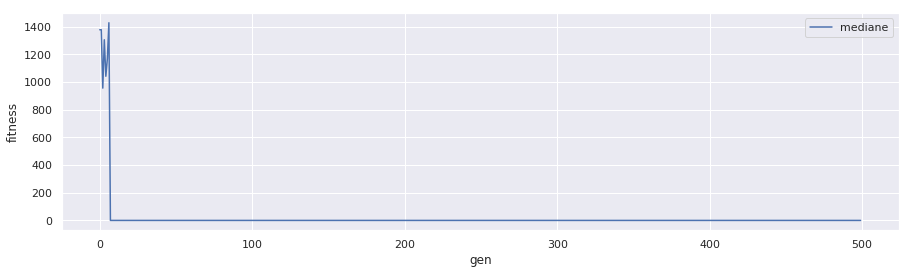

ind coop = 0


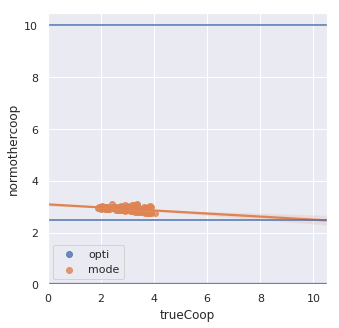

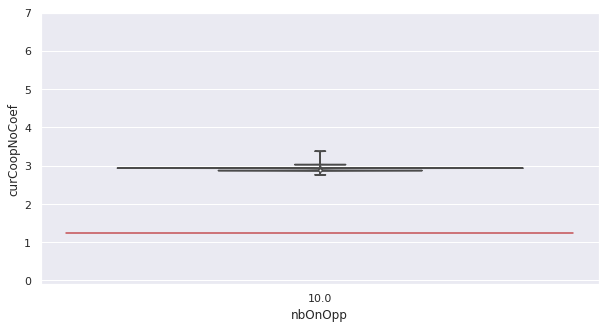

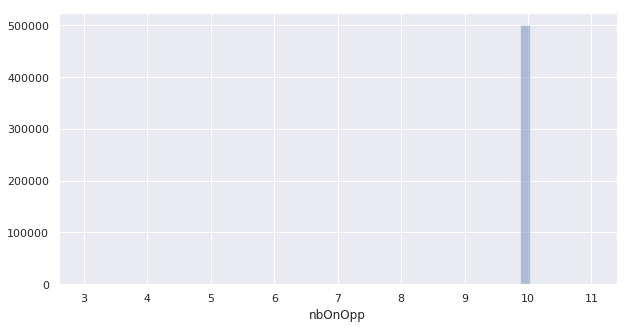

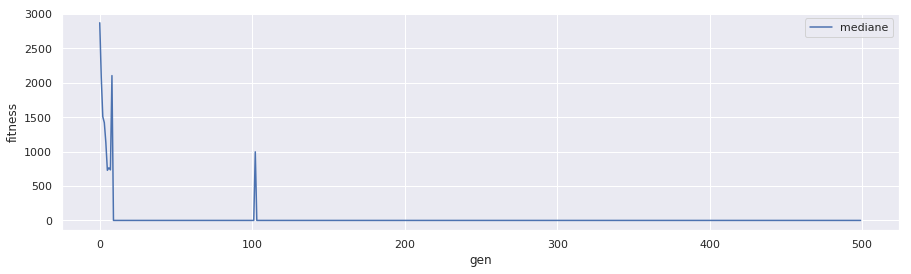

ind coop = 0


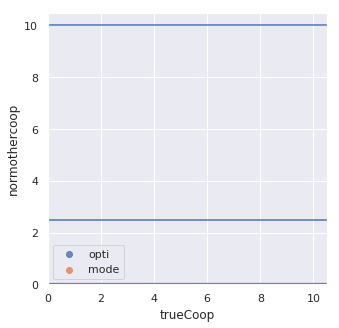

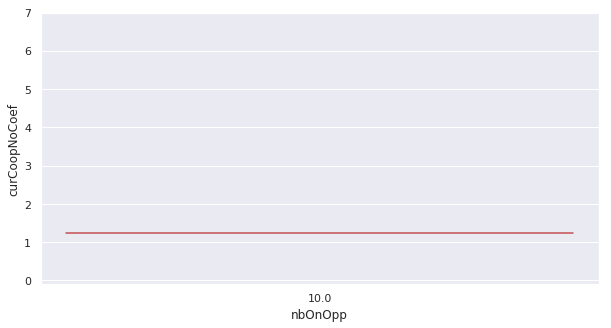

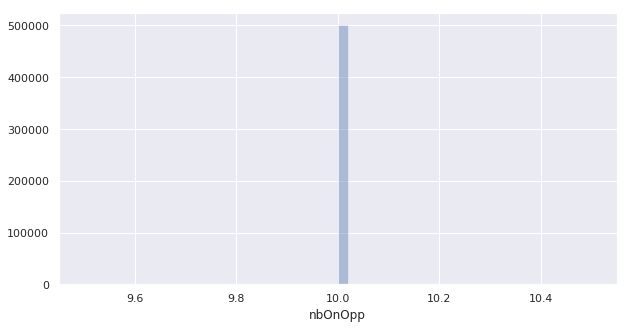

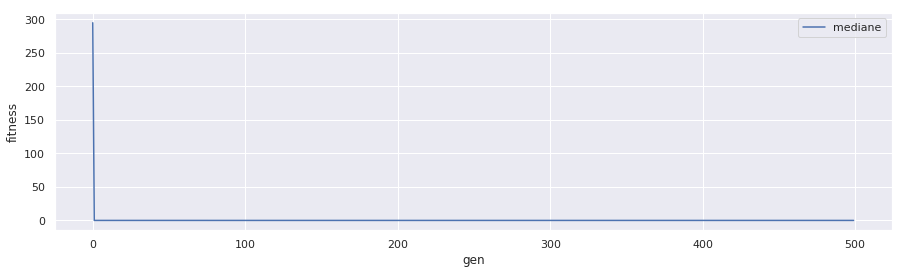

ind coop = 0


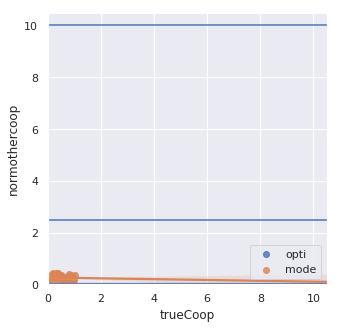

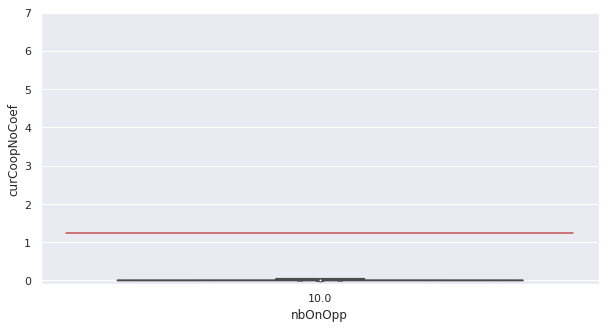

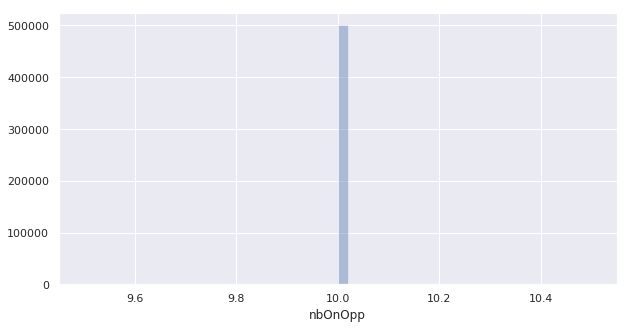

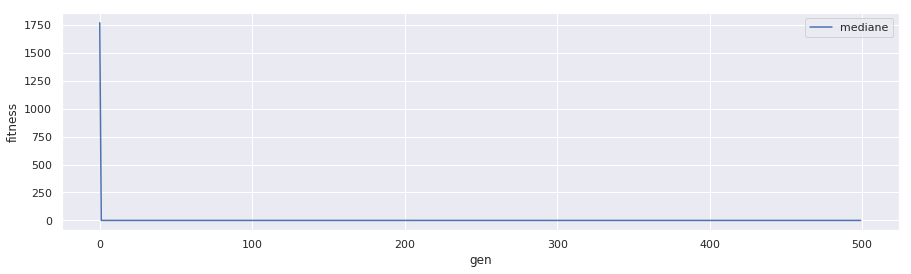

ind coop = 0


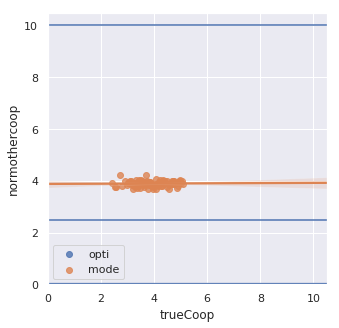

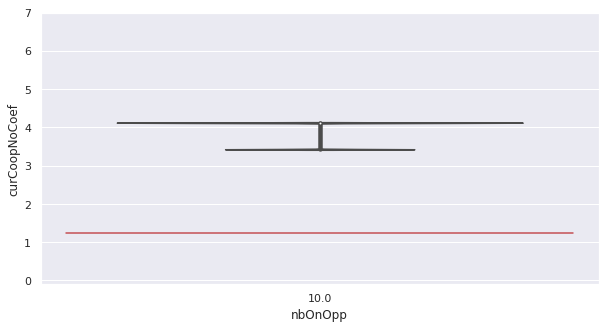

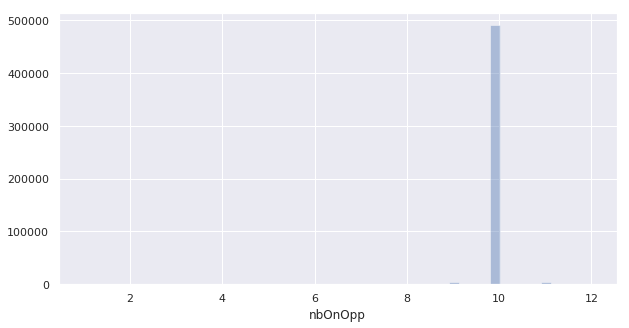

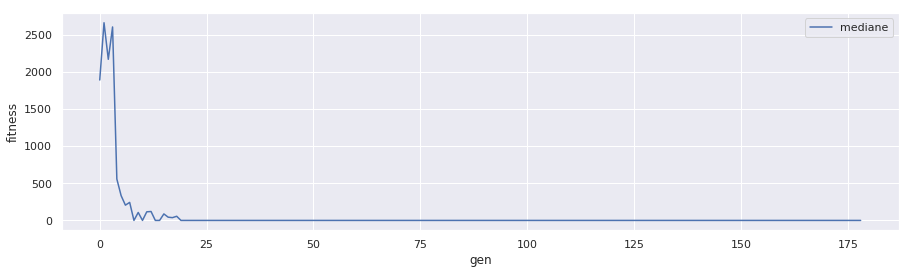

ind coop = 0


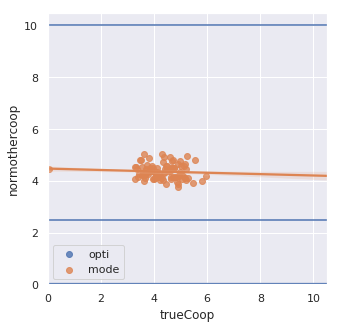

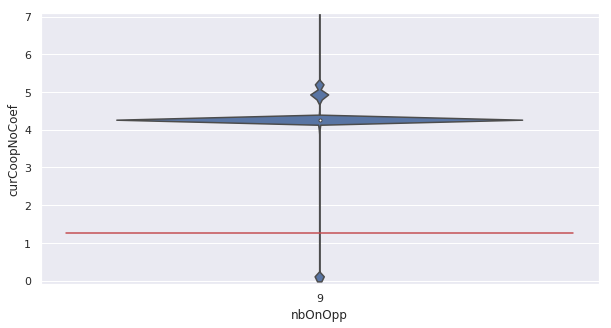

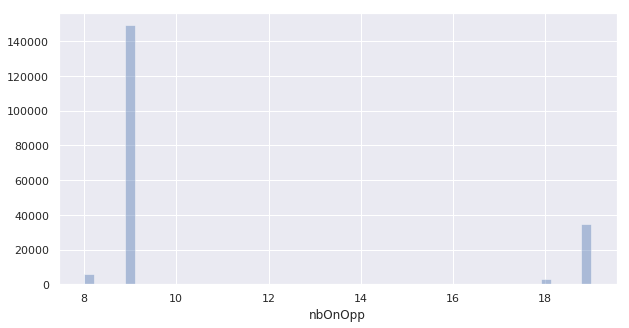

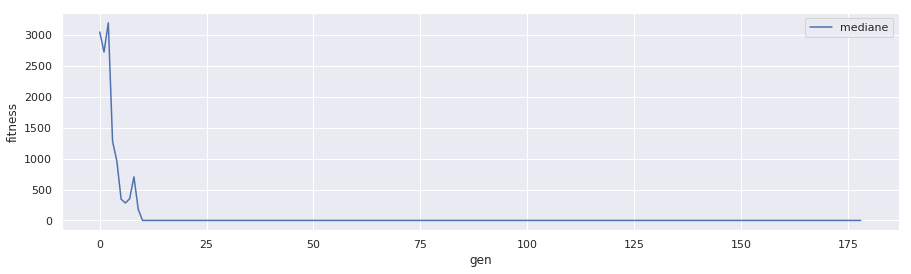

ind coop = 0


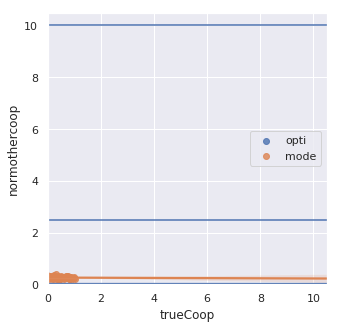

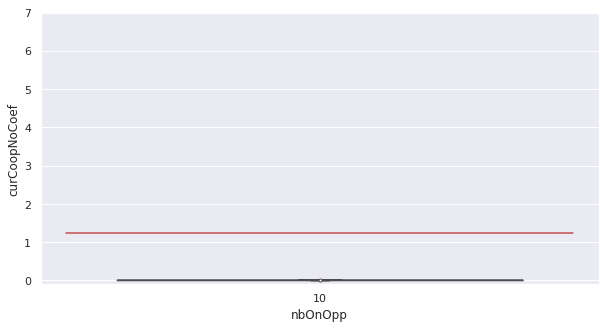

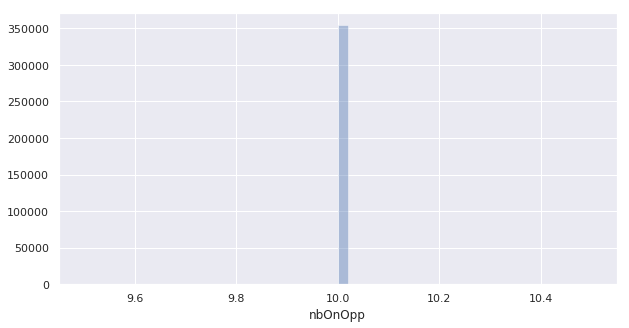

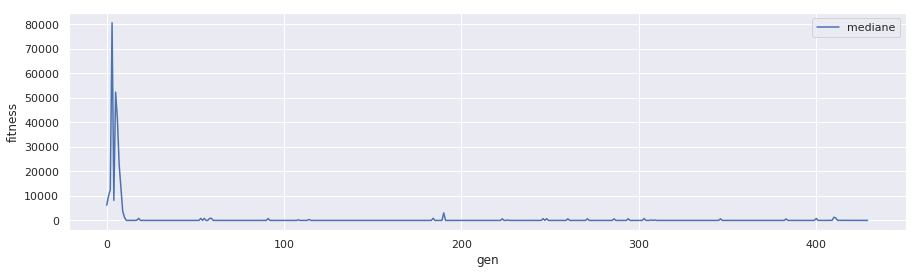

ind coop = 0


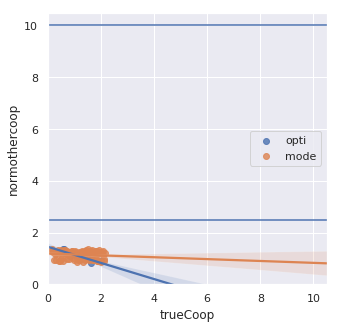

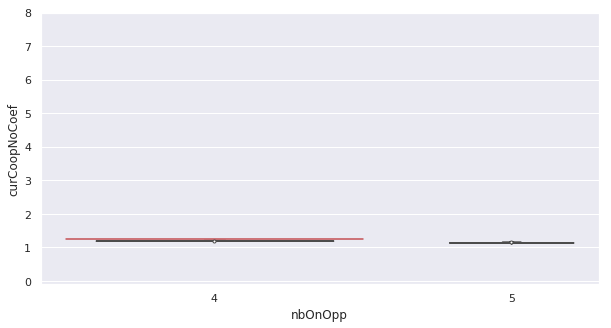

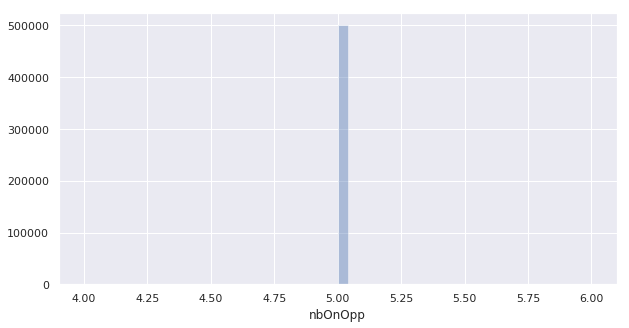

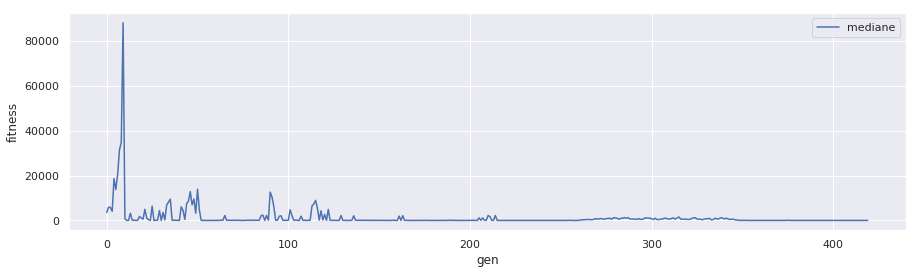

ind coop = 0


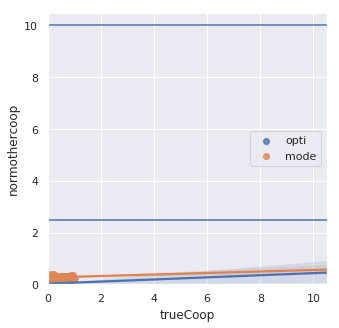

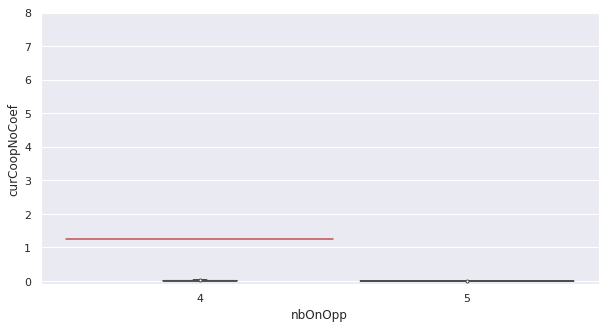

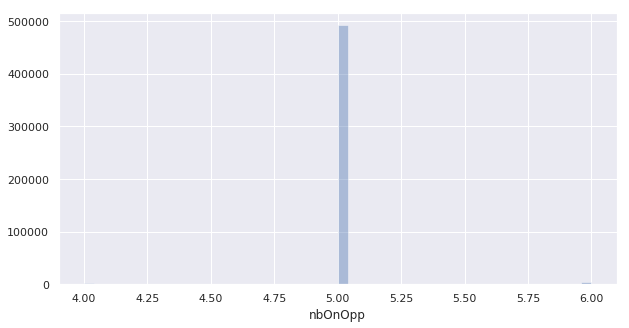

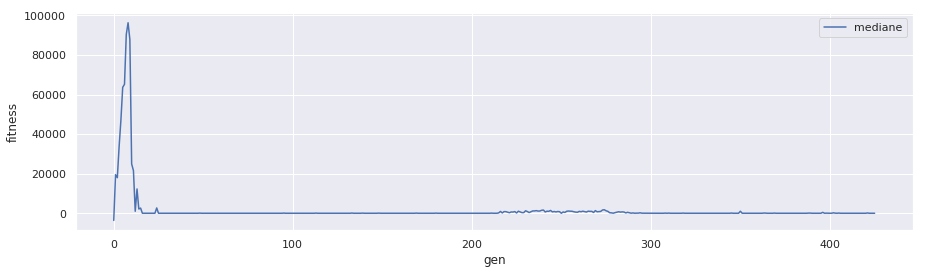

ind coop = 0


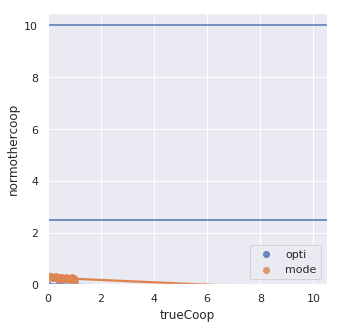

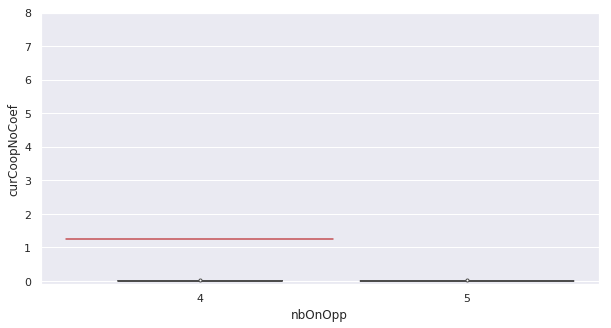

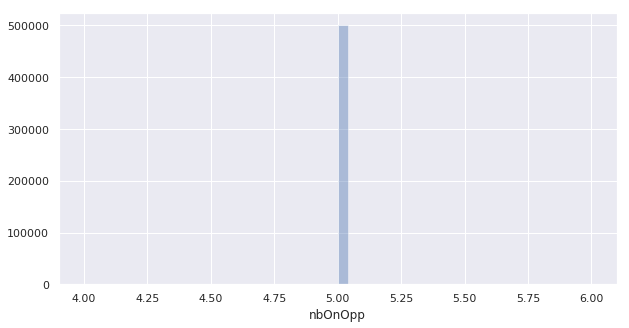

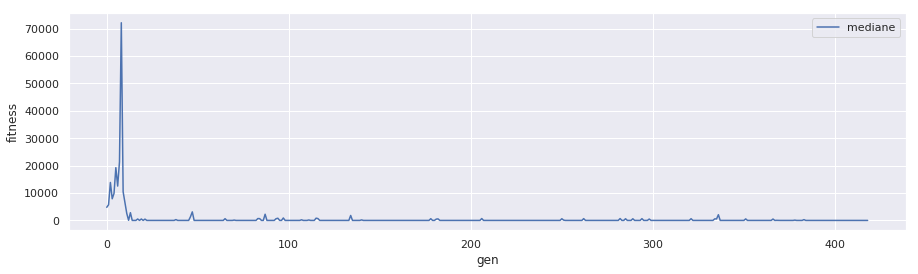

ind coop = 0


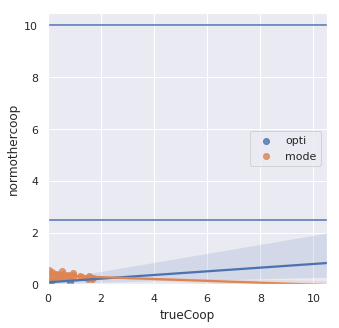

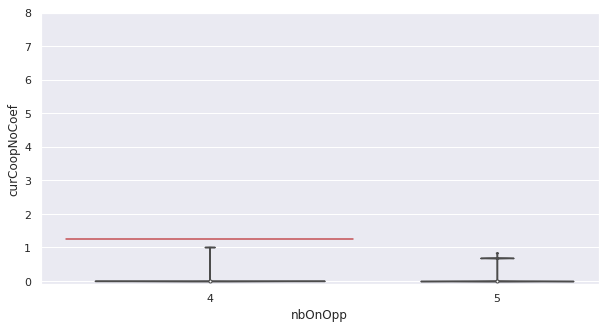

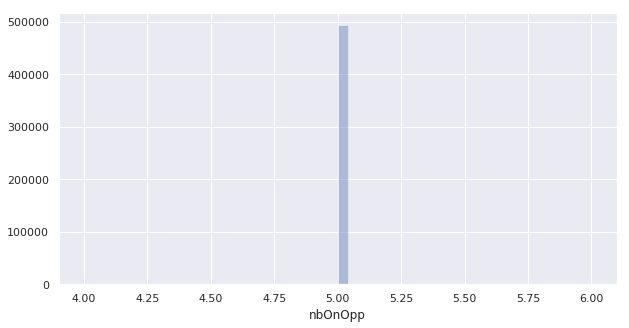

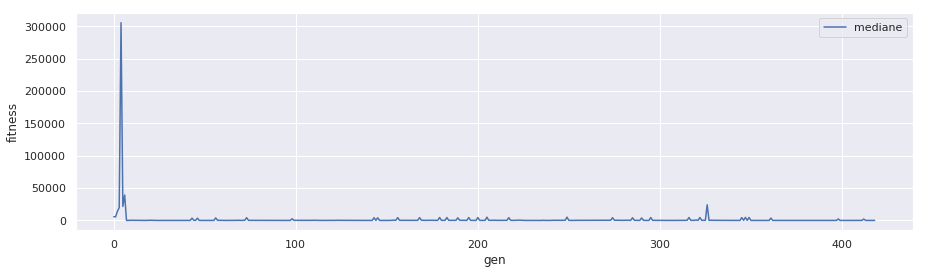

ind coop = 0


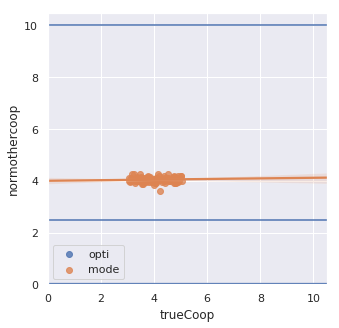

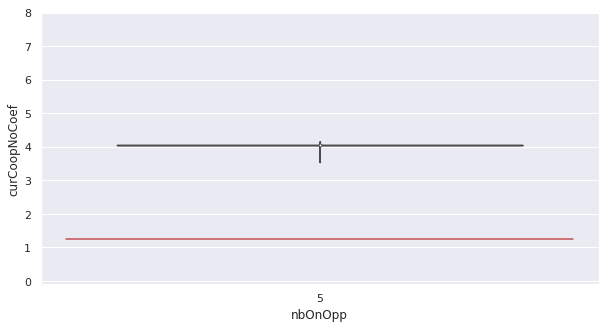

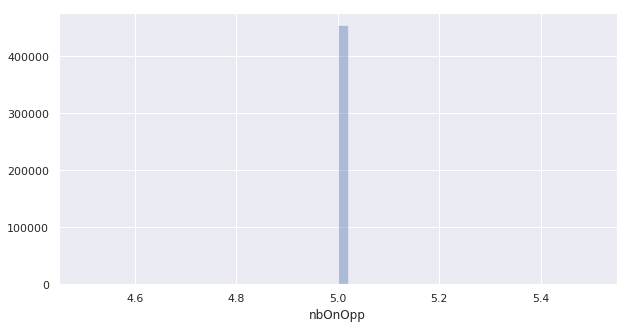

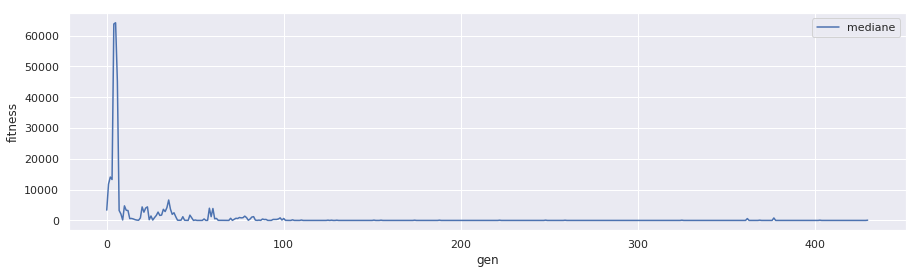

ind coop = 0


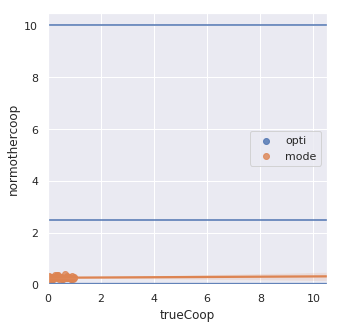

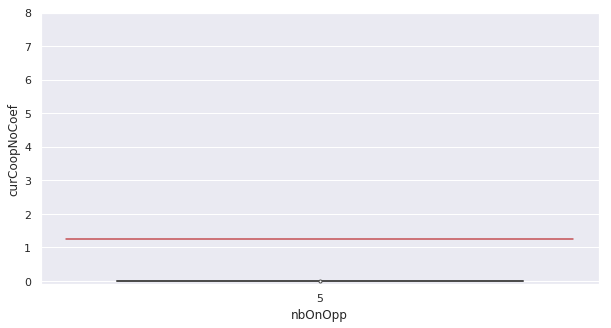

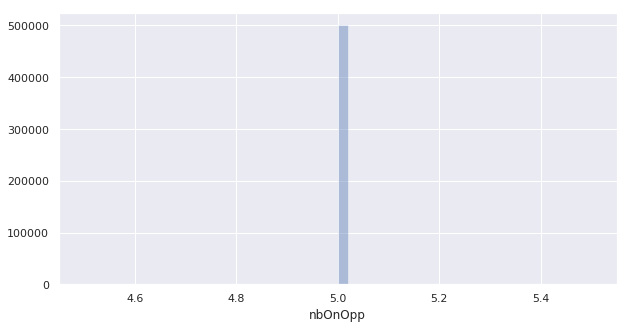

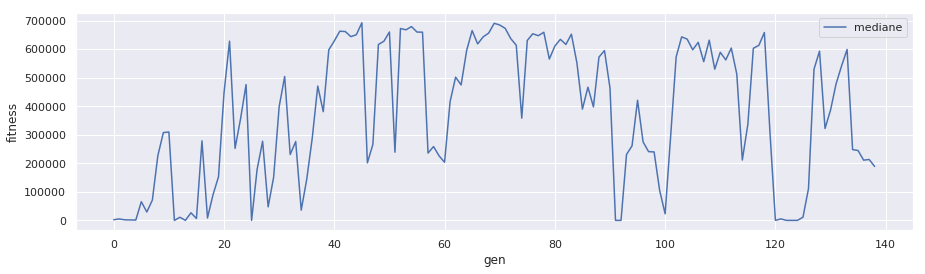

ind coop = 0


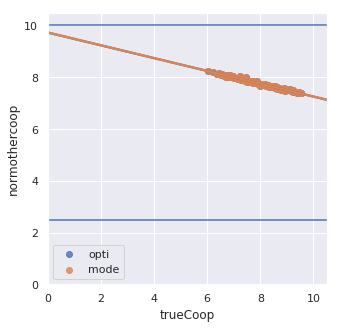

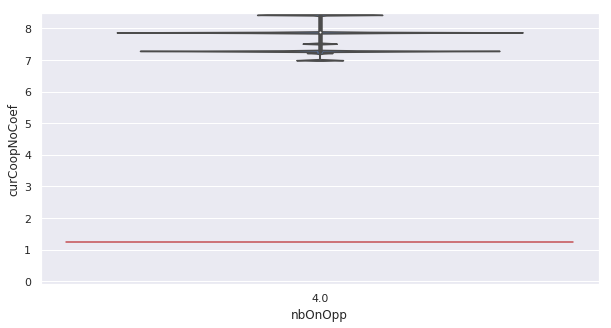

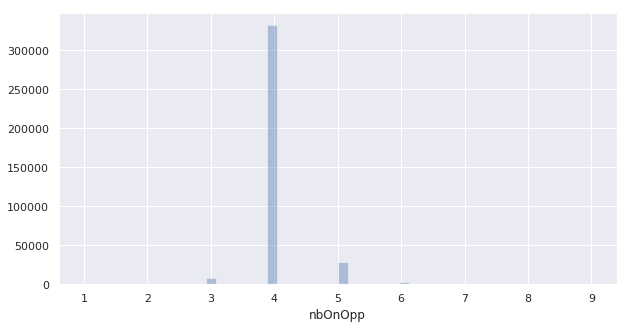

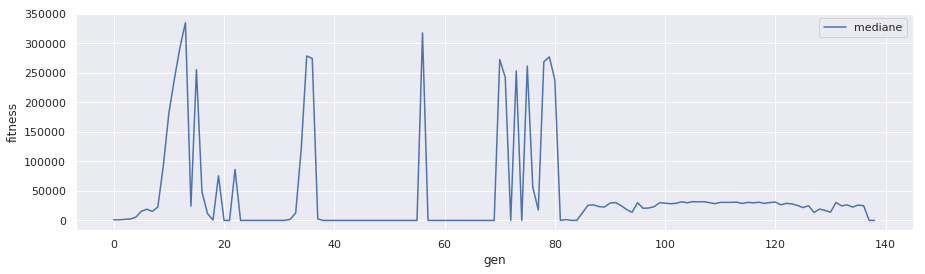

ind coop = 0


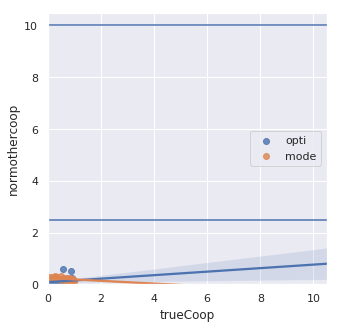

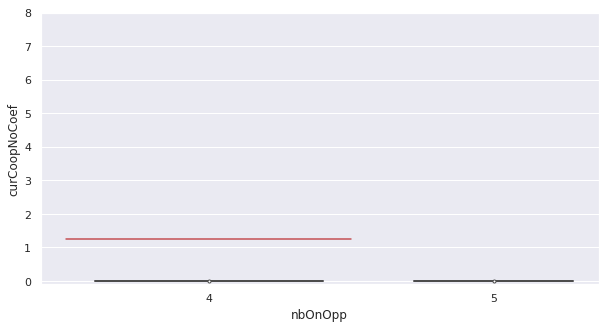

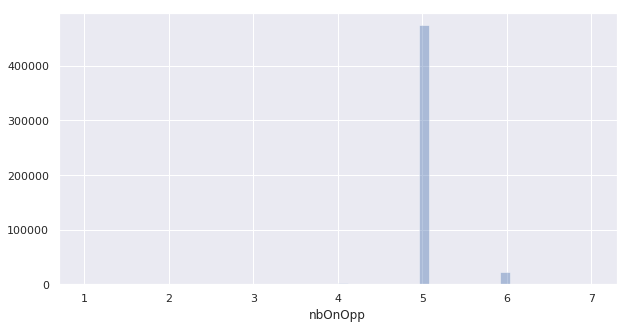

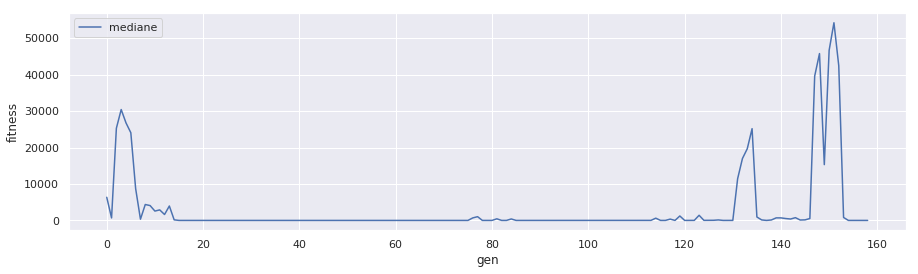

ind coop = 0


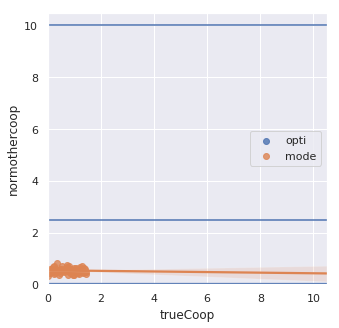

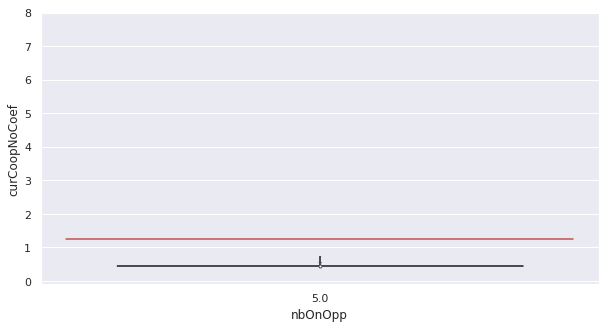

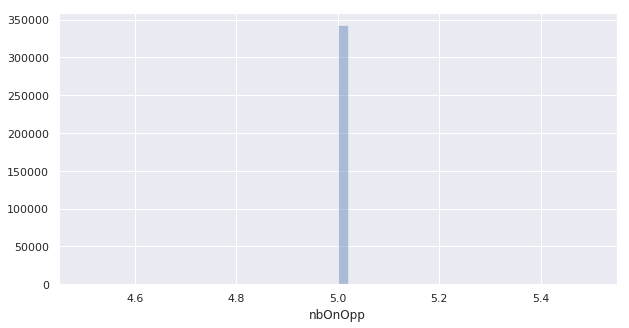

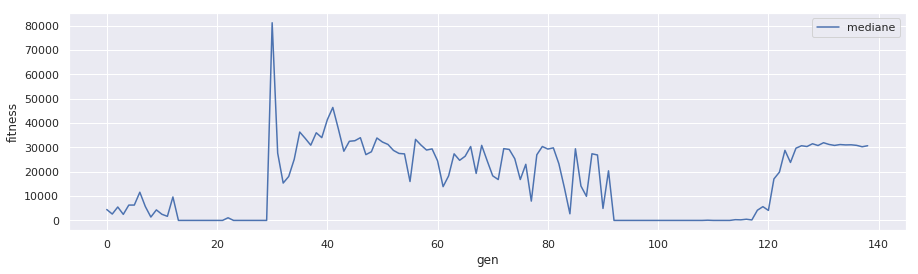

ind coop = 0


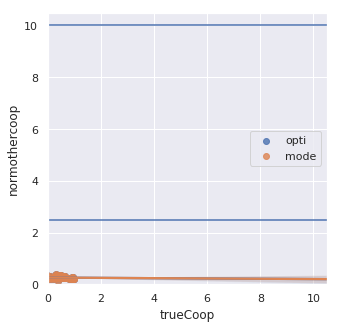

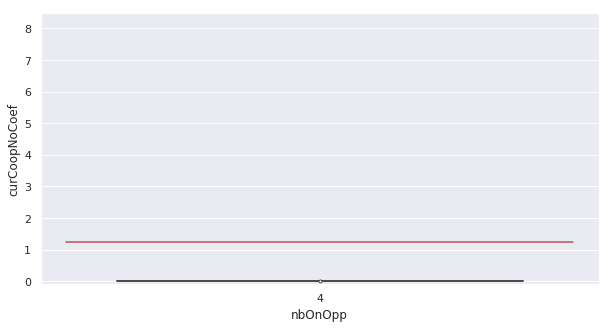

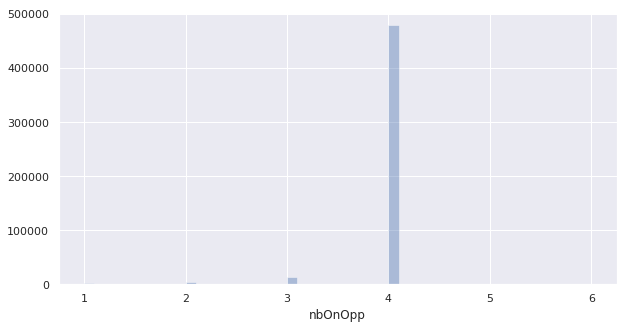

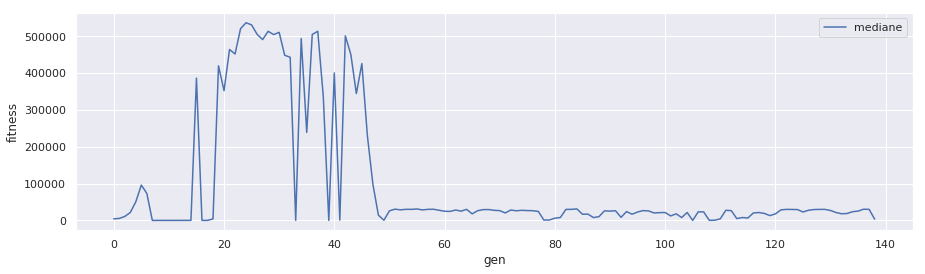

ind coop = 0


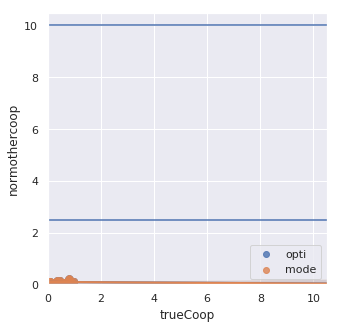

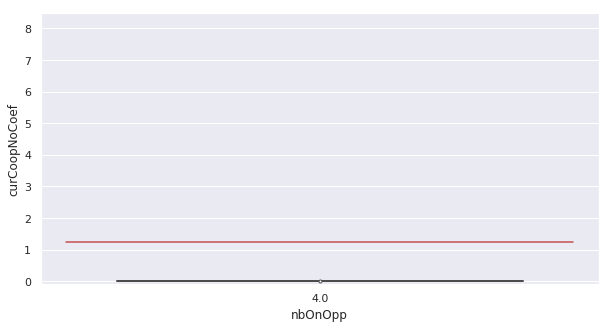

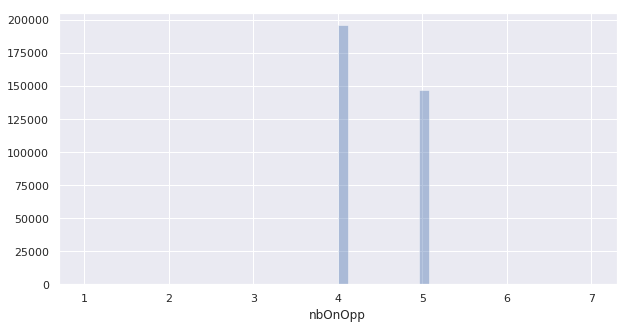

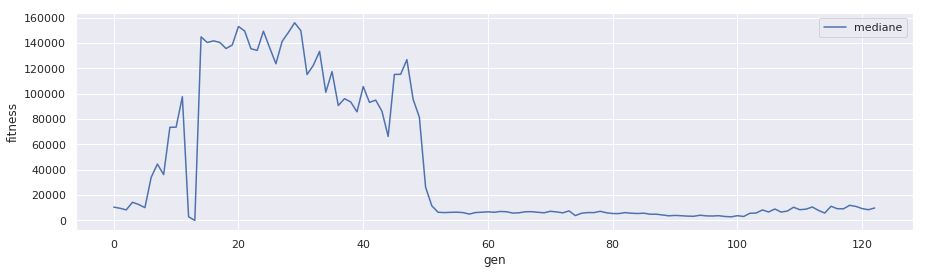

ind coop = 0


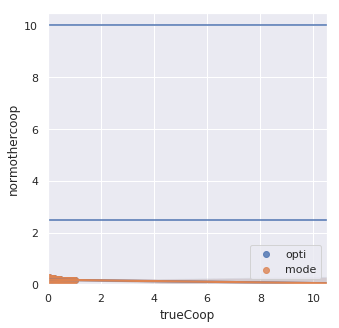

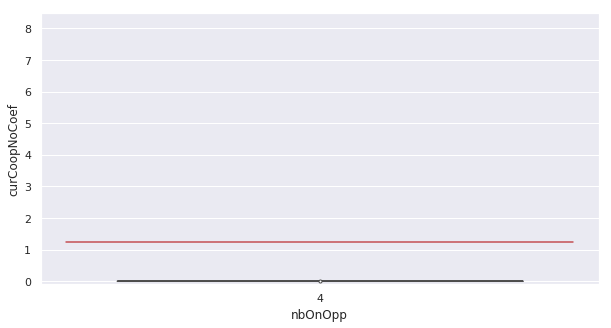

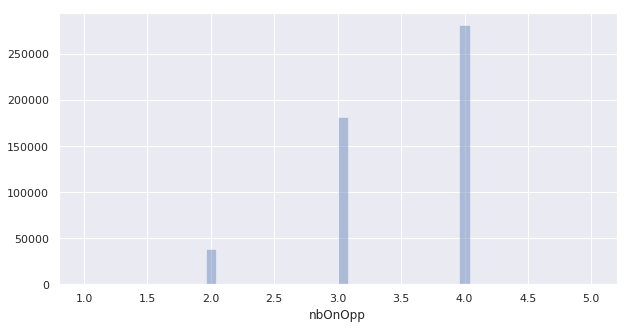

In [14]:
dofolloworbit = True
for path in sorted(
            glob.glob(f"{prefix}/logs/lionscross/*/*/*/*/rep00/", )
        ):

    display(HTML(f'<h3>{path}</h3>'))
    try:
        fit = read_csvx(path + "fitnesslog.txt", delimiter="\t")
    except Exception as e:
        print(e)
    else:
        fit = fit.groupby(['gen', 'ind'], as_index=False).sum()
        plt.figure(figsize=(15, 4))
        sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='median', label="mediane")
        plt.legend()
        #sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='min')
        plt.show()
    
    
    try:
        logall = read_csvx(gethighest(glob.glob(path + 'logall*')), delimiter="\t")
    except Exception as e:
        print(e)
        continue
        
    params = readparams(glob.glob(path + 'properties*')[0])
    indcoop = params.get('independantCoop', 0)
    nbMode = logall['nbOnOpp'].mode()[0]
    nbOpti = params.get('nOpti', 2)
    logall['ess'] = params['meanA'] / logall['nbOnOpp']
    ess2 = params['meanA'] / 2
    so2 = params['meanA'] + params['b'] - (params['b'] /2)
    logall['so'] = params['meanA'] + params['b'] - (params['b'] /logall['nbOnOpp'])
    logall['oppId'] = logall['oppId'].astype('category')
    if params.get('additiveVar', False):
        logall['trueCoop'] = logall['curCoopNoCoef'] + logall['fakeCoef'] - 1
    else:
        logall['trueCoop'] = logall['curCoopNoCoef'] if indcoop > 0 else logall['curCoopNoCoef'] * logall['fakeCoef']
    
    # print if ind coop or not
    print('ind coop =', indcoop)
    
    # Coop corr
    plt.figure(figsize=(5, 5))
    #logall[['previt', 'prevother', 'prevoppid']] = logall.shift(periods=logall['id'].max()+1)[['iter', 'otherCoop', 'oppId']]
    #sns.regplot('curCoopNoCoef', 'otherCoop', logall.query('nbOnOpp == 2 and prevother == otherCoop and oppId == prevoppid').groupby(['id']).mean())
    plt.ylim(0, so2 + 0.5)
    plt.xlim(0, so2 + 0.5)
    logall['normothercoop'] = logall['otherCoop'] / (logall['nbOnOpp'].clip(2, None) - 1)
    sns.regplot('trueCoop', 'normothercoop', logall.query(f'nbOnOpp == {nbOpti}').groupby(['id']).mean(), label="opti")
    sns.regplot('trueCoop', 'normothercoop', logall.query(f'nbOnOpp == {nbMode}').groupby(['id']).mean(), label="mode")
    plt.axhline(ess2)
    plt.axhline(so2)
    plt.legend()
    plt.show()
    
    # Coop graph
    coopval = logall.query(f'nbOnOpp == {nbMode} or nbOnOpp == {nbOpti}').groupby(['nbOnOpp', 'id'], as_index=False).mean()
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=coopval, x='nbOnOpp', y='curCoopNoCoef', bw=0.02)
    plt.ylim(-0.1, params['meanA'] + params['b'] / nbMode + 1)
    order = sorted([nbMode, nbOpti])
    for i in range(1, 2):
        a = params['meanA'] / order[i-1]
        b = params['meanA'] + params['b'] * order[i-1] / (order[i-1]+1)
        plt.plot([i-1.5, i-0.5], [b, b], c="b")
        plt.plot([i-1.5, i-0.5], [a, a], c="r")

    plt.show()
    
    # nbOnOpp distplot
    plt.figure(figsize=(10, 5))
    sns.distplot(logall['nbOnOpp'].dropna(), kde=False)
    plt.show()
    
    if False:
        # Occupancy
        plt.figure(figsize=(20, 10))
        occupancy = logall.query('eval == 0 and 1000 < iter < 1250').groupby(['iter', 'oppId'], as_index=False).count()
        occupancy['logid'] = np.log(occupancy['id'])
        pivot = occupancy.pivot_table('id', 'oppId', 'iter', fill_value=0)
        try:
            sns.heatmap(pivot)
        except Exception:
            print(pivot)
        plt.show()

        allopps = logall['oppId'].unique()
        for ind in [0, 10, 20]:
            subdf = logall.query(f'id == {ind} and eval == 0 and 1000 < iter < 1250')
            a = subdf.pivot_table('id', 'iter', 'oppId', aggfunc='count', fill_value=0)
            # trick for add all the opps
            for oppval in allopps:
                if oppval not in a:
                    a[oppval] = 0
            a.sort_index(axis=1, inplace=True)
            a = a.transpose()
            # end of trick 

            fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

            sns.lineplot(y='nbOnOpp', x='iter', sort=False, data=subdf, ax=axs[0])

            sns.lineplot(y='ess', x='iter', sort=False, data=subdf, ax=axs[1], label="ess")
            sns.lineplot(y='so', x='iter', sort=False, data=subdf, ax=axs[1], label="so")
            sns.lineplot(y='curCoopNoCoef', x='iter', sort=False, data=subdf, ax=axs[1], label="played")
            sns.heatmap(a, ax=axs[2], cbar=False)
            axs[0].set_ylim(0, None)
            axs[1].set_ylim(0, 10)
            axs[1].legend()
            plt.show()


In [62]:
rob = 0
print(df.loc[(df['id'] == rob) & (df['iter'] == i), 'otherCoop'])
i = 1
df = logall
df.loc[(df['id'] == rob) & (df['iter'] == i-1), 'prevother']= df.loc[(df['id'] == rob) & (df['iter'] == i), 'otherCoop']

NameError: name 'df' is not defined

In [63]:
%%cython
def putprev(df):
    df['prevother'] = False
    for rob in df['id'].unique():
        for i in range(1, df['iter'].max()):
            df.loc[(df['id'] == rob) & (df['iter'] == i-1), 'prevother'] = df.loc[(df['id'] == rob) & (df['iter'] == i), 'otherCoop']

UsageError: Cell magic `%%cython` not found.


In [104]:
logall[['previt', 'prevother', 'previd']] = logall.shift(periods=df['id'].max()+1)[['iter', 'otherCoop', 'id']]

In [105]:
logall

eval  iter  id  a  fakeCoef  playing oppId  nbOnOpp  curCoopNoCoef  \
0          0     0   0  5  0.722222        1    33        2        3.38889   
1          0     0   1  5  1.176770        1    14        2        5.20707   
2          0     0   2  5  1.358590        1    39        2        5.93434   
3          0     0   3  5  0.601010        1    40        2        2.90404   
4          0     0   4  5  0.611111        1    20        2        2.94444   
5          0     0   5  5  1.095960        1    37        2        4.88384   
6          0     0   6  5  1.075760        1    10        2        4.80303   
7          0     0   7  5  0.843434        1    49        2        3.87374   
8          0     0   8  5  1.328280        1    28        2        5.81313   
9          0     0   9  5  0.954545        1     3        2        4.31818   
10         0     0  10  5  1.469700        1    31        2        6.37879   
11         0     0  11  5  1.207070        1    33        2        5.32828   
12         0     0  12  5  1.459600        1    35        2        6.33838   
13         0     0  13  5  1.277780        1    41        2        5.61111   
14         0     0  14  5  0.944444        1    39        2        4.27778   
15         0     0  15  5  0.560606        1    45        2        2.74242   
16         0     0  16  5  0.974747        1    42        2        4.39899   
17         0     0  17  5  0.510101        1    31        2        2.54040   
18         0     0  18  5  1.005050        1    26        2        4.52020   
19         0     0  19  5  1.156570        1    18        2        5.12626   
20         0     0  20  5  0.702020        1    47        2        3.30808   
21         0     0  21  5  0.873737        1     0        2        3.99495   
22         0     0  22  5  0.863636        1     2        2        3.95455   
23         0     0  23  5  0.924242        1    36        2        4.19697   
24         0     0  24  5  1.429290        1     7        2        6.21717   
25         0     0  25  5  1.166670        1     2        2        5.16667   
26         0     0  26  5  0.964646        1    40        2        4.35859   
27         0     0  27  5  0.883838        1    13        2        4.03535   
28         0     0  28  5  0.904040        1    14        2        4.11616   
29         0     0  29  5  1.106060        1     3        2        4.92424   
...      ...   ...  .. ..       ...      ...   ...      ...            ...   
299899     0  2998  99  5  0.671717        1     0        2        3.18687   
299900     0  2999   0  5  0.722222        1    20        2        3.38889   
299901     0  2999   1  5  1.176770        1    22        2        5.20707   
299902     0  2999   2  5  1.358590        1     8        2        5.93434   
299903     0  2999   3  5  0.601010        1    17        2        2.90404   
299904     0  2999   4  5  0.611111        1    47        2        2.94444   
299905     0  2999   5  5  1.095960        1    37        2        4.88384   
299906     0  2999   6  5  1.075760        1    36        2        4.80303   
299907     0  2999   7  5  0.843434        1     6        2        3.87374   
299908     0  2999   8  5  1.328280        1    33        2        5.81313   
299909     0  2999   9  5  0.954545        1    20        2        4.31818   
299910     0  2999  10  5  1.469700        1     3        2        6.37879   
299911     0  2999  11  5  1.207070        1    27        2        5.32828   
299912     0  2999  12  5  1.459600        1     2        2        6.33838   
299913     0  2999  13  5  1.277780        1    26        2        5.61111   
299914     0  2999  14  5  0.944444        1    25        2        4.27778   
299915     0  2999  15  5  0.560606        1    24        2        2.74242   
299916     0  2999  16  5  0.974747        1    31        2        4.39899   
299917     0  2999  17  5  0.510101        1    46        2        2.54040   
299918     0  2999  18  5  1.0

In [19]:
params

{'ConfigurationLoaderObjectName': 'LionConfigurationLoader',
 'SlowMotionMode': False,
 'VisibleLandmarks': True,
 'additiveVar': True,
 'asyncPlay': False,
 'b': 3.0,
 'controllerType': 0.0,
 'cost': 0.0,
 'costAsInput': False,
 'evaluationTime': 5000.0,
 'fakeCoef': 0.5,
 'fakeCoefStd': 0.3,
 'fakeRobots': True,
 'frictionCoef': 0.0,
 'frictionInflexionPoint': 2.5,
 'gAgentsInitAreaHeight': 580.0,
 'gAgentsInitAreaWidth': 580.0,
 'gAgentsInitAreaX': 10.0,
 'gAgentsInitAreaY': 10.0,
 'gBackgroundImageFilename': 'data/env_600_background.bmp',
 'gBatchMode': False,
 'gControllerType': 0.0,
 'gDisplayGroundCaption': False,
 'gDisplayMode': 0.0,
 'gDisplaySensors': 0.0,
 'gDisplayTail': False,
 'gEnergyInit': 400.0,
 'gEnergyLevel': False,
 'gEnergyMax': 400.0,
 'gEnergyRefill': True,
 'gEnergyRequestOutput': True,
 'gEnvironmentImageFilename': 'data/env_600_environment.bmp',
 'gExtendedSensoryInputs': True,
 'gFastDisplayModeSpeed': 60.0,
 'gFixedEffort': False,
 'gFixedEffortValue': 0.2